In [1]:
!pip install catboost
# if neceessary then uncomment it

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


# Importing necessary libraries for data manipulation and visualization

In [2]:
# Importing necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from scipy import stats
from math import sqrt

# Importing visualization libraries and setting inline display for plots
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

# Ignoring warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Importing functions for train/test split and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importing functions for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

# Importing machine learning models
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier

# Importing additional metrics for model evaluation
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

# Importing preprocessing functions
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# More metrics for regression evaluation
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error

# Importing XGBoost library
import os
# Setting path for MinGW compiler if necessary (commented out)
# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost import XGBClassifier
from xgboost import plot_importance  # For plotting feature importance

# Importing joblib for model persistence
import joblib

# Setting Seaborn and Matplotlib styles for better visualization
sns.set()
plt.style.use('ggplot')
%matplotlib inline

# Importing additional preprocessing and pipeline utilities
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

# Importing additional regression models and ensemble methods
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb


In [3]:
train_df = pd.read_csv('/content/Assignment_Train.csv')
test_df = pd.read_csv('/content/Assignment_Test.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            10000 non-null  int64  
 1   APPLICATION LOGIN DATE               10000 non-null  object 
 2   HDB BRANCH NAME                      9999 non-null   object 
 3   HDB BRANCH STATE                     9146 non-null   object 
 4   FIRST NAME                           10000 non-null  object 
 5   MIDDLE NAME                          2855 non-null   object 
 6   LAST NAME                            9319 non-null   object 
 7   mobile                               10000 non-null  int64  
 8   AADHAR VERIFIED                      10000 non-null  object 
 9   Cibil Score                          5703 non-null   object 
 10  MOBILE VERIFICATION                  10000 non-null  bool   
 11  DEALER NAME                  

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   UID                                  2000 non-null   float64
 1   DEALER ID                            2000 non-null   int64  
 2   APPLICATION LOGIN DATE               2000 non-null   object 
 3   HDB BRANCH NAME                      2000 non-null   object 
 4   HDB BRANCH STATE                     1828 non-null   object 
 5   FIRST NAME                           2000 non-null   object 
 6   MIDDLE NAME                          595 non-null    object 
 7   LAST NAME                            1869 non-null   object 
 8   mobile                               2000 non-null   int64  
 9   AADHAR VERIFIED                      2000 non-null   object 
 10  Cibil Score                          1158 non-null   object 
 11  MOBILE VERIFICATION           

In [6]:
train_df.columns

Index(['DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME',
       'HDB BRANCH STATE', 'FIRST NAME', 'MIDDLE NAME', 'LAST NAME', 'mobile',
       'AADHAR VERIFIED', 'Cibil Score', 'MOBILE VERIFICATION', 'DEALER NAME',
       'TOTAL ASSET COST', 'ASSET CTG', 'ASSET MODEL NO', 'APPLIED AMOUNT',
       'PRIMARY ASSET MAKE', 'Primary Asset Model No',
       'Personal Email Address', 'MARITAL STATUS', 'GENDER', 'DOB', 'AGE',
       'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE',
       'Pan Name', 'name', 'vpa', 'upi_name', 'Phone Social Premium.a23games',
       'Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart', 'Phone Social Premium.instagram',
       'Phone Social Premium.isWABusiness',
       'Phone Social Premium.jeevansaathi', 'Phone Social Premium.jiomart',
       'Phone Social Premium.microsoft', 'Phone Social Premium.my11',
       

In [7]:
test_df.columns

Index(['UID', 'DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME',
       'HDB BRANCH STATE', 'FIRST NAME', 'MIDDLE NAME', 'LAST NAME', 'mobile',
       'AADHAR VERIFIED', 'Cibil Score', 'MOBILE VERIFICATION', 'DEALER NAME',
       'TOTAL ASSET COST', 'ASSET CTG', 'ASSET MODEL NO', 'APPLIED AMOUNT',
       'PRIMARY ASSET MAKE', 'Primary Asset Model No',
       'Personal Email Address', 'MARITAL STATUS', 'GENDER', 'DOB', 'AGE',
       'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE',
       'Pan Name', 'name', 'vpa', 'upi_name', 'Phone Social Premium.a23games',
       'Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart', 'Phone Social Premium.instagram',
       'Phone Social Premium.isWABusiness',
       'Phone Social Premium.jeevansaathi', 'Phone Social Premium.jiomart',
       'Phone Social Premium.microsoft', 'Phone Social Premium.my11',


In [8]:
train_df.describe()

DEALER ID        mobile  TOTAL ASSET COST  ASSET MODEL NO  \
count   10000.000000  1.000000e+04       4892.000000    10000.000000   
mean   102936.459100  8.630041e+09      97612.518397   150660.758500   
std     37830.984431  1.077717e+09      16745.027041    20847.995017   
min     49849.000000  6.000042e+09      51873.000000   124587.000000   
25%     79953.750000  7.894858e+09      88425.500000   139542.000000   
50%     94631.000000  8.867377e+09      94400.000000   143238.000000   
75%    108463.000000  9.588181e+09     103499.250000   160216.000000   
max    202616.000000  9.999977e+09     241116.000000   201897.000000   

       APPLIED AMOUNT           DOB           AGE  \
count    1.000000e+04  1.000000e+04  10000.000000   
mean     9.179673e+04  9.813396e+06     31.796100   
std      2.700018e+04  8.930654e+06     11.202075   
min      1.040000e+04  1.011943e+06      0.000000   
25%      8.000000e+04  1.012000e+06     25.000000   
50%      9.000000e+04  7.112001e+06     31.000000   
75%      9.900000e+04  1.605197e+07     39.000000   
max      1.420000e+06  3.112200e+07     79.000000   

       Phone Social Premium.a23games  Phone Social Premium.amazon  \
count                            1.0                  8084.000000   
mean                             0.0                     0.486517   
std                              NaN                     0.499849   
min                              0.0                     0.000000   
25%                              0.0                     0.000000   
50%                              0.0                     0.000000   
75%                              0.0                     1.000000   
max                              0.0                     1.000000   

       Phone Social Premium.byjus  ...  Phone Social Premium.paytm  \
count                 8052.000000  ...                 8243.000000   
mean                     0.149652  ...                    0.820090   
std                      0.356752  ...                    0.384136   
min                      0.000000  ...                    0.000000   
25%                      0.000000  ...                    1.000000   
50%                      0.000000  ...                    1.000000   
75%                      0.000000  ...                    1.000000   
max                      1.000000  ...                    1.000000   

       Phone Social Premium.rummycircle  Phone Social Premium.shaadi  \
count                               1.0                  8221.000000   
mean                                0.0                     0.017516   
std                                 NaN                     0.131192   
min                                 0.0                     0.000000   
25%                                 0.0                     0.000000   
50%                                 0.0                     0.000000   
75%                                 0.0                     0.000000   
max                                 0.0                     1.000000   

       Phone Social Premium.skype  Phone Social Premium.toi  \
count                 8215.000000               8057.000000   
mean                     0.147657                  0.250838   
std                      0.354781                  0.433522   
min                      0.000000                  0.000000   
25%                      0.000000                  0.000000   
50%                      0.000000                  0.000000   
75%                      0.000000                  1.000000   
max                      1.000000                  1.000000   

       Phone Social Premium.whatsapp  Phone Social Premium.yatra  \
count                    1573.000000                         9.0   
mean                        0.854418                         0.0   
std                         0.352799                         0.0   
min                         0.000000                         0.0   
25%                         1.000000                         0.0   
50%   

In [9]:
test_df.describe()

UID      DEALER ID        mobile  TOTAL ASSET COST  \
count  2.000000e+03    2000.000000  2.000000e+03        978.000000   
mean   1.130746e+18  104662.633000  8.615985e+09      97679.605317   
std    6.679230e+17   38583.383585  1.090403e+09      16353.421097   
min    5.503940e+11   49849.000000  6.000084e+09      53249.000000   
25%    5.377235e+17   81981.250000  7.858379e+09      88939.500000   
50%    1.108500e+18   94964.000000  8.859302e+09      94535.500000   
75%    1.724958e+18  108974.250000  9.568866e+09     103354.250000   
max    2.303350e+18  201748.000000  9.999919e+09     277508.000000   

       ASSET MODEL NO  APPLIED AMOUNT           DOB         AGE  \
count     2000.000000    2.000000e+03  2.000000e+03  2000.00000   
mean    151598.707000    9.372890e+04  9.897133e+06    32.35800   
std      21615.502147    4.728632e+04  9.112755e+06    11.00838   
min     124587.000000    1.004100e+04  1.011960e+06     0.00000   
25%     139541.000000    8.000000e+04  1.012000e+06    25.00000   
50%     143240.000000    9.000000e+04  7.111980e+06    31.00000   
75%     160832.000000    9.900000e+04  1.606199e+07    39.00000   
max     201534.000000    1.010000e+06  3.112200e+07    74.00000   

       Phone Social Premium.a23games  Phone Social Premium.amazon  ...  \
count                            0.0                  1883.000000  ...   
mean                             NaN                     0.468401  ...   
std                              NaN                     0.499133  ...   
min                              NaN                     0.000000  ...   
25%                              NaN                     0.000000  ...   
50%                              NaN                     0.000000  ...   
75%                              NaN                     1.000000  ...   
max                              NaN                     1.000000  ...   

       Phone Social Premium.paytm  Phone Social Premium.rummycircle  \
count                 1975.000000                               0.0   
mean                     0.822278                               NaN   
std                      0.382375                               NaN   
min                      0.000000                               NaN   
25%                      1.000000                               NaN   
50%                      1.000000                               NaN   
75%                      1.000000                               NaN   
max                      1.000000                               NaN   

       Phone Social Premium.shaadi  Phone Social Premium.skype  \
count                  1974.000000                 1974.000000   
mean                      0.016717                    0.145897   
std                       0.128243                    0.353092   
min                       0.000000                    0.000000   
25%                       0.000000                    0.000000   
50%                       0.000000                    0.000000   
75%                       0.000000                    0.000000   
max                       1.000000                    1.000000   

       Phone Social Premium.toi  Phone Social Premium.whatsapp  \
count               1936.000000                     262.000000   
mean                   0.246384                       0.797710   
std                    0.431016                       0.402476   
min                    0.000000                       0.000000   
25%                    0.000000                       1.000000   
50%                    0.000000                       1.000000   
75%                    0.000000                       1.000000   
max                    1.000000                       1.000000   

       Phone Social Premium.yatra  Phone Social Premium.zoho  \
count                         0.0                1977.000000   
mean                          NaN                   0.001012   
std                           NaN                   0.031798   
min                         

In [10]:
#find the object,int,float value
t = (train_df.dtypes == 'object')
object_cols = list(t[t].index)
print("Categorical variables:")
print(object_cols)
print('-'*50)

t = (train_df.dtypes == 'int')
num_cols = list(t[t].index)
print("Integer variables:")
print(num_cols)
print('-'*50)

t = (train_df.dtypes == 'float')
num_cols = list(t[t].index)
print("Float variables:")
print(num_cols)
print('-'*100)

Categorical variables:
['APPLICATION LOGIN DATE', 'HDB BRANCH NAME', 'HDB BRANCH STATE', 'FIRST NAME', 'MIDDLE NAME', 'LAST NAME', 'AADHAR VERIFIED', 'Cibil Score', 'DEALER NAME', 'ASSET CTG', 'PRIMARY ASSET MAKE', 'Primary Asset Model No', 'Personal Email Address', 'MARITAL STATUS', 'GENDER', 'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE', 'Pan Name', 'name', 'vpa', 'upi_name', 'phone_phoneFootprintStrengthOverall', 'Application Status']
--------------------------------------------------
Integer variables:
['DEALER ID', 'mobile', 'ASSET MODEL NO', 'APPLIED AMOUNT', 'DOB', 'AGE']
--------------------------------------------------
Float variables:
['TOTAL ASSET COST', 'Phone Social Premium.a23games', 'Phone Social Premium.amazon', 'Phone Social Premium.byjus', 'Phone Social Premium.flipkart', 'Phone Social Premium.housing', 'Phone Social Premium.indiamart', 'Phone Social Premium.instagram', 'Phone Social Premium.isWABusiness', 'Phone Social Premium.jeevansaathi'

In [11]:
#find the object,int,float value
t = (test_df.dtypes == 'object')
object_cols = list(t[t].index)
print("Categorical variables:")
print(object_cols)
print('-'*50)

t = (test_df.dtypes == 'int')
num_cols = list(t[t].index)
print("Integer variables:")
print(num_cols)
print('-'*50)

t = (test_df.dtypes == 'float')
num_cols = list(t[t].index)
print("Float variables:")
print(num_cols)
print('-'*100)

Categorical variables:
['APPLICATION LOGIN DATE', 'HDB BRANCH NAME', 'HDB BRANCH STATE', 'FIRST NAME', 'MIDDLE NAME', 'LAST NAME', 'AADHAR VERIFIED', 'Cibil Score', 'DEALER NAME', 'ASSET CTG', 'PRIMARY ASSET MAKE', 'Primary Asset Model No', 'Personal Email Address', 'MARITAL STATUS', 'GENDER', 'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE', 'Pan Name', 'name', 'vpa', 'upi_name', 'phone_phoneFootprintStrengthOverall']
--------------------------------------------------
Integer variables:
['DEALER ID', 'mobile', 'ASSET MODEL NO', 'APPLIED AMOUNT', 'DOB', 'AGE', 'phone_digitalage']
--------------------------------------------------
Float variables:
['UID', 'TOTAL ASSET COST', 'Phone Social Premium.a23games', 'Phone Social Premium.amazon', 'Phone Social Premium.byjus', 'Phone Social Premium.flipkart', 'Phone Social Premium.housing', 'Phone Social Premium.indiamart', 'Phone Social Premium.instagram', 'Phone Social Premium.isWABusiness', 'Phone Social Premium.jeevansa

In [12]:
train_df.dtypes[train_df.dtypes != 'object']

DEALER ID                              int64
mobile                                 int64
MOBILE VERIFICATION                     bool
TOTAL ASSET COST                     float64
ASSET MODEL NO                         int64
APPLIED AMOUNT                         int64
DOB                                    int64
AGE                                    int64
Phone Social Premium.a23games        float64
Phone Social Premium.amazon          float64
Phone Social Premium.byjus           float64
Phone Social Premium.flipkart        float64
Phone Social Premium.housing         float64
Phone Social Premium.indiamart       float64
Phone Social Premium.instagram       float64
Phone Social Premium.isWABusiness    float64
Phone Social Premium.jeevansaathi    float64
Phone Social Premium.jiomart         float64
Phone Social Premium.microsoft       float64
Phone Social Premium.my11            float64
Phone Social Premium.paytm           float64
Phone Social Premium.rummycircle     float64
Phone Social Premium.shaadi          float64
Phone Social Premium.skype           float64
Phone Social Premium.toi             float64
Phone Social Premium.whatsapp        float64
Phone Social Premium.yatra           float64
Phone Social Premium.zoho            float64
phone_digitalage                     float64
phone_nameMatchScore                 float64
dtype: object

In [13]:
test_df.dtypes[test_df.dtypes != 'object']

UID                                  float64
DEALER ID                              int64
mobile                                 int64
MOBILE VERIFICATION                     bool
TOTAL ASSET COST                     float64
ASSET MODEL NO                         int64
APPLIED AMOUNT                         int64
DOB                                    int64
AGE                                    int64
Phone Social Premium.a23games        float64
Phone Social Premium.amazon          float64
Phone Social Premium.byjus           float64
Phone Social Premium.flipkart        float64
Phone Social Premium.housing         float64
Phone Social Premium.indiamart       float64
Phone Social Premium.instagram       float64
Phone Social Premium.isWABusiness    float64
Phone Social Premium.jeevansaathi    float64
Phone Social Premium.jiomart         float64
Phone Social Premium.microsoft       float64
Phone Social Premium.my11            float64
Phone Social Premium.paytm           float64
Phone Social Premium.rummycircle     float64
Phone Social Premium.shaadi          float64
Phone Social Premium.skype           float64
Phone Social Premium.toi             float64
Phone Social Premium.whatsapp        float64
Phone Social Premium.yatra           float64
Phone Social Premium.zoho            float64
phone_digitalage                       int64
phone_nameMatchScore                 float64
dtype: object

# MISSING VALUE CHECKING

In [14]:
#find the missing value
print(train_df.isnull().sum())

DEALER ID                                 0
APPLICATION LOGIN DATE                    0
HDB BRANCH NAME                           1
HDB BRANCH STATE                        854
FIRST NAME                                0
MIDDLE NAME                            7145
LAST NAME                               681
mobile                                    0
AADHAR VERIFIED                           0
Cibil Score                            4297
MOBILE VERIFICATION                       0
DEALER NAME                               4
TOTAL ASSET COST                       5108
ASSET CTG                              5108
ASSET MODEL NO                            0
APPLIED AMOUNT                            0
PRIMARY ASSET MAKE                        0
Primary Asset Model No                    0
Personal Email Address                    0
MARITAL STATUS                         4894
GENDER                                    0
DOB                                       0
AGE                             

In [15]:
# Identifying categorical columns with missing values
categorical_vars_with_missing = train_df.columns[(train_df.dtypes == 'object') & (train_df.isnull().sum() > 0)]
print("Categorical columns with missing values train  data:")
print(categorical_vars_with_missing)

# Identifying numerical columns with missing values
numerical_vars_with_missing = train_df.columns[(train_df.dtypes != 'object') & (train_df.isnull().sum() > 0)]
print("Numerical columns with missing values train data:")
print(numerical_vars_with_missing)

Categorical columns with missing values train  data:
Index(['HDB BRANCH NAME', 'HDB BRANCH STATE', 'MIDDLE NAME', 'LAST NAME',
       'Cibil Score', 'DEALER NAME', 'ASSET CTG', 'MARITAL STATUS',
       'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE',
       'Pan Name', 'vpa', 'upi_name', 'phone_phoneFootprintStrengthOverall'],
      dtype='object')
Numerical columns with missing values train data:
Index(['TOTAL ASSET COST', 'Phone Social Premium.a23games',
       'Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart', 'Phone Social Premium.instagram',
       'Phone Social Premium.isWABusiness',
       'Phone Social Premium.jeevansaathi', 'Phone Social Premium.jiomart',
       'Phone Social Premium.microsoft', 'Phone Social Premium.my11',
       'Phone Social Premium.paytm', 'Phone Social Premium.rummycircle',
       'Phone Social Premium.shaadi',

In [16]:
print(test_df.isnull().sum())

UID                                       0
DEALER ID                                 0
APPLICATION LOGIN DATE                    0
HDB BRANCH NAME                           0
HDB BRANCH STATE                        172
FIRST NAME                                0
MIDDLE NAME                            1405
LAST NAME                               131
mobile                                    0
AADHAR VERIFIED                           0
Cibil Score                             842
MOBILE VERIFICATION                       0
DEALER NAME                               0
TOTAL ASSET COST                       1022
ASSET CTG                              1022
ASSET MODEL NO                            0
APPLIED AMOUNT                            0
PRIMARY ASSET MAKE                        0
Primary Asset Model No                    0
Personal Email Address                    0
MARITAL STATUS                          981
GENDER                                    0
DOB                             

In [17]:
r = test_df.isnull().sum() != 0
print(r[r].index)

Index(['HDB BRANCH STATE', 'MIDDLE NAME', 'LAST NAME', 'Cibil Score',
       'TOTAL ASSET COST', 'ASSET CTG', 'MARITAL STATUS', 'ADDRESS TYPE',
       'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE', 'Pan Name',
       'vpa', 'upi_name', 'Phone Social Premium.a23games',
       'Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart', 'Phone Social Premium.instagram',
       'Phone Social Premium.isWABusiness',
       'Phone Social Premium.jeevansaathi', 'Phone Social Premium.jiomart',
       'Phone Social Premium.microsoft', 'Phone Social Premium.my11',
       'Phone Social Premium.paytm', 'Phone Social Premium.rummycircle',
       'Phone Social Premium.shaadi', 'Phone Social Premium.skype',
       'Phone Social Premium.toi', 'Phone Social Premium.whatsapp',
       'Phone Social Premium.yatra', 'Phone Social Premium.zoho',
       'phone_phoneFootprintStrengthOvera

In [18]:
# Identifying categorical columns with missing values
categorical_vars_with_missing = test_df.columns[(train_df.dtypes == 'object') & (train_df.isnull().sum() > 0)]
print("Categorical columns with missing values test  data:")
print(categorical_vars_with_missing)

# Identifying numerical columns with missing values
numerical_vars_with_missing = test_df.columns[(train_df.dtypes != 'object') & (train_df.isnull().sum() > 0)]
print("Numerical columns with missing values test data:")
print(numerical_vars_with_missing)

Categorical columns with missing values test  data:
Index(['APPLICATION LOGIN DATE', 'HDB BRANCH NAME', 'FIRST NAME',
       'MIDDLE NAME', 'AADHAR VERIFIED', 'MOBILE VERIFICATION',
       'TOTAL ASSET COST', 'Personal Email Address', 'AGE', 'ADDRESS TYPE',
       'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE', 'name', 'vpa',
       'phone_nameMatchScore'],
      dtype='object')
Numerical columns with missing values test data:
Index(['DEALER NAME', 'upi_name', 'Phone Social Premium.a23games',
       'Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart', 'Phone Social Premium.instagram',
       'Phone Social Premium.isWABusiness',
       'Phone Social Premium.jeevansaathi', 'Phone Social Premium.jiomart',
       'Phone Social Premium.microsoft', 'Phone Social Premium.my11',
       'Phone Social Premium.paytm', 'Phone Social Premium.rummycircle',
       'Phone S

Missing Values Count:
DEALER ID                                 0
APPLICATION LOGIN DATE                    0
HDB BRANCH NAME                           1
HDB BRANCH STATE                        854
FIRST NAME                                0
MIDDLE NAME                            7145
LAST NAME                               681
mobile                                    0
AADHAR VERIFIED                           0
Cibil Score                            4297
MOBILE VERIFICATION                       0
DEALER NAME                               4
TOTAL ASSET COST                       5108
ASSET CTG                              5108
ASSET MODEL NO                            0
APPLIED AMOUNT                            0
PRIMARY ASSET MAKE                        0
Primary Asset Model No                    0
Personal Email Address                    0
MARITAL STATUS                         4894
GENDER                                    0
DOB                                       0
AGE       

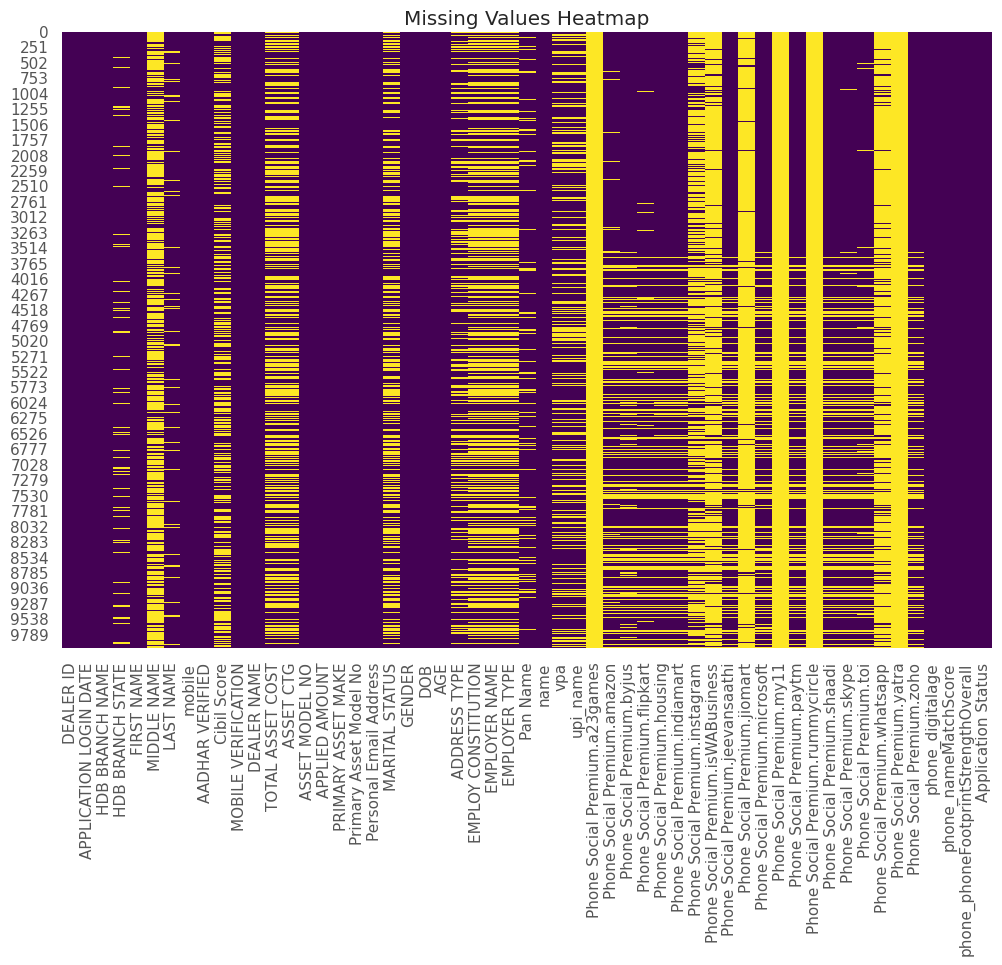

In [19]:
# Check for missing values
print("Missing Values Count:")
print(train_df.isnull().sum())

# Visualize missing values (if needed)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


<Axes: >

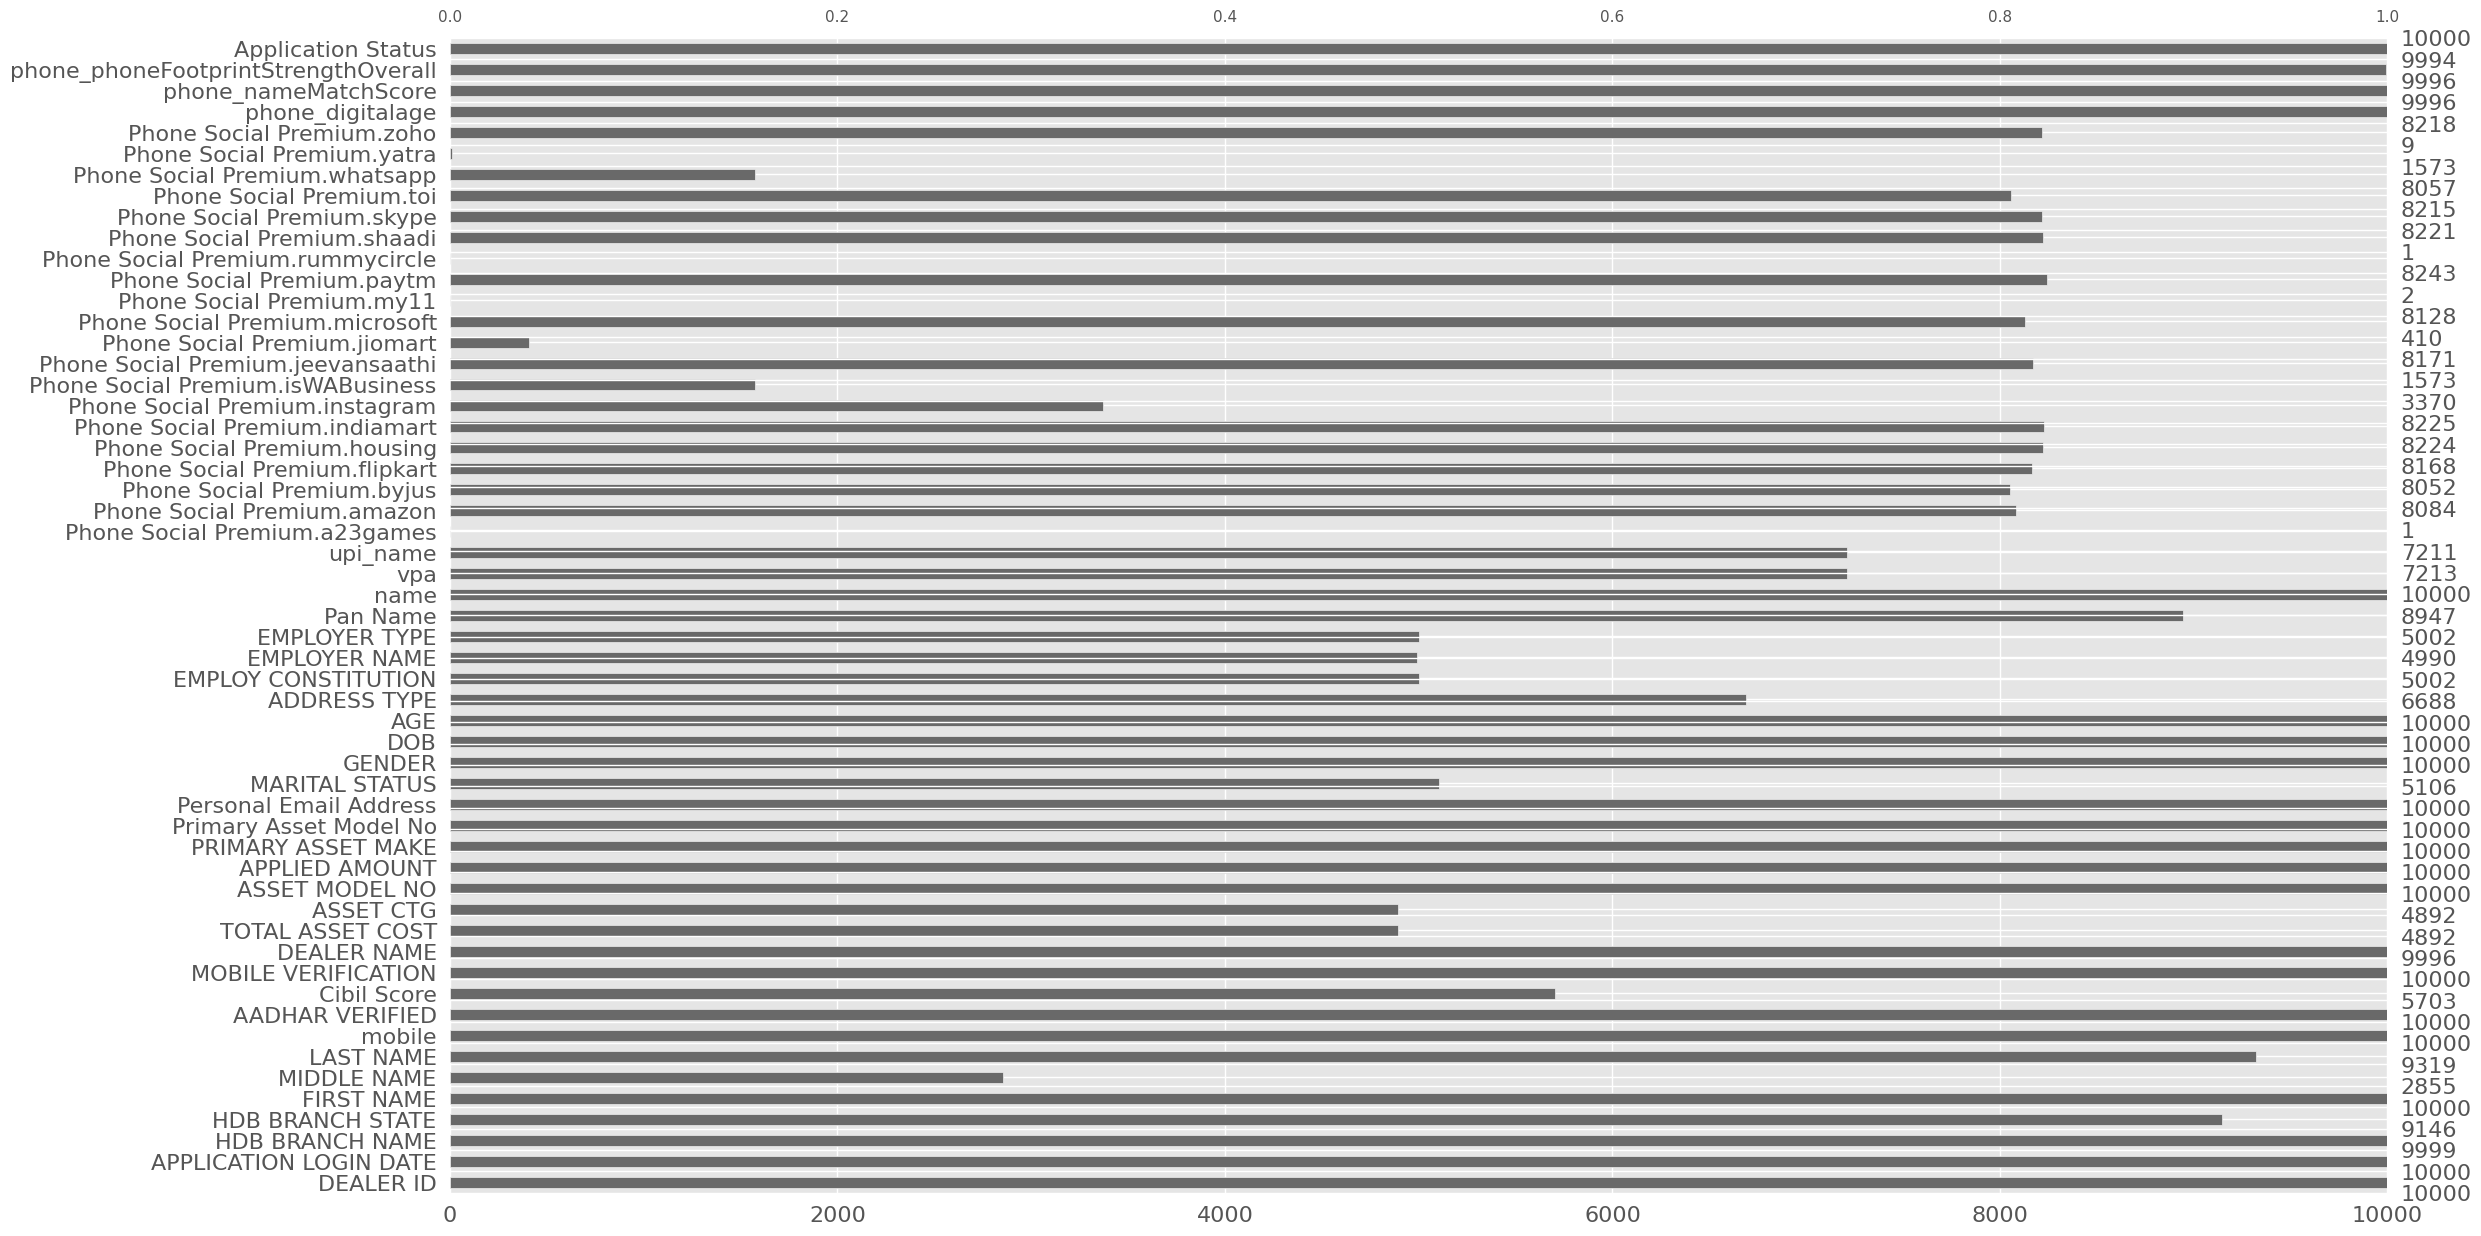

In [20]:
import missingno as msno
msno.bar(train_df)

<Axes: >

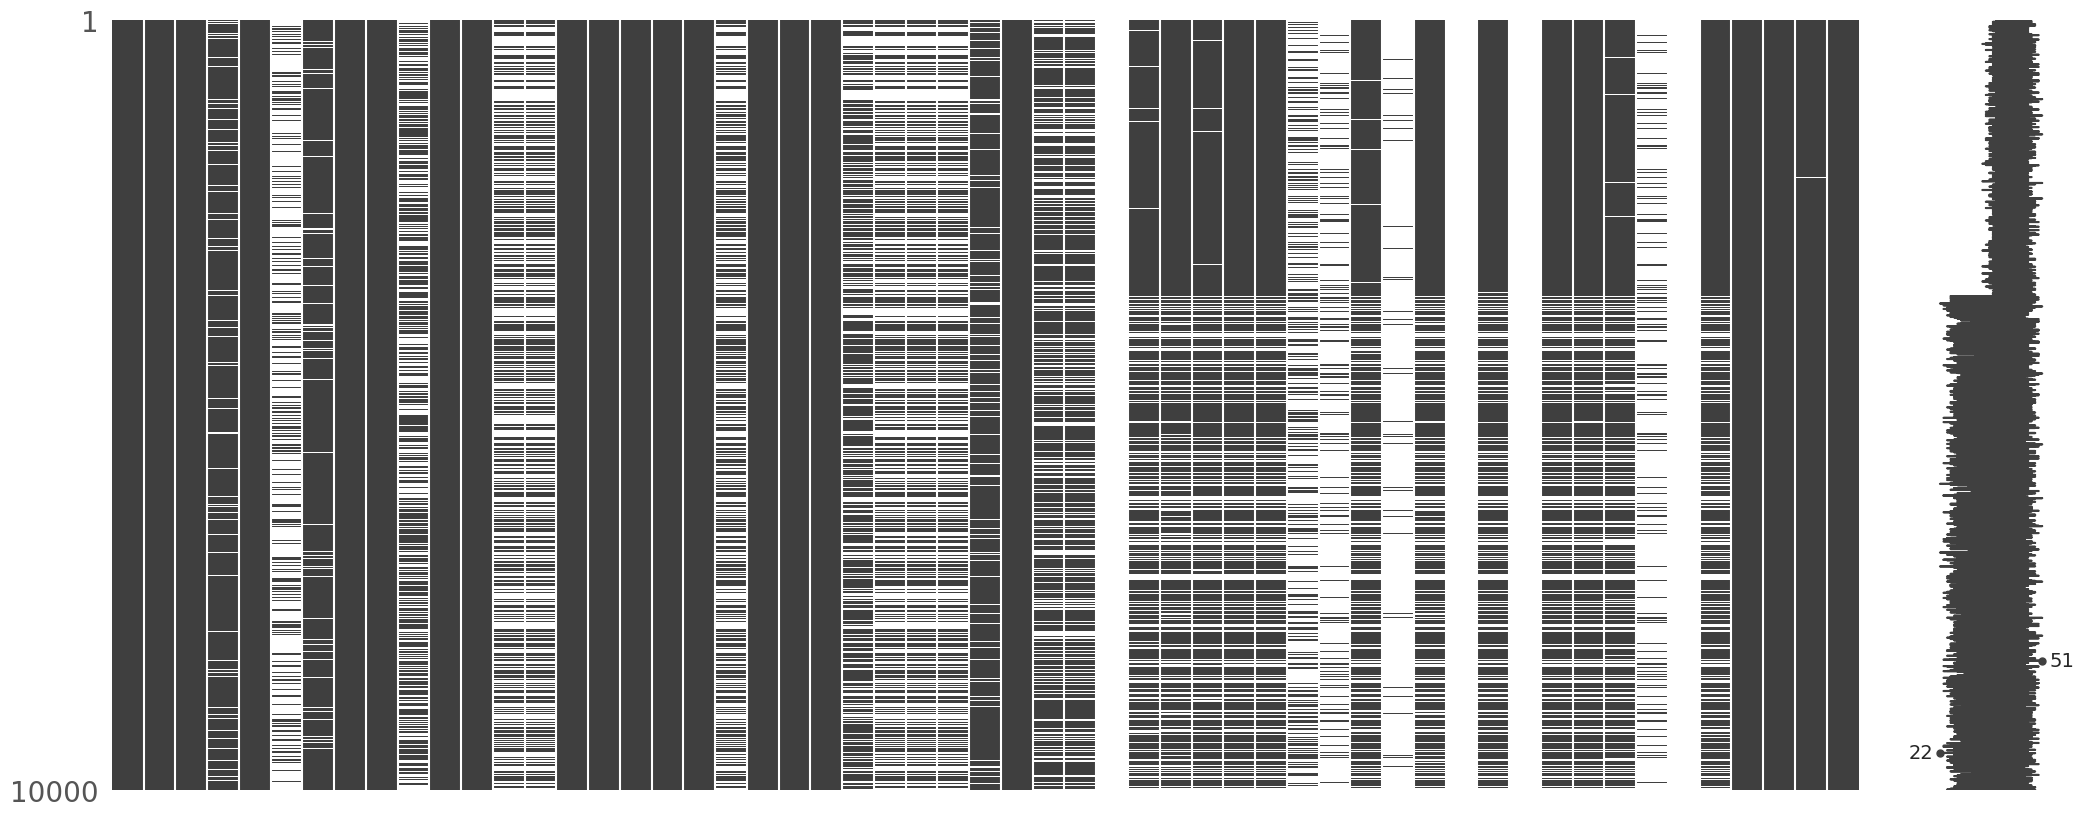

In [21]:
msno.matrix(train_df)

<Axes: >

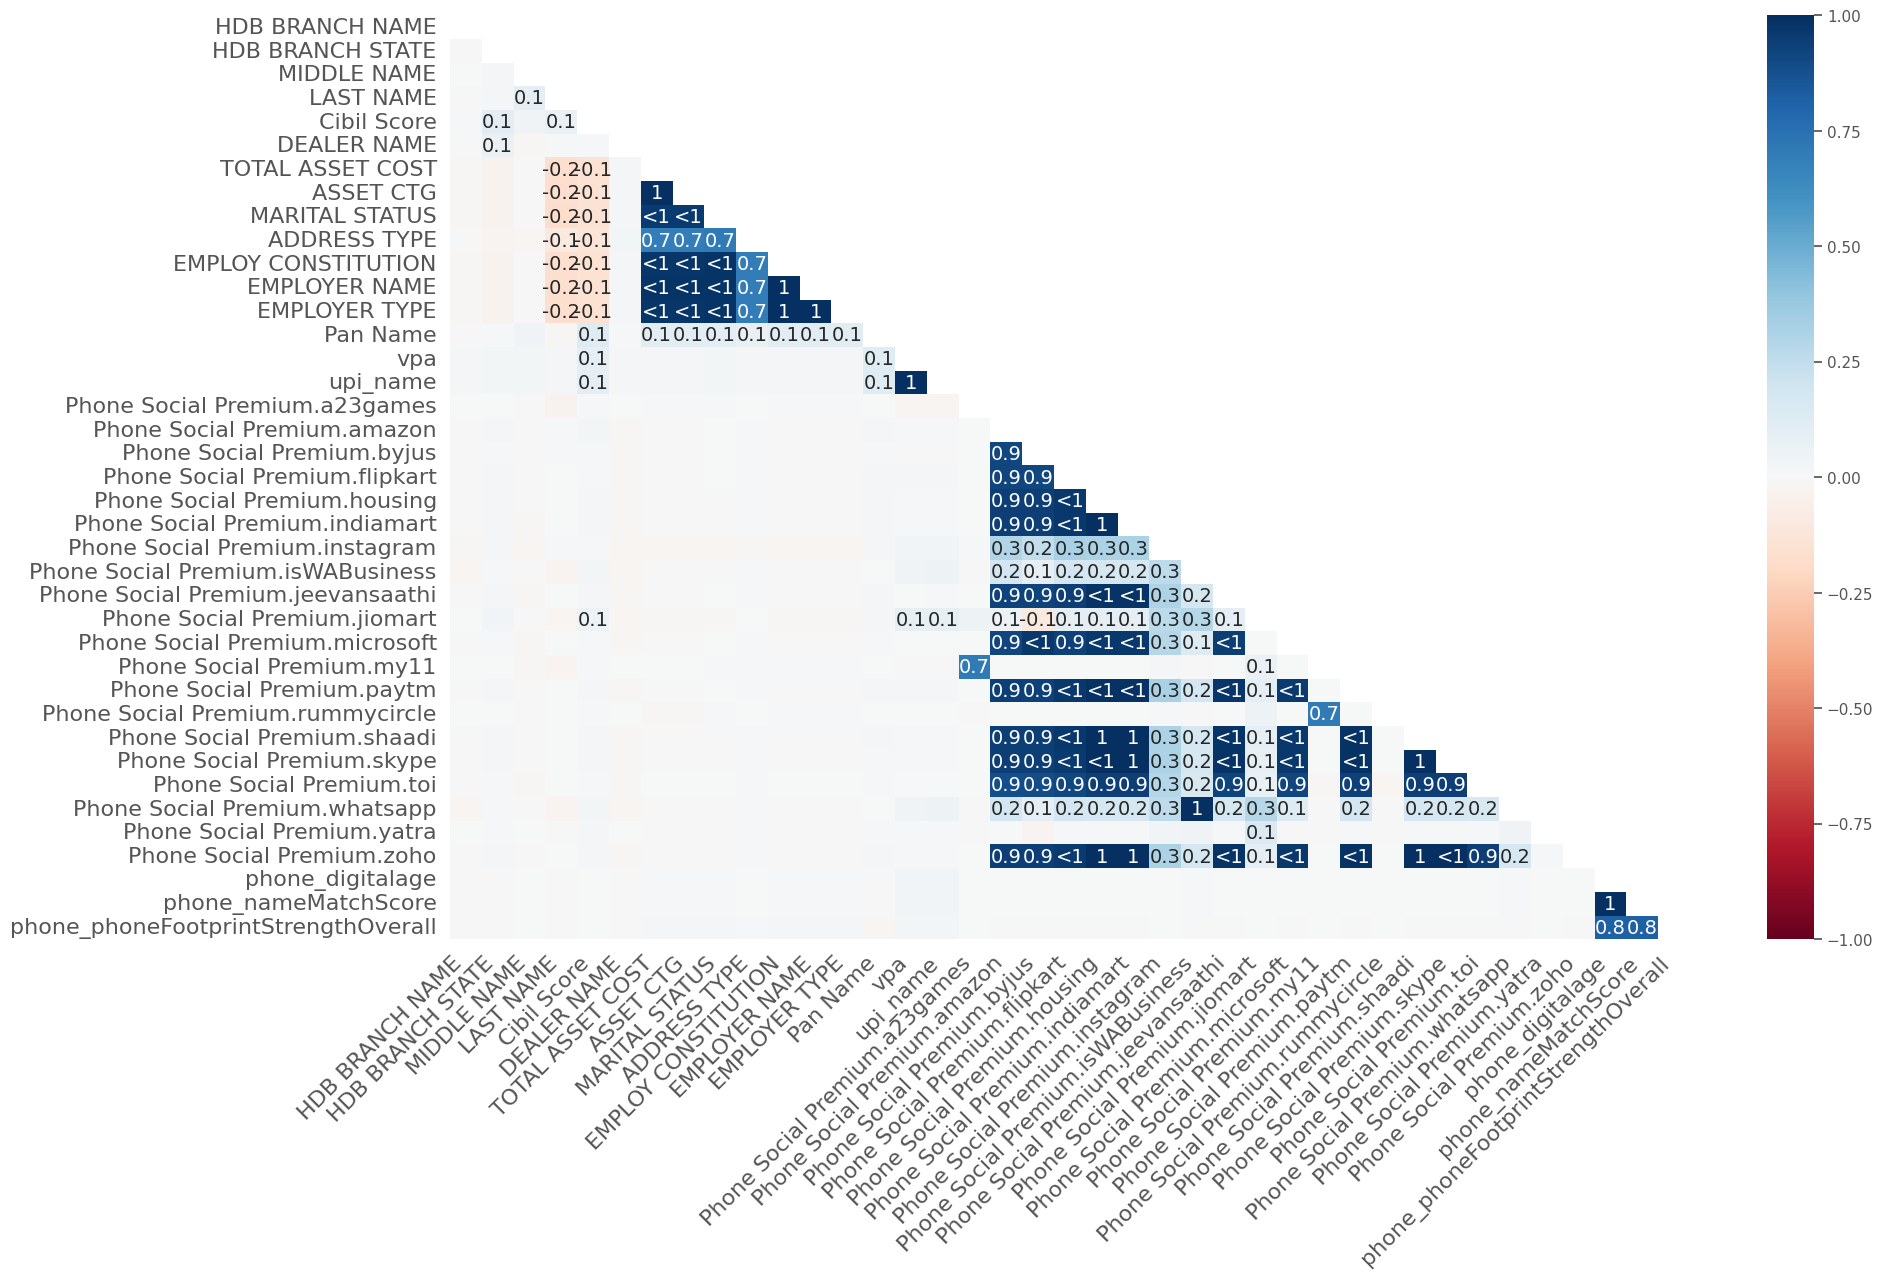

In [22]:
msno.heatmap(train_df)

array([[<Axes: title={'center': 'DEALER ID'}>,
        <Axes: title={'center': 'mobile'}>,
        <Axes: title={'center': 'TOTAL ASSET COST'}>,
        <Axes: title={'center': 'ASSET MODEL NO'}>,
        <Axes: title={'center': 'APPLIED AMOUNT'}>],
       [<Axes: title={'center': 'DOB'}>, <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'Phone Social Premium.a23games'}>,
        <Axes: title={'center': 'Phone Social Premium.amazon'}>,
        <Axes: title={'center': 'Phone Social Premium.byjus'}>],
       [<Axes: title={'center': 'Phone Social Premium.flipkart'}>,
        <Axes: title={'center': 'Phone Social Premium.housing'}>,
        <Axes: title={'center': 'Phone Social Premium.indiamart'}>,
        <Axes: title={'center': 'Phone Social Premium.instagram'}>,
        <Axes: title={'center': 'Phone Social Premium.isWABusiness'}>],
       [<Axes: title={'center': 'Phone Social Premium.jeevansaathi'}>,
        <Axes: title={'center': 'Phone Social Premium.jiomart'}>,
 

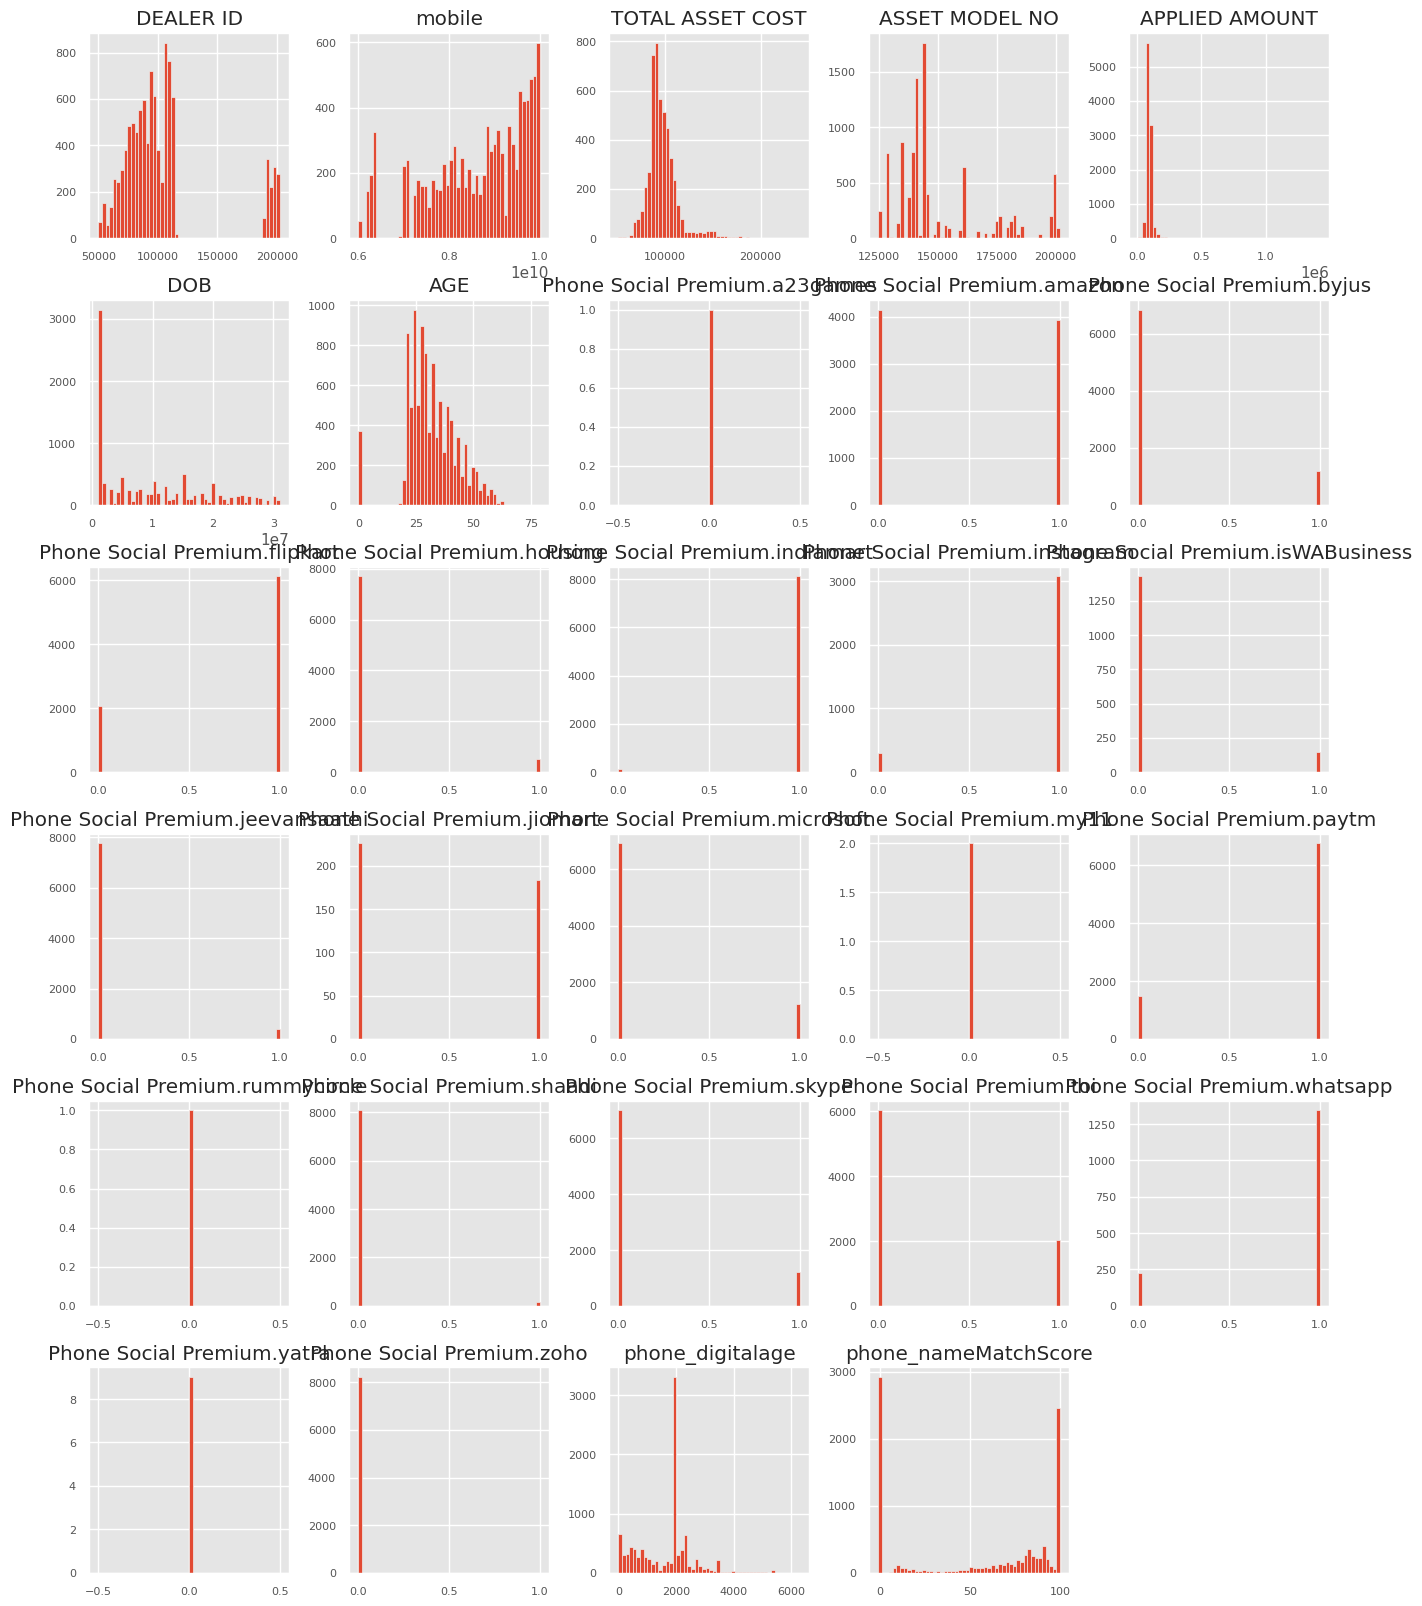

In [23]:
df_num = train_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

# Categorical and Numerical Variables Analysis

In [24]:
# Categorical Variables Analysis
categorical_cols = train_df.select_dtypes(include=['object']).columns
print("\nCategorical Variables in the training set:")
print(categorical_cols)

# Check for missing values
print("Missing Values Count:")
print(categorical_cols.isnull().sum())


Categorical Variables in the training set:
Index(['APPLICATION LOGIN DATE', 'HDB BRANCH NAME', 'HDB BRANCH STATE',
       'FIRST NAME', 'MIDDLE NAME', 'LAST NAME', 'AADHAR VERIFIED',
       'Cibil Score', 'DEALER NAME', 'ASSET CTG', 'PRIMARY ASSET MAKE',
       'Primary Asset Model No', 'Personal Email Address', 'MARITAL STATUS',
       'GENDER', 'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME',
       'EMPLOYER TYPE', 'Pan Name', 'name', 'vpa', 'upi_name',
       'phone_phoneFootprintStrengthOverall', 'Application Status'],
      dtype='object')
Missing Values Count:
0


In [25]:
# Numerical Variables Analysis
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical Variables in the training set:")
print(numerical_cols)
# Check for missing values
print("Missing Values Count:")
print(numerical_cols.isnull().sum())



Numerical Variables in the training set:
Index(['DEALER ID', 'mobile', 'TOTAL ASSET COST', 'ASSET MODEL NO',
       'APPLIED AMOUNT', 'DOB', 'AGE', 'Phone Social Premium.a23games',
       'Phone Social Premium.amazon', 'Phone Social Premium.byjus',
       'Phone Social Premium.flipkart', 'Phone Social Premium.housing',
       'Phone Social Premium.indiamart', 'Phone Social Premium.instagram',
       'Phone Social Premium.isWABusiness',
       'Phone Social Premium.jeevansaathi', 'Phone Social Premium.jiomart',
       'Phone Social Premium.microsoft', 'Phone Social Premium.my11',
       'Phone Social Premium.paytm', 'Phone Social Premium.rummycircle',
       'Phone Social Premium.shaadi', 'Phone Social Premium.skype',
       'Phone Social Premium.toi', 'Phone Social Premium.whatsapp',
       'Phone Social Premium.yatra', 'Phone Social Premium.zoho',
       'phone_digitalage', 'phone_nameMatchScore'],
      dtype='object')
Missing Values Count:
0


In [26]:
# Ensure the categorical column exists before filling missing values
categorical_cols = ['HDB BRANCH STATE', 'AADHAR VERIFIED', 'MOBILE VERIFICATION', 'ASSET CTG',
                    'PRIMARY ASSET MAKE', 'MARITAL STATUS', 'GENDER', 'EMPLOY CONSTITUTION',
                    'EMPLOYER NAME', 'EMPLOYER TYPE']

# Fill missing values in categorical columns with the most frequent value (mode)
for col in categorical_cols:
    if col in train_df.columns:
        if train_df[col].isnull().sum() > 0:
            train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    else:
        print(f"Column '{col}' not found in train_df, skipping.")

    if col in test_df.columns:
        if test_df[col].isnull().sum() > 0:
            test_df[col].fillna(test_df[col].mode()[0], inplace=True)
    else:
        print(f"Column '{col}' not found in test_df, skipping.")


In [27]:
# Dropping non-essential columns (example)
train_df.drop(columns=['MIDDLE NAME', 'LAST NAME', 'vpa', 'upi_name','MOBILE VERIFICATION'], inplace=True)
test_df.drop(columns=['MIDDLE NAME', 'vpa', 'upi_name','MOBILE VERIFICATION'], inplace=True)

In [28]:
# Numerical variables: Fill with mean or median
numerical_cols = ['TOTAL ASSET COST']
for col in numerical_cols:
    if train_df[col].isnull().sum() > 0:
        train_df[col].fillna(train_df[col].median(), inplace=True)
        test_df[col].fillna(test_df[col].median(), inplace=True)

In [29]:
# Dropping social media-related columns (if not necessary)
social_media_cols = [col for col in train_df.columns if 'Phone Social Premium' in col]
train_df.drop(columns=social_media_cols, inplace=True)
test_df.drop(columns=social_media_cols, inplace=True)

In [30]:
# Identify which columns still have missing values
missing_train = train_df.isnull().sum()
print(missing_train[missing_train > 0])

HDB BRANCH NAME                           1
Cibil Score                            4297
DEALER NAME                               4
ADDRESS TYPE                           3312
Pan Name                               1053
phone_digitalage                          4
phone_nameMatchScore                      4
phone_phoneFootprintStrengthOverall       6
dtype: int64


In [31]:
# Drop rows with missing values in 'phone_digitalage' and 'phone_nameMatchScore'
train_df.dropna(subset=['phone_digitalage', 'phone_nameMatchScore'], inplace=True)

# Verify missing values after dropping rows
print("Remaining Missing Values (Training):", train_df.isnull().sum().sum())

Remaining Missing Values (Training): 8665


In [32]:
print("Remaining Missing Values (Training):\n", train_df.isnull().sum().sum())
print("Remaining Missing Values (Test):\n", test_df.isnull().sum().sum())

Remaining Missing Values (Training):
 8665
Remaining Missing Values (Test):
 1818


In [33]:
train_df.shape

(9996, 30)

In [34]:
test_df.shape

(2000, 31)

In [35]:
train_df.columns

Index(['DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME',
       'HDB BRANCH STATE', 'FIRST NAME', 'mobile', 'AADHAR VERIFIED',
       'Cibil Score', 'DEALER NAME', 'TOTAL ASSET COST', 'ASSET CTG',
       'ASSET MODEL NO', 'APPLIED AMOUNT', 'PRIMARY ASSET MAKE',
       'Primary Asset Model No', 'Personal Email Address', 'MARITAL STATUS',
       'GENDER', 'DOB', 'AGE', 'ADDRESS TYPE', 'EMPLOY CONSTITUTION',
       'EMPLOYER NAME', 'EMPLOYER TYPE', 'Pan Name', 'name',
       'phone_digitalage', 'phone_nameMatchScore',
       'phone_phoneFootprintStrengthOverall', 'Application Status'],
      dtype='object')

In [36]:
# Compare columns between train_df and test_df
train_columns = set(train_df.columns)
test_columns = set(test_df.columns)

# Find the extra or missing columns
extra_in_test = test_columns - train_columns
missing_in_train = train_columns - test_columns

print("Extra columns in test data:", extra_in_test)
print("Missing columns in train data:", missing_in_train)

Extra columns in test data: {'UID', 'LAST NAME'}
Missing columns in train data: {'Application Status'}


In [37]:
# Drop 'LAST NAME' from the test dataset as it's not present in training data
test_df.drop(columns=['LAST NAME'], inplace=True)

In [38]:
# Ensure columns in both datasets are consistent
assert set(train_df.columns) - {'Application Status'} == set(test_df.columns) - {'UID'}

In [39]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'O']  # Categorical columns
    num_but_cat = [col for col in dataframe.columns if
                   dataframe[col].nunique() < cat_th and dataframe[col].dtype != 'O']  # Numeric but categorical
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and dataframe[col].dtype == 'O']  # Categorical but cardinal
    cat_cols += num_but_cat  # Combine categorical columns
    cat_cols = [col for col in cat_cols if col not in cat_but_car]  # Exclude cardinal columns from categorical columns

    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != 'O']  # Numerical columns
    num_cols = [col for col in num_cols if col not in num_but_cat]  # Exclude numeric-looking categories

    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [40]:
def identify_check(dataframe):
    print('-' * 80)
    print(f'Categorical : {cat_cols}')
    print('-' * 80)
    print(f'Numerical : {num_cols}')
    print('-' * 80)
    print(f'Categorical but Cardinal : {cat_but_car}')

cat_cols, num_cols, cat_but_car = grab_col_names(train_df, car_th=25)
identify_check(train_df)

Observations: 9996
Variables: 30
cat_cols: 11
num_cols: 9
cat_but_car: 10
num_but_cat: 0
--------------------------------------------------------------------------------
Categorical : ['HDB BRANCH STATE', 'AADHAR VERIFIED', 'ASSET CTG', 'PRIMARY ASSET MAKE', 'MARITAL STATUS', 'GENDER', 'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER TYPE', 'phone_phoneFootprintStrengthOverall', 'Application Status']
--------------------------------------------------------------------------------
Numerical : ['DEALER ID', 'mobile', 'TOTAL ASSET COST', 'ASSET MODEL NO', 'APPLIED AMOUNT', 'DOB', 'AGE', 'phone_digitalage', 'phone_nameMatchScore']
--------------------------------------------------------------------------------
Categorical but Cardinal : ['APPLICATION LOGIN DATE', 'HDB BRANCH NAME', 'FIRST NAME', 'Cibil Score', 'DEALER NAME', 'Primary Asset Model No', 'Personal Email Address', 'EMPLOYER NAME', 'Pan Name', 'name']


--------------------------------------------------------------------------------
                  HDB BRANCH STATE  Ratio (%)
HDB BRANCH STATE                             
UTTAR PRADESH                 2835  28.361345
BIHAR                          818   8.183273
HARYANA                        618   6.182473
MADHYA PRADESH                 605   6.052421
MAHARASHTRA                    532   5.322129
DELHI                          510   5.102041
TAMIL NADU                     500   5.002001
RAJASTHAN                      452   4.521809
JHARKHAND                      380   3.801521
UTTARAKHAND                    374   3.741497
KARNATAKA                      369   3.691477
WEST BENGAL                    356   3.561425
TELANGANA                      294   2.941176
PUNJAB                         256   2.561024
ORISSA                         249   2.490996
KERALA                         227   2.270908
GUJARAT                        217   2.170868
ASSAM                          208   2.080832

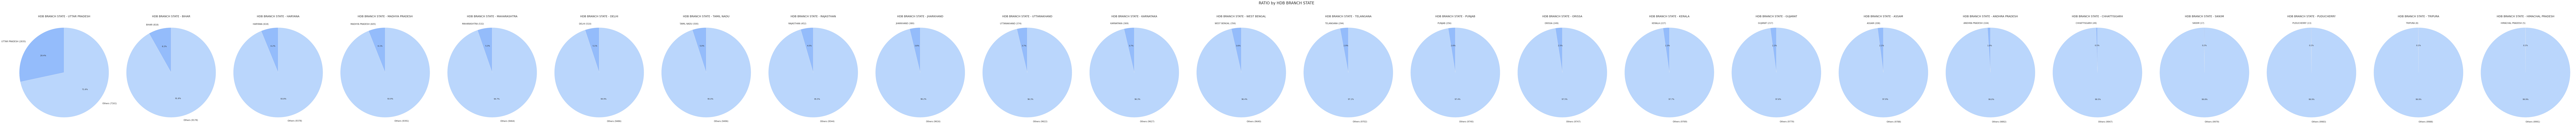

--------------------------------------------------------------------------------
                 AADHAR VERIFIED  Ratio (%)
AADHAR VERIFIED                            
NO                          9996      100.0
--------------------------------------------------------------------------------


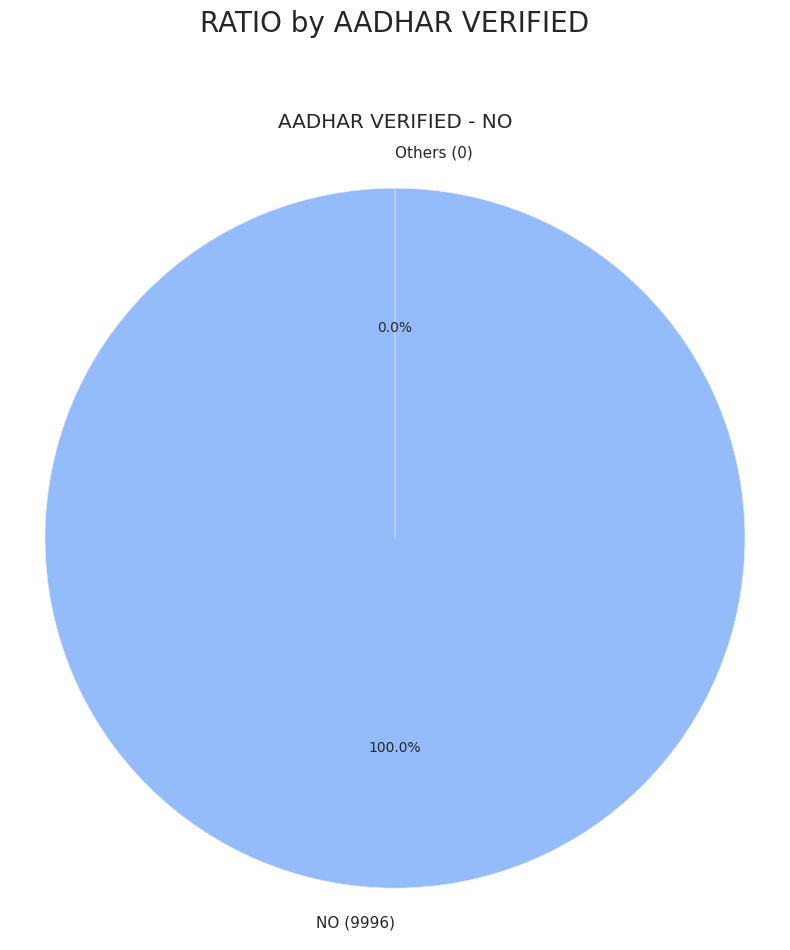

--------------------------------------------------------------------------------
           ASSET CTG  Ratio (%)
ASSET CTG                      
MCECA           6925  69.277711
SCECA           1227  12.274910
MCEXA           1186  11.864746
SCEXA            264   2.641056
MCPRA            126   1.260504
MCECB             69   0.690276
MOECA             67   0.670268
MCECC             46   0.460184
MCEXB             28   0.280112
ESECB             25   0.250100
ESNRC             22   0.220088
EMECA             10   0.100040
ESNRB              1   0.010004
--------------------------------------------------------------------------------


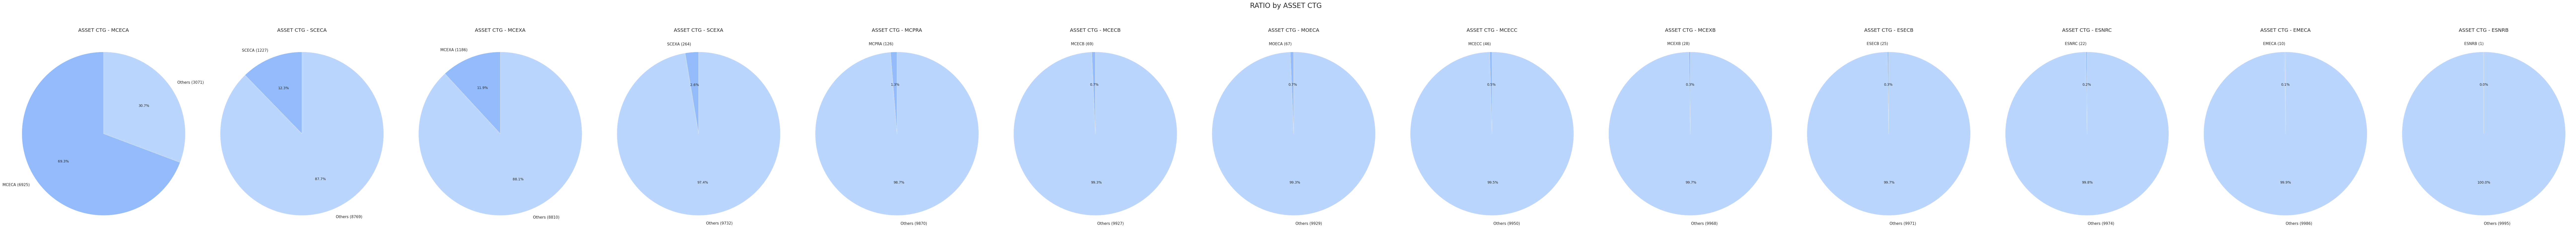

--------------------------------------------------------------------------------
                              PRIMARY ASSET MAKE  Ratio (%)
PRIMARY ASSET MAKE                                         
HERO MOTORS                                 3617  36.184474
HONDA MOTORS                                3256  32.573029
TVS MOTOR CO                                1416  14.165666
BAJAJ AUTO INDIA                             747   7.472989
SUZUKI MOTORCYCLE                            485   4.851941
YAMAHA MOTOR                                 224   2.240896
AMO ELECTRIC                                  68   0.680272
OKAYA ELECTRIC                                49   0.490196
AMPERE MOTORS                                 26   0.260104
OKINAWA ELECTRIC                              26   0.260104
HOP ELECTRIC                                  19   0.190076
BENLING ELECTRIC                              17   0.170068
HERO ELECTRIC VEHICLES P LTD                  15   0.150060
PIAGGIO INDIA      

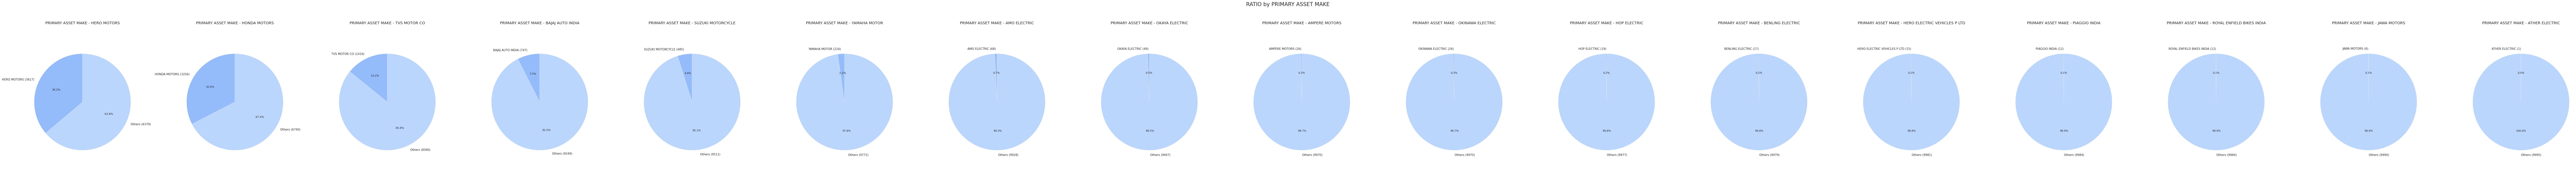

--------------------------------------------------------------------------------
                MARITAL STATUS  Ratio (%)
MARITAL STATUS                           
Married                   8723  87.264906
Single                    1273  12.735094
--------------------------------------------------------------------------------


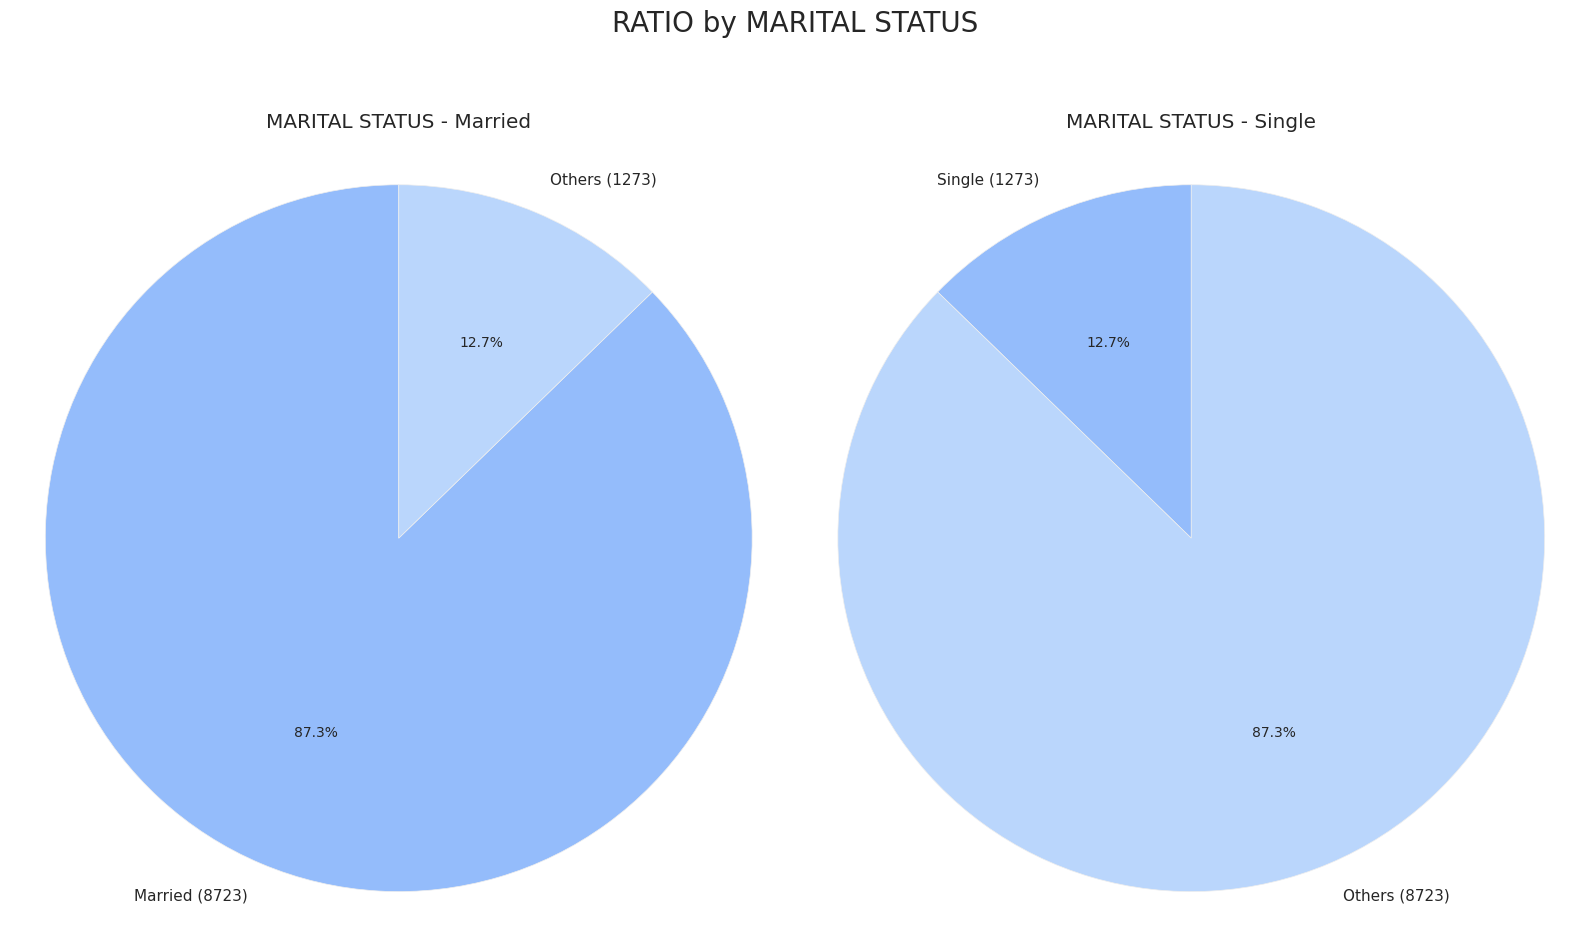

--------------------------------------------------------------------------------
        GENDER  Ratio (%)
GENDER                   
Male      8405  84.083633
Female    1591  15.916367
--------------------------------------------------------------------------------


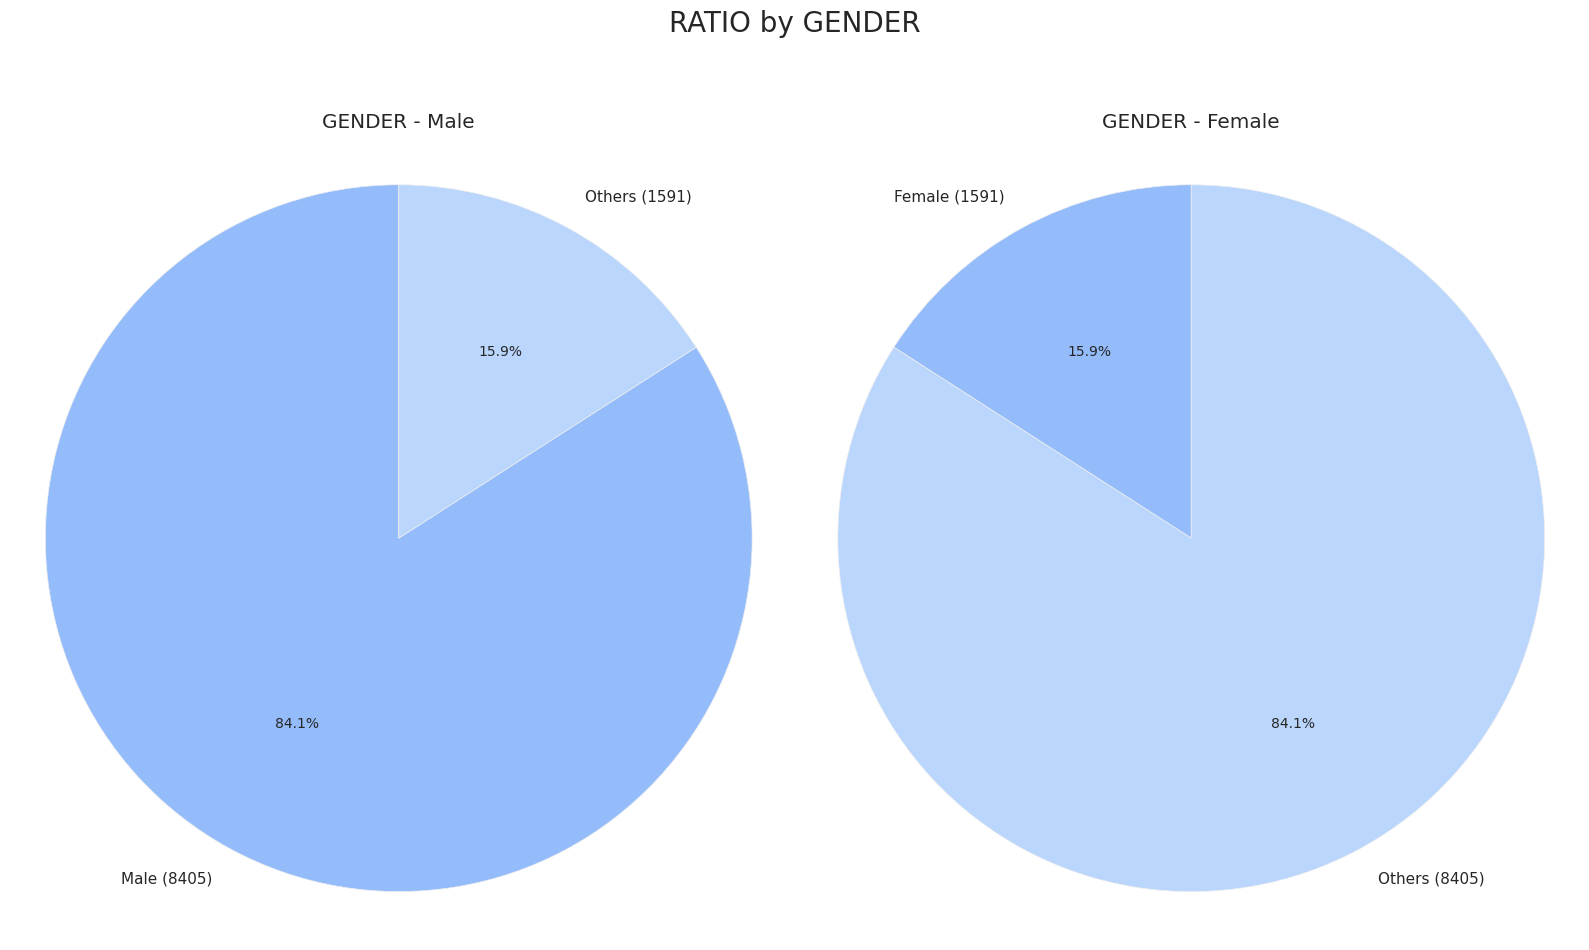

--------------------------------------------------------------------------------
                    ADDRESS TYPE  Ratio (%)
ADDRESS TYPE                               
Self/Spouse Owned           2272  22.729092
RESIDENCE                   2175  21.758703
Parental                    1788  17.887155
Rented                       417   4.171669
Company Provided              10   0.100040
PARENT OWNED-HOUSE             9   0.090036
OWNED-BUNGLOW                  5   0.050020
OWNED-PENTHOUSE                4   0.040016
OWNDED-FLAT                    3   0.030012
OWNED-ROWHOUSE                 1   0.010004
PARENT OWNED-FLAT              1   0.010004
RENTED-ROWHOUSE                1   0.010004
--------------------------------------------------------------------------------


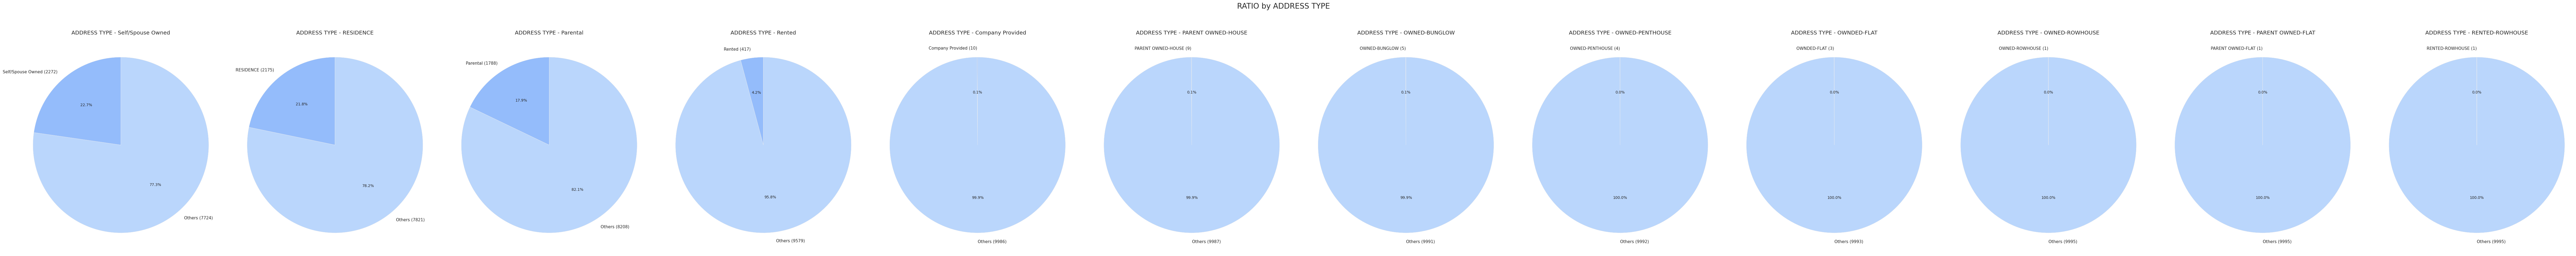

--------------------------------------------------------------------------------
                     EMPLOY CONSTITUTION  Ratio (%)
EMPLOY CONSTITUTION                                
SELF-EMPLOYED                       8466  84.693878
SALARIED                            1530  15.306122
--------------------------------------------------------------------------------


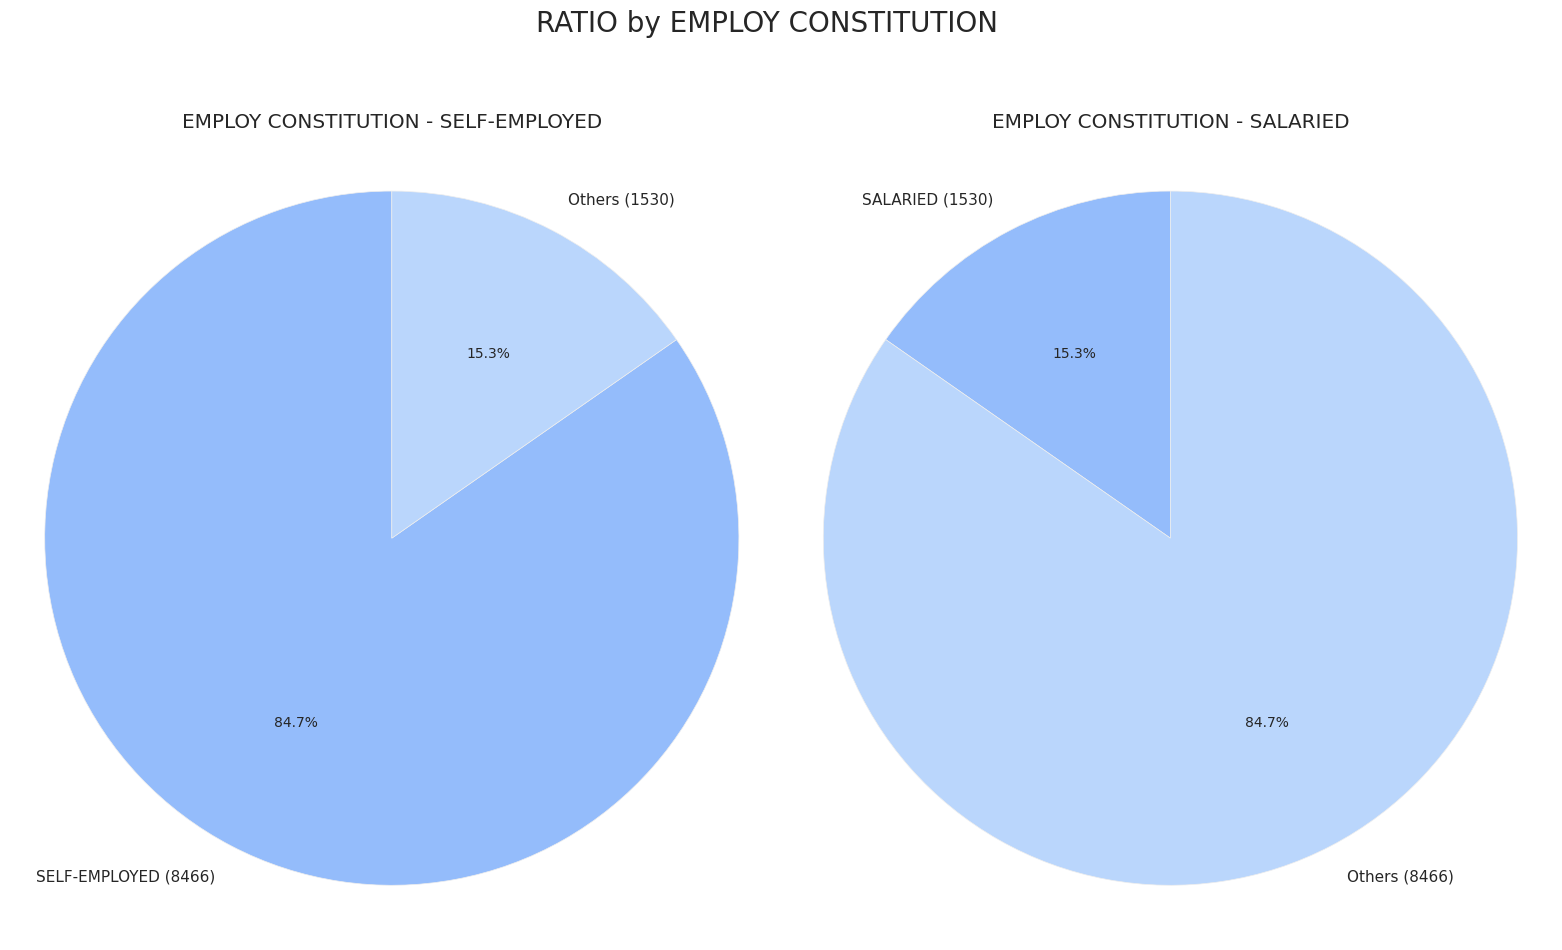

--------------------------------------------------------------------------------
                EMPLOYER TYPE  Ratio (%)
EMPLOYER TYPE                           
SELF-EMPLOYED            8467  84.703882
SALARIED                 1354  13.545418
Non-Government            152   1.520608
Government                 23   0.230092
--------------------------------------------------------------------------------


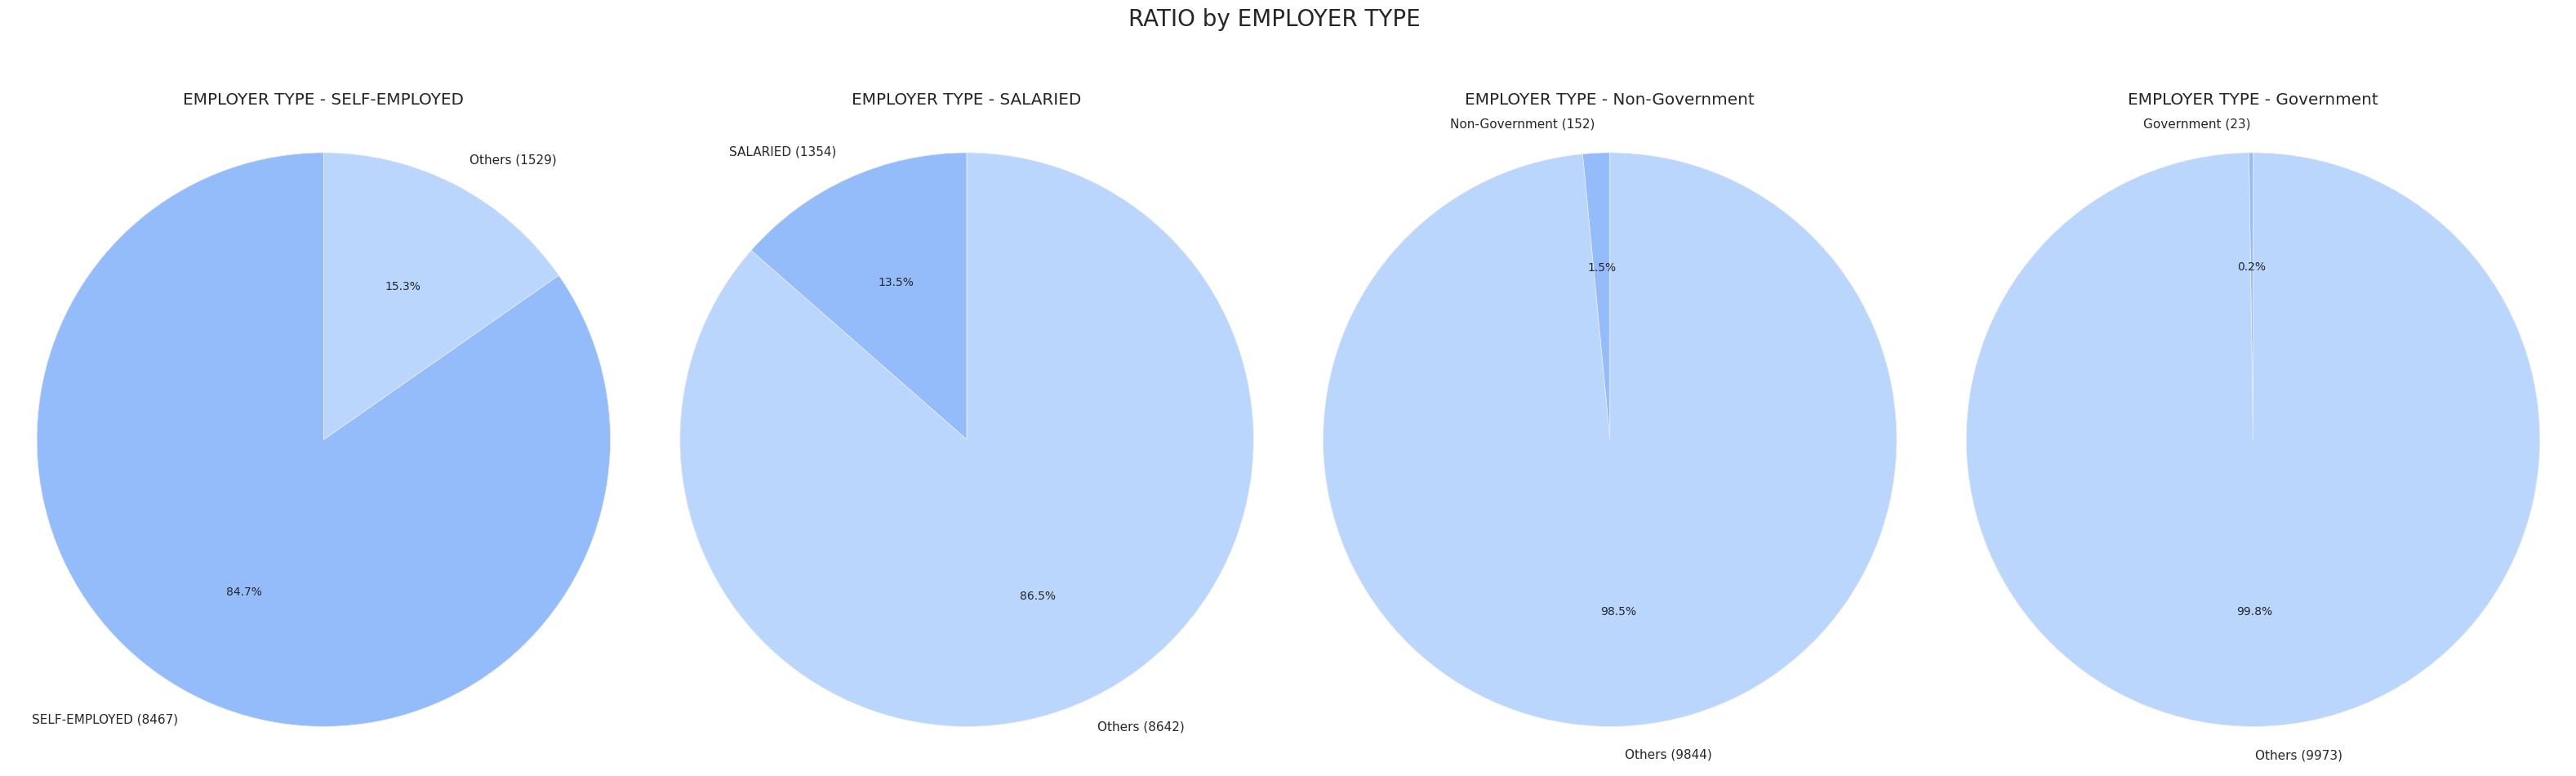

--------------------------------------------------------------------------------
                                     phone_phoneFootprintStrengthOverall  \
phone_phoneFootprintStrengthOverall                                        
Medium                                                              4599   
High                                                                4141   
Low                                                                 1179   
Very High                                                             44   
Very Low                                                              31   

                                     Ratio (%)  
phone_phoneFootprintStrengthOverall             
Medium                               46.008403  
High                                 41.426571  
Low                                  11.794718  
Very High                             0.440176  
Very Low                              0.310124  
-------------------------------------------

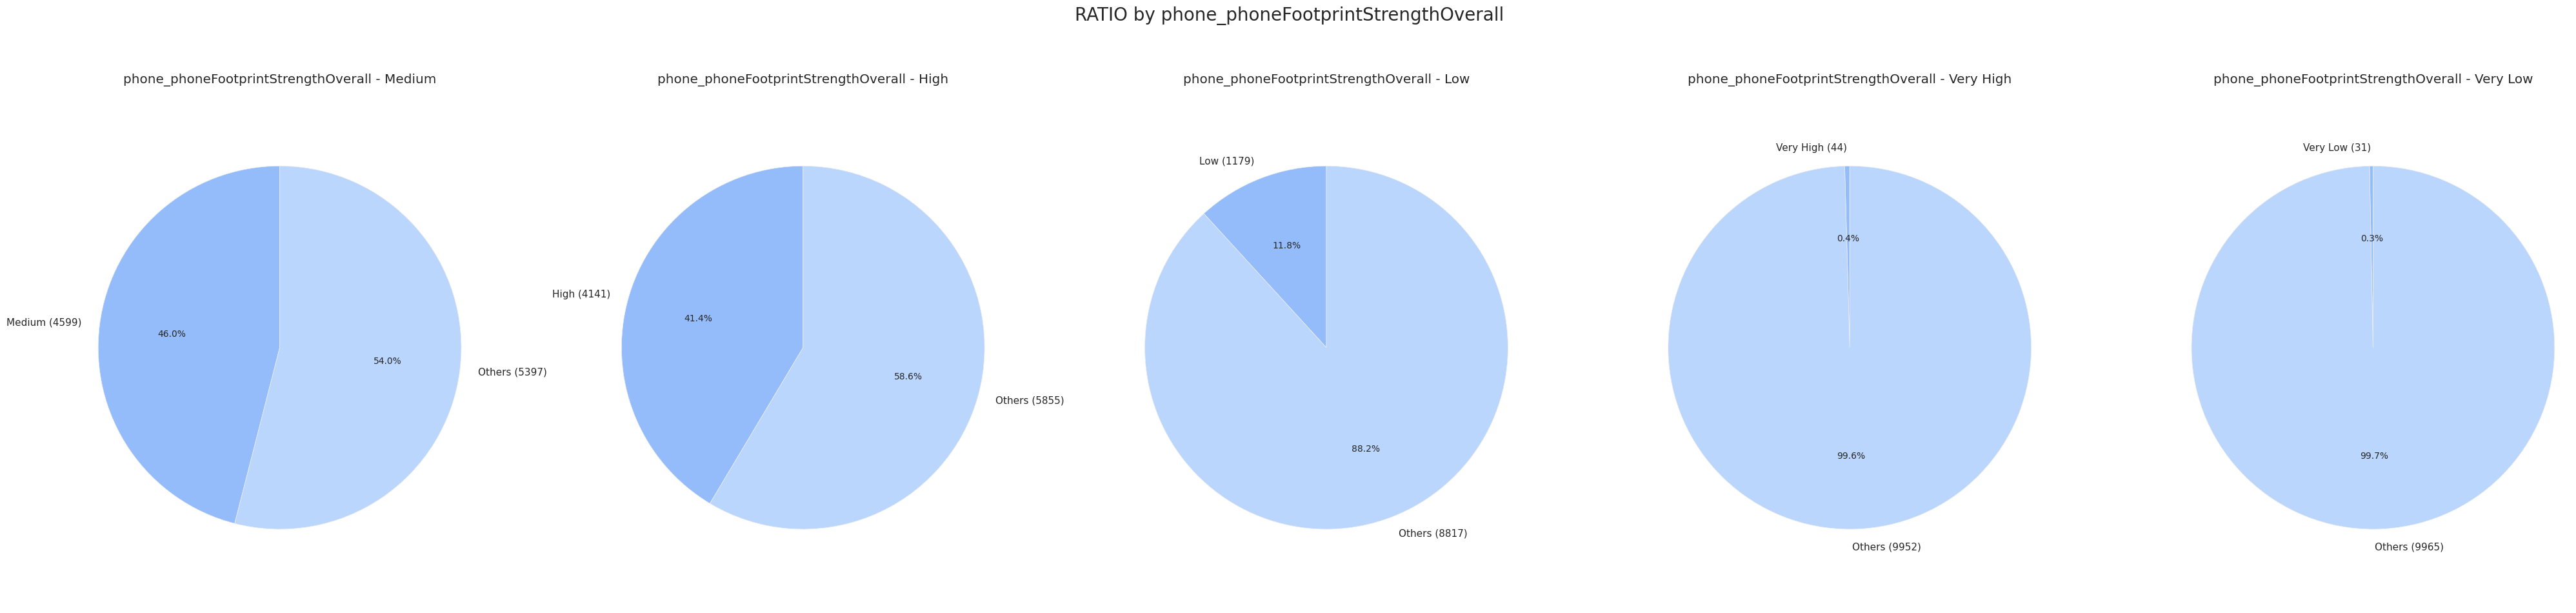

--------------------------------------------------------------------------------
                    Application Status  Ratio (%)
Application Status                               
APPROVED                          6676  66.786715
DECLINED                          3320  33.213285
--------------------------------------------------------------------------------


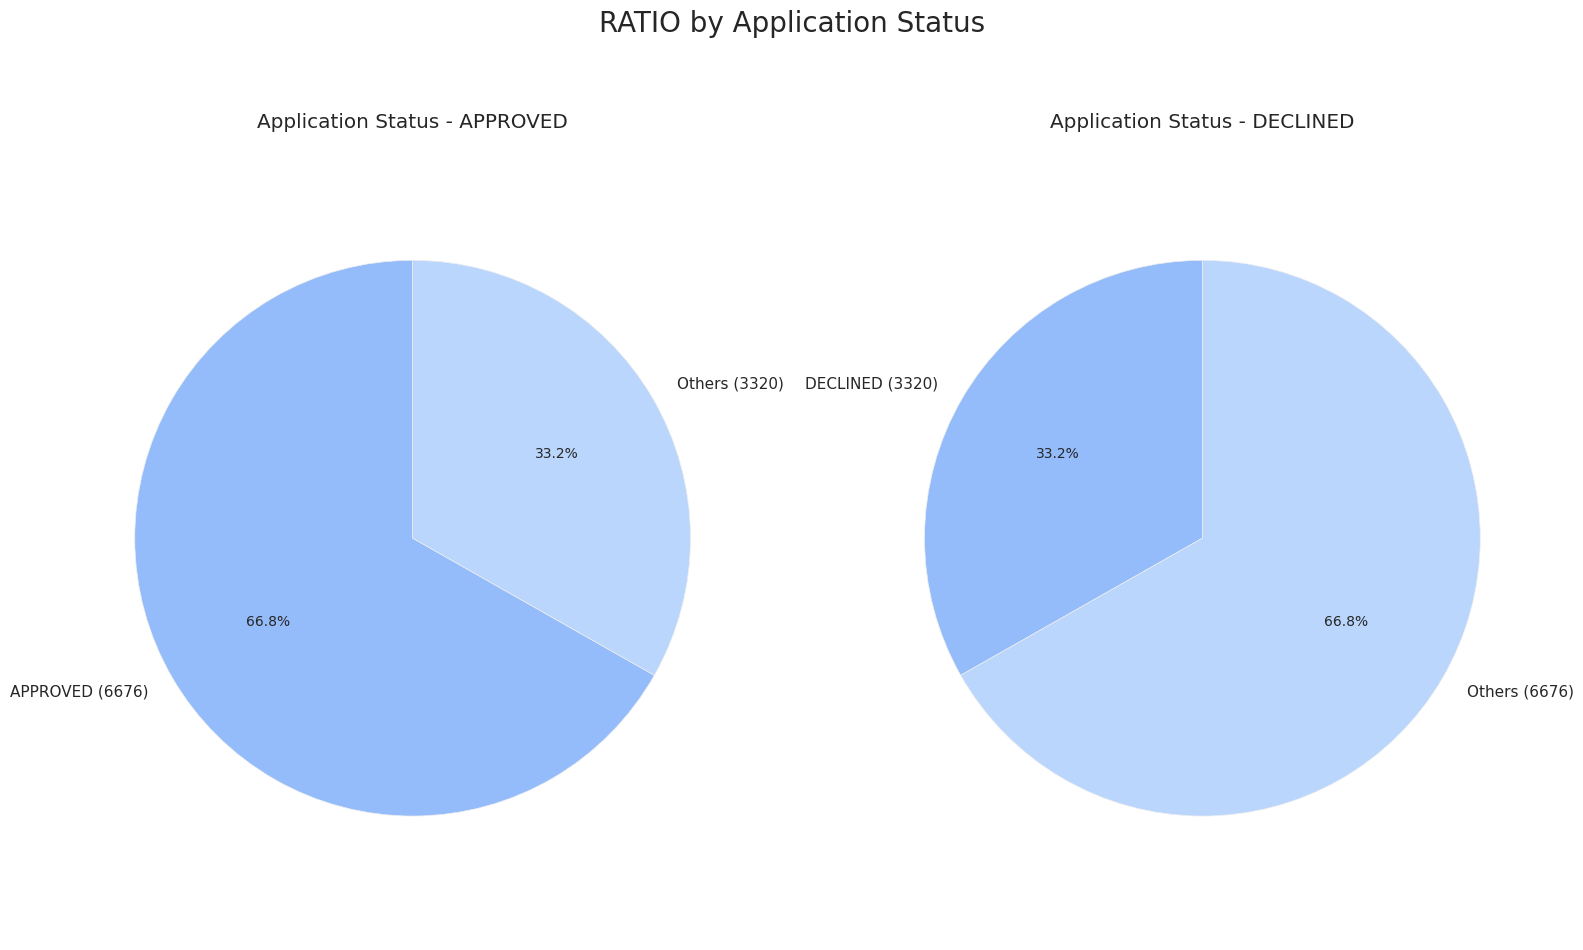

In [41]:
def to_analysis_cat(dataframe, c_cols, ratio=False, plot=False):
    print('-' * 80)

    # Convert boolean columns to integers for analysis
    if dataframe[c_cols].dtype == 'bool':
        dataframe[c_cols] = dataframe[c_cols].astype(int)

    # Display value counts and ratios
    if ratio:
        print(pd.DataFrame({c_cols: dataframe[c_cols].value_counts(),
                            'Ratio (%)': 100 * dataframe[c_cols].value_counts() / len(dataframe)}))

    print('-' * 80)

    # Plot pie charts if requested
    if plot:
        values = dataframe[c_cols].value_counts()
        num_values = len(values)

        if num_values == 1:
            # Only one category, no need for multiple subplots
            fig, ax = plt.subplots(figsize=(8, 9))
            ax.pie([values.iloc[0], len(dataframe) - values.iloc[0]],
                   labels=[f'{values.index[0]} ({values.iloc[0]})', f'Others ({len(dataframe) - values.iloc[0]})'],
                   colors=['#94bcfb', '#bad6fc'], autopct='%1.1f%%', startangle=90)
            ax.set_title(f'{c_cols} - {values.index[0]}')
            ax.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.

        else:
            fig, axes = plt.subplots(1, num_values, figsize=(num_values * 8, 9))
            if num_values == 1:  # Single plot scenario
                axes = [axes]  # Turn it into a list to standardize processing

            for i, (index, value) in enumerate(values.items()):
                ax = axes[i]
                ax.pie([value, len(dataframe) - value],
                       labels=[f'{index} ({value})', f'Others ({len(dataframe) - value})'],
                       colors=['#94bcfb', '#bad6fc'], autopct='%1.1f%%', startangle=90)
                ax.set_title(f'{c_cols} - {index}')
                ax.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.

        plt.suptitle(f'RATIO by {c_cols}', y=1.05, fontsize=20)
        plt.tight_layout()
        plt.show()

# Loop through categorical columns
for col in cat_cols:
    to_analysis_cat(train_df, col, ratio=True, plot=True)


                       count          mean           std           min  \
DEALER ID             9996.0  1.029451e+05  3.783455e+04  4.984900e+04   
mobile                9996.0  8.629707e+09  1.077782e+09  6.000042e+09   
TOTAL ASSET COST      9996.0  9.597270e+04  1.182308e+04  5.187300e+04   
ASSET MODEL NO        9996.0  1.506654e+05  2.085052e+04  1.245870e+05   
APPLIED AMOUNT        9996.0  9.180065e+04  2.700393e+04  1.040000e+04   
DOB                   9996.0  9.813401e+06  8.930485e+06  1.011943e+06   
AGE                   9996.0  3.178832e+01  1.119709e+01  0.000000e+00   
phone_digitalage      9996.0  1.652938e+03  9.841142e+02 -1.000000e+00   
phone_nameMatchScore  9996.0  5.564556e+01  4.210062e+01 -1.000000e+00   

                                5%           25%           50%           75%  \
DEALER ID             6.409975e+04  7.996300e+04  9.463100e+04  1.084630e+05   
mobile                6.375977e+09  7.894802e+09  8.867144e+09  9.588158e+09   
TOTAL ASSET COST   

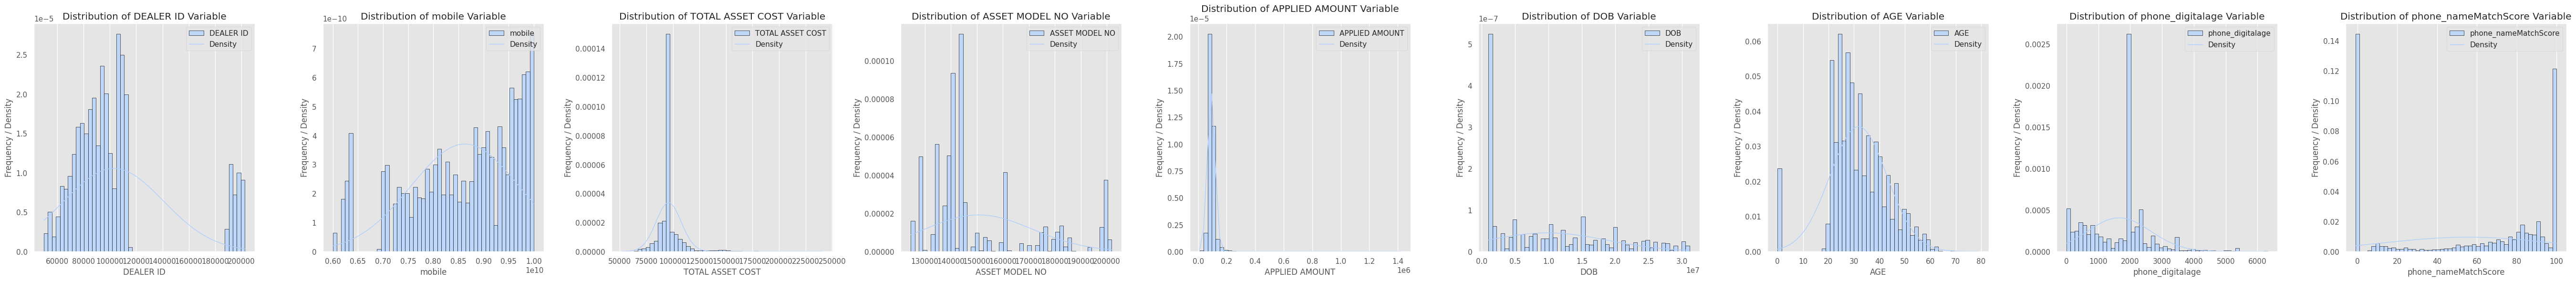

In [42]:
def to_analysis_num(dataframe, n_cols, bins=20, T=False, plot=False):
    # If T is True, print detailed statistics (with specific quantiles)
    if T:
        quantiles = [0.05, 0.25, 0.50, 0.75, 0.95, 0.99]
        print(dataframe[n_cols].describe(percentiles=quantiles).T)

    # If plot is True, generate histograms and density plots
    if plot:
        num_cols = len(n_cols)
        fig, axs = plt.subplots(nrows=1, ncols=num_cols, figsize=(6 * num_cols, 6))

        if num_cols == 1:
            axs = [axs]  # Convert single plot to list format for consistency

        # Loop through each numerical column for plotting
        for i, col in enumerate(n_cols):
            # Check for NaN and drop them before plotting
            column_data = dataframe[col].dropna()

            # Plot histogram
            n, bins_hist, patches = axs[i].hist(column_data,
                                                bins=bins, density=True,
                                                label=col, edgecolor='black',
                                                alpha=0.9, color='#bad6fc')
            # Calculate and plot the normal distribution density curve
            density = 1/(column_data.std() * (2 * np.pi)**0.5) * \
                      np.exp(-(bins_hist - column_data.mean())**2 / (2 * column_data.std()**2))
            axs[i].plot(bins_hist, density, color='#b1cffc', linewidth=1, label='Density')

            # Set titles, labels, and legends
            axs[i].set_title(f'Distribution of {col} Variable')
            axs[i].set_xlabel(col)
            axs[i].set_ylabel('Frequency / Density')
            axs[i].legend(loc='upper right')
            axs[i].grid(axis='y')

        # Adjust layout for better visibility
        plt.tight_layout()
        plt.show()

# Specify which numerical columns to analyze
num_cols = [col for col in train_df.select_dtypes(include=['int64', 'float64']).columns if 'SalePrice' not in col]

# Call the function for numerical analysis
to_analysis_num(train_df, num_cols, bins=50, T=True, plot=True)


# visualize outliers and EDA

In [43]:
test_df.shape

(2000, 30)

In [44]:
train_df.shape

(9996, 30)

In [45]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   UID                                  2000 non-null   float64
 1   DEALER ID                            2000 non-null   int64  
 2   APPLICATION LOGIN DATE               2000 non-null   object 
 3   HDB BRANCH NAME                      2000 non-null   object 
 4   HDB BRANCH STATE                     2000 non-null   object 
 5   FIRST NAME                           2000 non-null   object 
 6   mobile                               2000 non-null   int64  
 7   AADHAR VERIFIED                      2000 non-null   object 
 8   Cibil Score                          1158 non-null   object 
 9   DEALER NAME                          2000 non-null   object 
 10  TOTAL ASSET COST                     2000 non-null   float64
 11  ASSET CTG                     

In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9996 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            9996 non-null   int64  
 1   APPLICATION LOGIN DATE               9996 non-null   object 
 2   HDB BRANCH NAME                      9995 non-null   object 
 3   HDB BRANCH STATE                     9996 non-null   object 
 4   FIRST NAME                           9996 non-null   object 
 5   mobile                               9996 non-null   int64  
 6   AADHAR VERIFIED                      9996 non-null   object 
 7   Cibil Score                          5701 non-null   object 
 8   DEALER NAME                          9992 non-null   object 
 9   TOTAL ASSET COST                     9996 non-null   float64
 10  ASSET CTG                            9996 non-null   object 
 11  ASSET MODEL NO                     

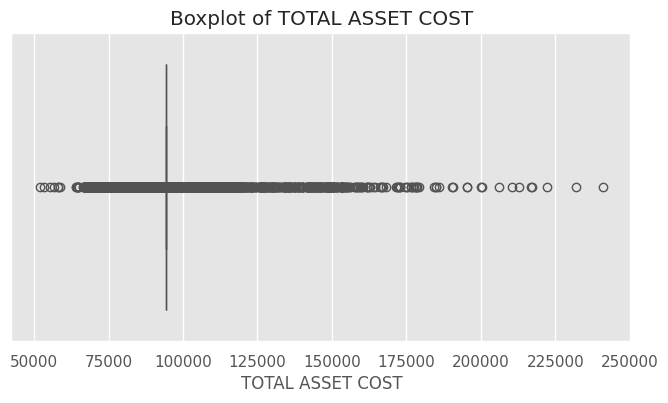

In [47]:
# Boxplots to visualize outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train_df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


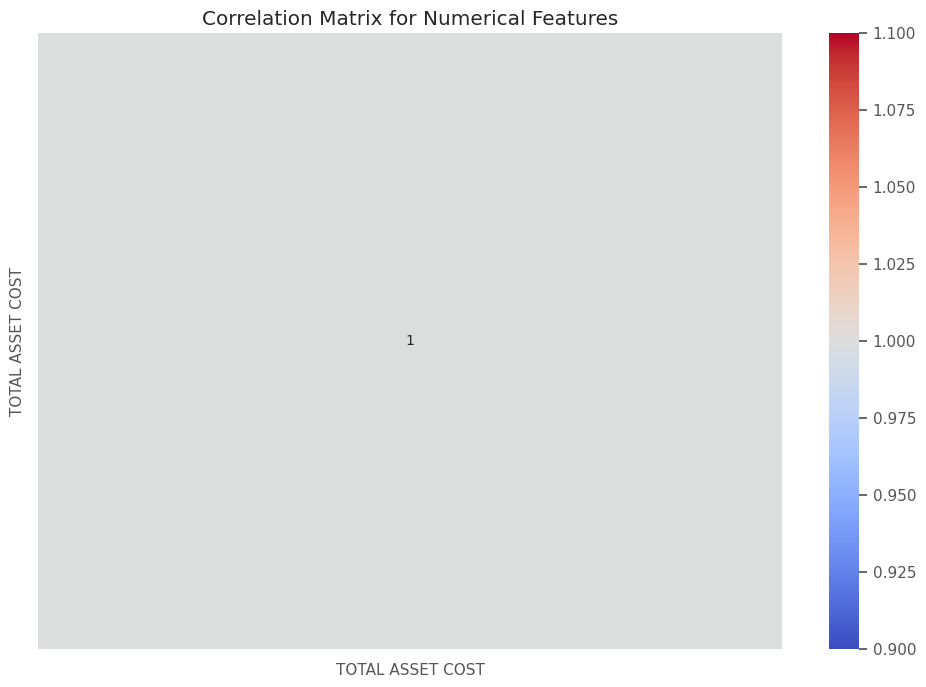

In [48]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = train_df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()


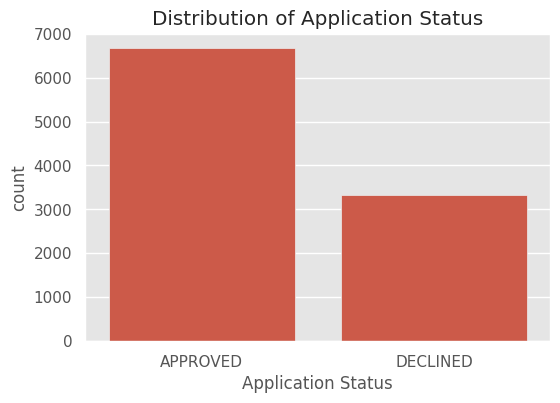

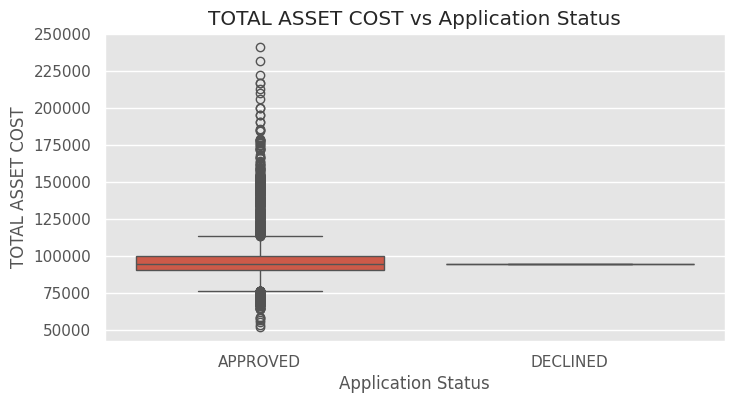

In [49]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='Application Status')
plt.title('Distribution of Application Status')
plt.show()

# Analysis of numerical variables by target variable
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train_df, x='Application Status', y=col)
    plt.title(f'{col} vs Application Status')
    plt.show()


In [50]:
# Relationship between categorical variables and target
#for col in categorical_cols:

  # plt.figure(figsize=(8, 4))
  #  sns.countplot(data=train_df, x=col, hue='Application Status', order=train_df[col].value_counts().index)
   # plt.title(f'{col} vs Application Status')
  #  plt.xticks(rotation=45)
   # plt.show()



# Function to calculate outlier thresholds and remove outliers
# DATA CLEANING



In [51]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Function to calculate Z-scores and remove outliers
def remove_outliers_zscore(dataframe, numerical_cols, threshold=3):
    # Calculate Z-scores for numerical columns
    z_scores = np.abs(zscore(dataframe[numerical_cols], nan_policy='omit'))

    # Identify rows where any column's Z-score is above the threshold
    outliers = (z_scores > threshold).any(axis=1)

    # Remove outliers
    cleaned_dataframe = dataframe[~outliers]
    return cleaned_dataframe

# List of numerical columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Removing outliers from the training dataset using Z-scores
train_df_cleaned = remove_outliers_zscore(train_df, numerical_cols)

# Checking the shape after outlier removal
print("Training data shape after removing outliers using Z-scores:", train_df_cleaned.shape)


Training data shape after removing outliers using Z-scores: (9583, 30)


In [52]:
train_df_cleaned.columns

Index(['DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME',
       'HDB BRANCH STATE', 'FIRST NAME', 'mobile', 'AADHAR VERIFIED',
       'Cibil Score', 'DEALER NAME', 'TOTAL ASSET COST', 'ASSET CTG',
       'ASSET MODEL NO', 'APPLIED AMOUNT', 'PRIMARY ASSET MAKE',
       'Primary Asset Model No', 'Personal Email Address', 'MARITAL STATUS',
       'GENDER', 'DOB', 'AGE', 'ADDRESS TYPE', 'EMPLOY CONSTITUTION',
       'EMPLOYER NAME', 'EMPLOYER TYPE', 'Pan Name', 'name',
       'phone_digitalage', 'phone_nameMatchScore',
       'phone_phoneFootprintStrengthOverall', 'Application Status'],
      dtype='object')

In [53]:
train_df_cleaned.shape

(9583, 30)

In [54]:
test_df.shape

(2000, 30)

In [55]:
# Compare columns between train_df and test_df
train_columns = set(train_df_cleaned.columns)
test_columns = set(test_df.columns)

# Find the extra or missing columns
extra_in_test = test_columns - train_columns
missing_in_train = train_columns - test_columns

print("Extra columns in test data:", extra_in_test)
print("Missing columns in train data:", missing_in_train)

Extra columns in test data: {'UID'}
Missing columns in train data: {'Application Status'}


In [56]:
test_df.columns

Index(['UID', 'DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME',
       'HDB BRANCH STATE', 'FIRST NAME', 'mobile', 'AADHAR VERIFIED',
       'Cibil Score', 'DEALER NAME', 'TOTAL ASSET COST', 'ASSET CTG',
       'ASSET MODEL NO', 'APPLIED AMOUNT', 'PRIMARY ASSET MAKE',
       'Primary Asset Model No', 'Personal Email Address', 'MARITAL STATUS',
       'GENDER', 'DOB', 'AGE', 'ADDRESS TYPE', 'EMPLOY CONSTITUTION',
       'EMPLOYER NAME', 'EMPLOYER TYPE', 'Pan Name', 'name',
       'phone_digitalage', 'phone_nameMatchScore',
       'phone_phoneFootprintStrengthOverall'],
      dtype='object')

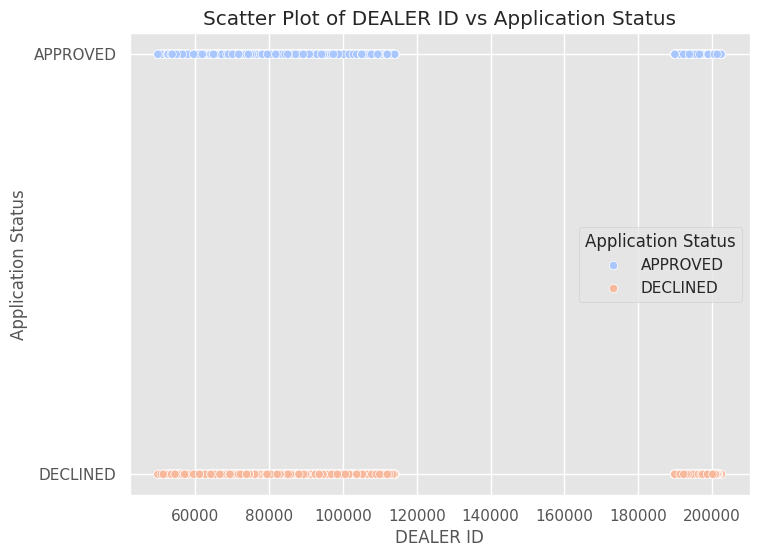

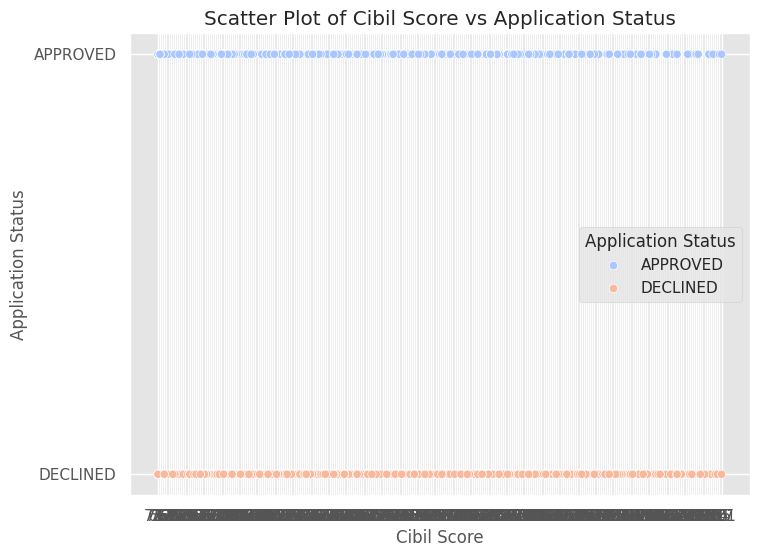

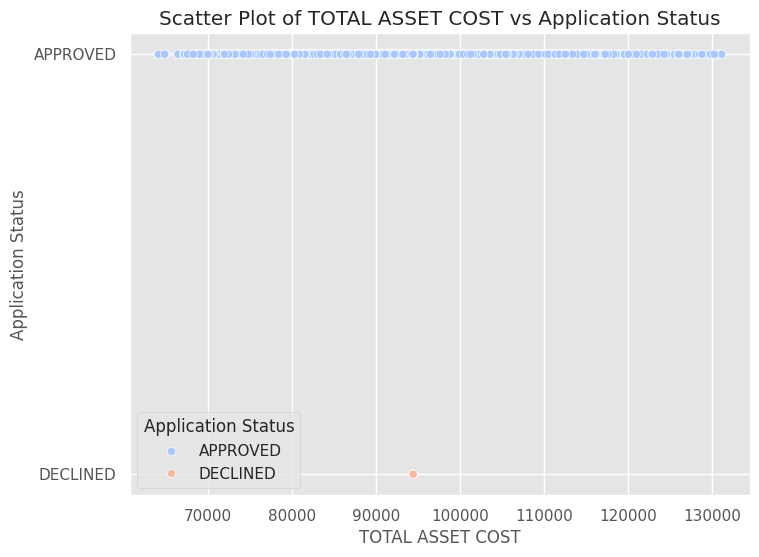

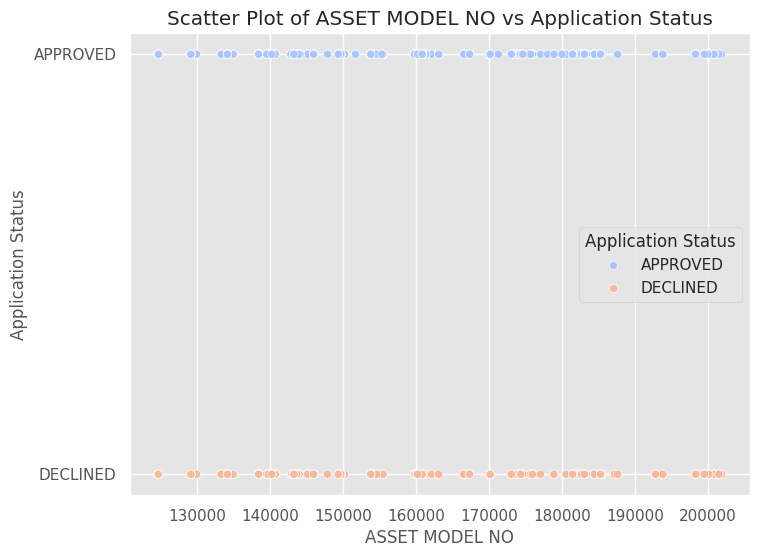

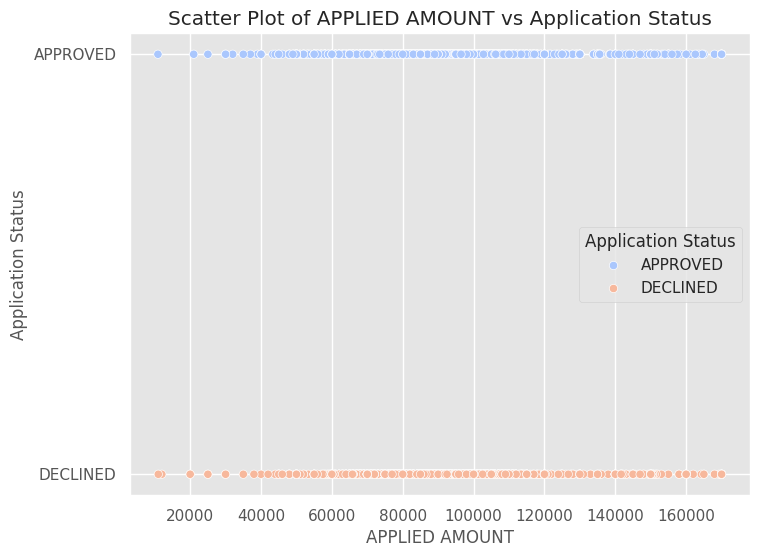

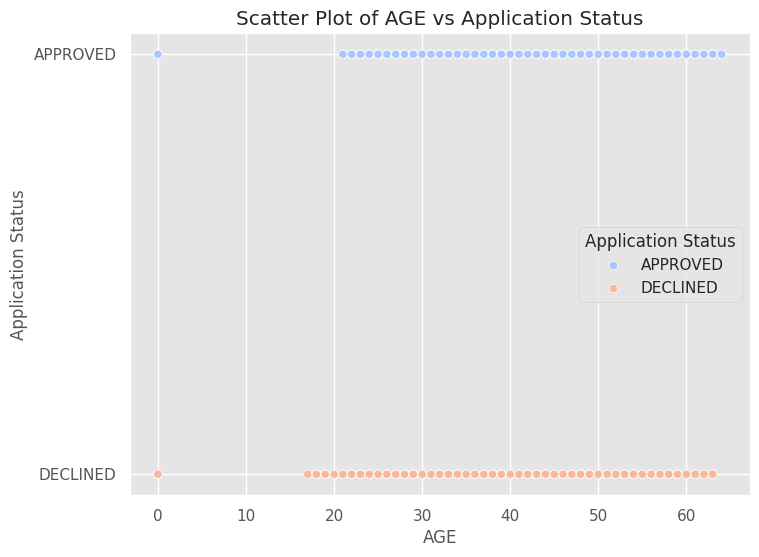

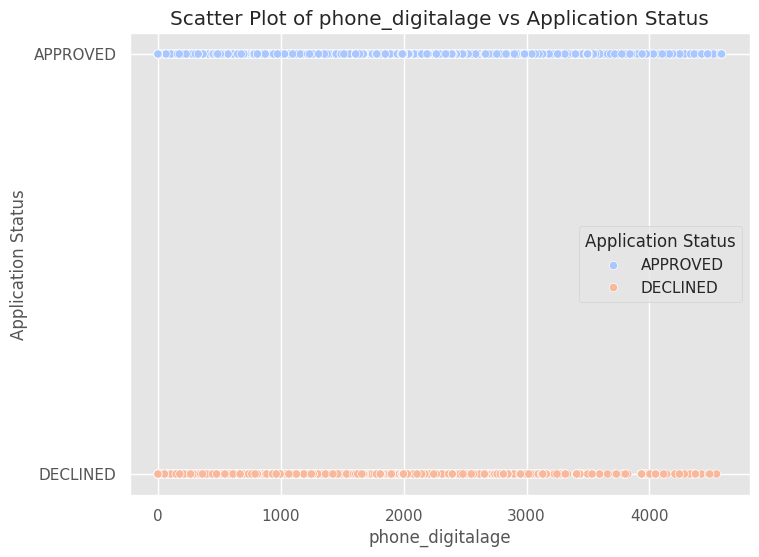

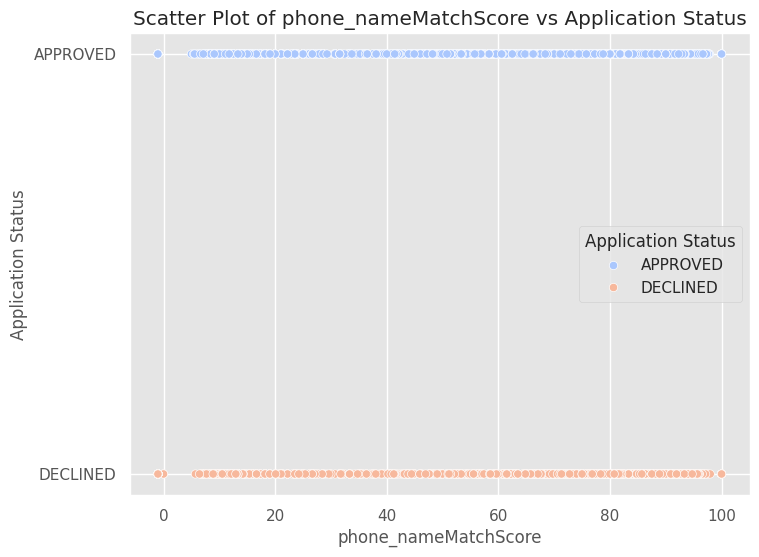

In [57]:
# Selecting numerical columns and 'Application Status' for scatter plot
numerical_cols = ['DEALER ID', 'Cibil Score', 'TOTAL ASSET COST', 'ASSET MODEL NO',
                  'APPLIED AMOUNT', 'AGE', 'phone_digitalage', 'phone_nameMatchScore']

# Create scatter plots for numerical features against Application Status
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=train_df_cleaned, x=col, y='Application Status', hue='Application Status', palette='coolwarm')
    plt.title(f'Scatter Plot of {col} vs Application Status')
    plt.xlabel(col)
    plt.ylabel('Application Status')
    plt.legend(title='Application Status', loc='best')
    plt.show()


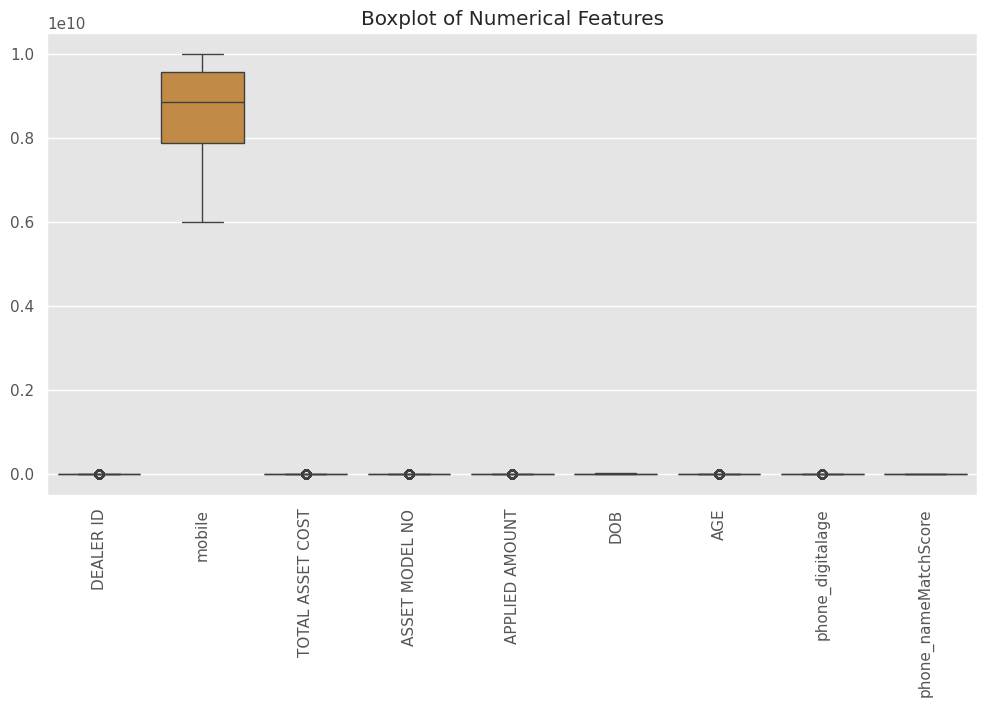

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure numeric_cols is a list of column names
numeric_cols = train_df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# Create a boxplot for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df_cleaned[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()


In [59]:
# Assuming train_df_cleaned is your cleaned DataFrame
numeric_cols = train_df_cleaned.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_cols.corr()

# Display the correlation matrix in a table format
print(correlation_matrix.to_string())

                      DEALER ID    mobile  TOTAL ASSET COST  ASSET MODEL NO  APPLIED AMOUNT       DOB       AGE  phone_digitalage  phone_nameMatchScore
DEALER ID              1.000000 -0.018833         -0.027545        0.110260        0.003303 -0.067101 -0.048760         -0.006658             -0.031347
mobile                -0.018833  1.000000         -0.003505        0.014021       -0.006373  0.014888  0.099948          0.108142              0.077753
TOTAL ASSET COST      -0.027545 -0.003505          1.000000        0.082991        0.344577  0.068432 -0.000933          0.033277              0.045688
ASSET MODEL NO         0.110260  0.014021          0.082991        1.000000        0.077865  0.021680 -0.037343         -0.024581              0.036202
APPLIED AMOUNT         0.003303 -0.006373          0.344577        0.077865        1.000000  0.065972 -0.025082          0.029193              0.039971
DOB                   -0.067101  0.014888          0.068432        0.021680        0.065

In [60]:
# Drop columns with NaN values in correlation matrix
correlation_matrix_cleaned = correlation_matrix.dropna(axis=1, how='all').dropna(axis=0, how='all')

print(correlation_matrix_cleaned.to_string())


                      DEALER ID    mobile  TOTAL ASSET COST  ASSET MODEL NO  APPLIED AMOUNT       DOB       AGE  phone_digitalage  phone_nameMatchScore
DEALER ID              1.000000 -0.018833         -0.027545        0.110260        0.003303 -0.067101 -0.048760         -0.006658             -0.031347
mobile                -0.018833  1.000000         -0.003505        0.014021       -0.006373  0.014888  0.099948          0.108142              0.077753
TOTAL ASSET COST      -0.027545 -0.003505          1.000000        0.082991        0.344577  0.068432 -0.000933          0.033277              0.045688
ASSET MODEL NO         0.110260  0.014021          0.082991        1.000000        0.077865  0.021680 -0.037343         -0.024581              0.036202
APPLIED AMOUNT         0.003303 -0.006373          0.344577        0.077865        1.000000  0.065972 -0.025082          0.029193              0.039971
DOB                   -0.067101  0.014888          0.068432        0.021680        0.065

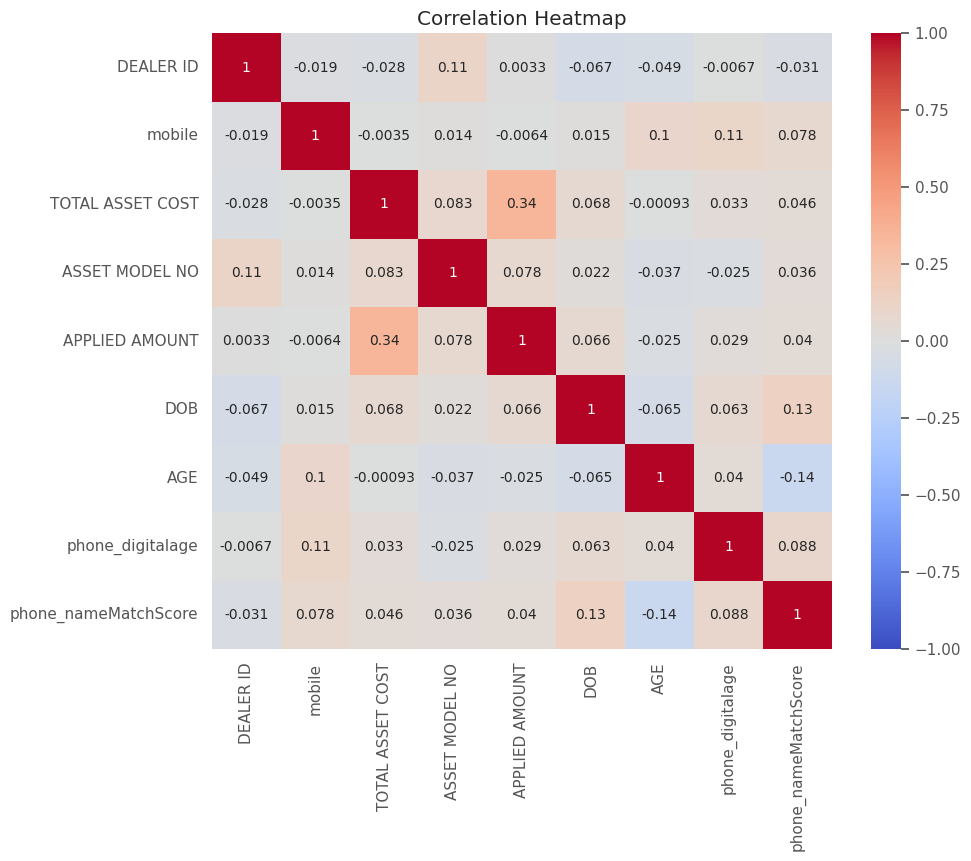

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of the cleaned correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [62]:
train_df_cleaned.shape

(9583, 30)

In [63]:
test_df.shape

(2000, 30)

# FEATURE SELECTION


In [64]:
 train_df_cleaned.columns

Index(['DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME',
       'HDB BRANCH STATE', 'FIRST NAME', 'mobile', 'AADHAR VERIFIED',
       'Cibil Score', 'DEALER NAME', 'TOTAL ASSET COST', 'ASSET CTG',
       'ASSET MODEL NO', 'APPLIED AMOUNT', 'PRIMARY ASSET MAKE',
       'Primary Asset Model No', 'Personal Email Address', 'MARITAL STATUS',
       'GENDER', 'DOB', 'AGE', 'ADDRESS TYPE', 'EMPLOY CONSTITUTION',
       'EMPLOYER NAME', 'EMPLOYER TYPE', 'Pan Name', 'name',
       'phone_digitalage', 'phone_nameMatchScore',
       'phone_phoneFootprintStrengthOverall', 'Application Status'],
      dtype='object')

In [65]:
train_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9583 entries, 1 to 9999
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DEALER ID                            9583 non-null   int64  
 1   APPLICATION LOGIN DATE               9583 non-null   object 
 2   HDB BRANCH NAME                      9582 non-null   object 
 3   HDB BRANCH STATE                     9583 non-null   object 
 4   FIRST NAME                           9583 non-null   object 
 5   mobile                               9583 non-null   int64  
 6   AADHAR VERIFIED                      9583 non-null   object 
 7   Cibil Score                          5459 non-null   object 
 8   DEALER NAME                          9579 non-null   object 
 9   TOTAL ASSET COST                     9583 non-null   float64
 10  ASSET CTG                            9583 non-null   object 
 11  ASSET MODEL NO                     

In [66]:
# Convert date columns to datetime
train_df_cleaned['DOB'] = pd.to_datetime(train_df_cleaned['DOB'], errors='coerce')

# Convert to numeric (e.g., timestamp)
train_df_cleaned['DOB'] = train_df_cleaned['DOB'].astype(int) / 10**9  # Convert to seconds since epoch


In [67]:
train_df_cleaned.columns

Index(['DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME',
       'HDB BRANCH STATE', 'FIRST NAME', 'mobile', 'AADHAR VERIFIED',
       'Cibil Score', 'DEALER NAME', 'TOTAL ASSET COST', 'ASSET CTG',
       'ASSET MODEL NO', 'APPLIED AMOUNT', 'PRIMARY ASSET MAKE',
       'Primary Asset Model No', 'Personal Email Address', 'MARITAL STATUS',
       'GENDER', 'DOB', 'AGE', 'ADDRESS TYPE', 'EMPLOY CONSTITUTION',
       'EMPLOYER NAME', 'EMPLOYER TYPE', 'Pan Name', 'name',
       'phone_digitalage', 'phone_nameMatchScore',
       'phone_phoneFootprintStrengthOverall', 'Application Status'],
      dtype='object')

In [68]:
test_df.columns

Index(['UID', 'DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME',
       'HDB BRANCH STATE', 'FIRST NAME', 'mobile', 'AADHAR VERIFIED',
       'Cibil Score', 'DEALER NAME', 'TOTAL ASSET COST', 'ASSET CTG',
       'ASSET MODEL NO', 'APPLIED AMOUNT', 'PRIMARY ASSET MAKE',
       'Primary Asset Model No', 'Personal Email Address', 'MARITAL STATUS',
       'GENDER', 'DOB', 'AGE', 'ADDRESS TYPE', 'EMPLOY CONSTITUTION',
       'EMPLOYER NAME', 'EMPLOYER TYPE', 'Pan Name', 'name',
       'phone_digitalage', 'phone_nameMatchScore',
       'phone_phoneFootprintStrengthOverall'],
      dtype='object')

In [69]:
train_df_cleaned.shape

(9583, 30)

In [70]:
test_df.shape

(2000, 30)

In [71]:
# Compare columns between train_df and test_df
train_columns = set(train_df_cleaned.columns)
test_columns = set(test_df.columns)

# Find the extra or missing columns
extra_in_test = test_columns - train_columns
missing_in_train = train_columns - test_columns

print("Extra columns in test data:", extra_in_test)
print("Missing columns in test data:", missing_in_train)

Extra columns in test data: {'UID'}
Missing columns in test data: {'Application Status'}


In [72]:
# Convert 'Application Status' to numeric
train_df_cleaned['Application Status'] = train_df_cleaned['Application Status'].map({'APPROVED': 1, 'DECLINED': 0})

# Verify conversion
print(train_df_cleaned['Application Status'].head())


1    1
2    1
3    1
4    0
5    1
Name: Application Status, dtype: int64


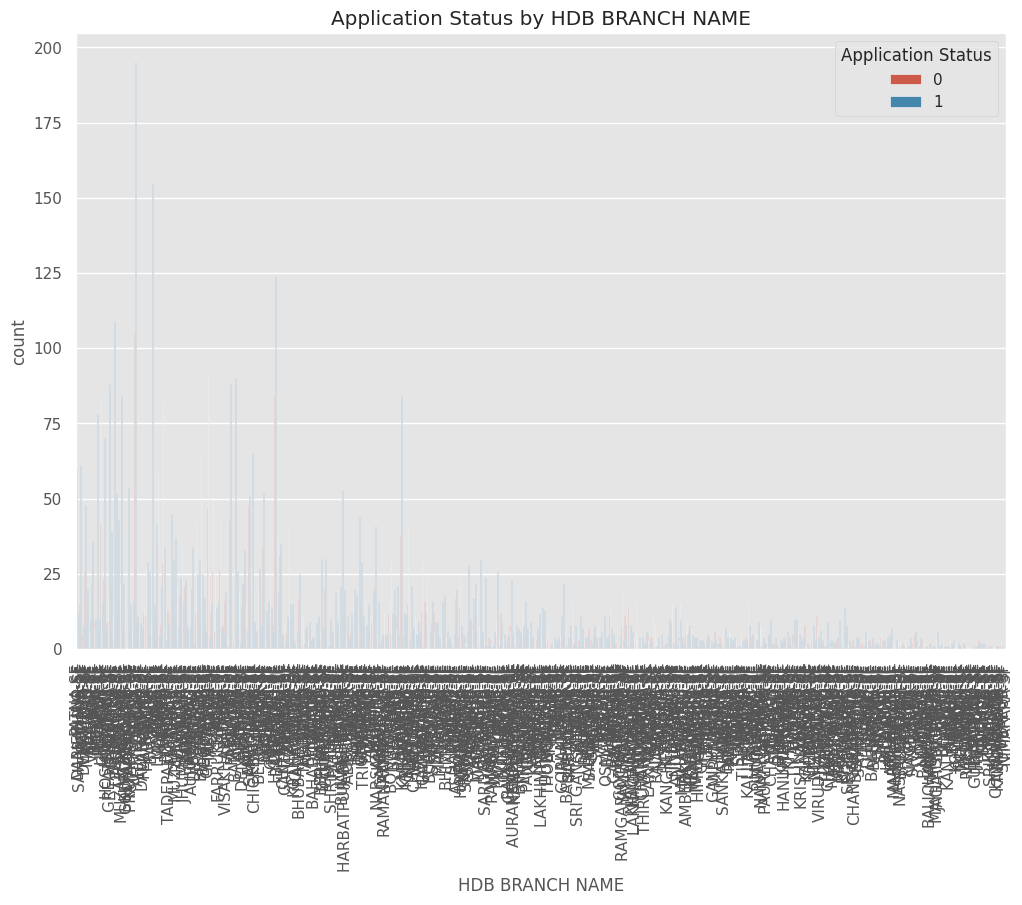

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot of Application Status by HDB BRANCH NAME
plt.figure(figsize=(12, 8))
sns.countplot(data=train_df_cleaned, x='HDB BRANCH NAME', hue='Application Status')
plt.xticks(rotation=90)
plt.title('Application Status by HDB BRANCH NAME')
plt.show()


In [74]:
# Cross-tabulation of Application Status and HDB BRANCH NAME
branch_status_crosstab = pd.crosstab(train_df_cleaned['HDB BRANCH NAME'], train_df_cleaned['Application Status'])
print(branch_status_crosstab)


Application Status   0   1
HDB BRANCH NAME           
AAGAR-SF             0   1
ABU ROAD-SF          1   3
AGARTALA-SF          5   4
AGRA-SF             27  44
AHMEDABAD-SF        11  11
...                 ..  ..
VISAKHAPATNAM-SF    10  11
VYARA-SF             5   4
WASHIM-SF            5   8
YADGIR-SF            4  11
YAMUNANAGAR-SF      11   8

[539 rows x 2 columns]


In [75]:
from scipy.stats import chi2_contingency

# Cross-tabulation of Application Status and HDB BRANCH NAME
branch_status_crosstab = pd.crosstab(train_df_cleaned['HDB BRANCH NAME'], train_df_cleaned['Application Status'])

# Perform Chi-Square Test
chi2, p, dof, ex = chi2_contingency(branch_status_crosstab)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant relationship between 'HDB BRANCH NAME' and 'Application Status'.")
else:
    print("There is no significant relationship between 'HDB BRANCH NAME' and 'Application Status'.")


Chi-Square Statistic: 855.2661169205423
P-Value: 7.404126853197356e-17
There is a significant relationship between 'HDB BRANCH NAME' and 'Application Status'.


In [76]:
# List of features to analyze
features = ['APPLICATION LOGIN DATE', 'Pan Name', 'name', 'phone_phoneFootprintStrengthOverall', 'DOB','HDB BRANCH NAME', 'HDB BRANCH STATE', 'FIRST NAME', 'AADHAR VERIFIED',
       'Cibil Score', 'DEALER NAME', 'ASSET CTG', 'PRIMARY ASSET MAKE',
       'Primary Asset Model No', 'Personal Email Address', 'MARITAL STATUS',
       'GENDER', 'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME',
       'EMPLOYER TYPE']

In [77]:
def analyze_feature(feature):
    # Cross-tabulation of Application Status and the feature
    feature_status_crosstab = pd.crosstab(train_df_cleaned[feature], train_df_cleaned['Application Status'])

    # Perform Chi-Square Test
    chi2, p, dof, ex = chi2_contingency(feature_status_crosstab)

    print(f"Chi-Square Statistic for {feature}: {chi2}")
    print(f"P-Value for {feature}: {p}")

    # Interpretation
    if p < 0.05:
        print(f"There is a significant relationship between '{feature}' and 'Application Status'.\n")
    else:
        print(f"There is no significant relationship between '{feature}' and 'Application Status'.\n")
# Loop through each feature
for feature in features:
    analyze_feature(feature)


Chi-Square Statistic for APPLICATION LOGIN DATE: 48.84628648350813
P-Value for APPLICATION LOGIN DATE: 0.008673539315471717
There is a significant relationship between 'APPLICATION LOGIN DATE' and 'Application Status'.

Chi-Square Statistic for Pan Name: 7139.28022380843
P-Value for Pan Name: 0.11500866715552475
There is no significant relationship between 'Pan Name' and 'Application Status'.

Chi-Square Statistic for name: 8709.761030573236
P-Value for name: 0.15722357578342314
There is no significant relationship between 'name' and 'Application Status'.

Chi-Square Statistic for phone_phoneFootprintStrengthOverall: 7.810866058590928
P-Value for phone_phoneFootprintStrengthOverall: 0.09875732932581797
There is no significant relationship between 'phone_phoneFootprintStrengthOverall' and 'Application Status'.

Chi-Square Statistic for DOB: 4854.116810223638
P-Value for DOB: 0.10725915536505642
There is no significant relationship between 'DOB' and 'Application Status'.

Chi-Square Stat

In [78]:
# Drop non-numeric columns (if not needed)
non_numeric_cols = [ 'Pan Name', 'name', 'phone_phoneFootprintStrengthOverall','DOB','FIRST NAME','AADHAR VERIFIED','Personal Email Address']
train_df_cleaned = train_df_cleaned.drop(columns=non_numeric_cols)
test_df = test_df.drop(columns=non_numeric_cols)

# Now select numeric columns
numeric_cols = train_df_cleaned.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_cols.corr()

# Print the correlation matrix
print(correlation_matrix.to_string())


                      DEALER ID    mobile  TOTAL ASSET COST  ASSET MODEL NO  APPLIED AMOUNT       AGE  phone_digitalage  phone_nameMatchScore  Application Status
DEALER ID              1.000000 -0.018833         -0.027545        0.110260        0.003303 -0.048760         -0.006658             -0.031347           -0.050616
mobile                -0.018833  1.000000         -0.003505        0.014021       -0.006373  0.099948          0.108142              0.077753            0.012332
TOTAL ASSET COST      -0.027545 -0.003505          1.000000        0.082991        0.344577 -0.000933          0.033277              0.045688            0.028177
ASSET MODEL NO         0.110260  0.014021          0.082991        1.000000        0.077865 -0.037343         -0.024581              0.036202           -0.031837
APPLIED AMOUNT         0.003303 -0.006373          0.344577        0.077865        1.000000 -0.025082          0.029193              0.039971           -0.023792
AGE                   -0.048

In [79]:
# First, we'll handle the date formats and convert them into a consistent format
def convert_to_datetime(df, column):
    # Handle both date formats using 'errors=coerce' to handle invalid parsing
    df[column] = pd.to_datetime(df[column], errors='coerce', format='%m/%d/%Y') \
                    .fillna(pd.to_datetime(df[column], errors='coerce', format='%m-%d-%Y'))
    return df

# Apply the conversion to both train and test datasets
train_df_cleaned = convert_to_datetime(train_df_cleaned, 'APPLICATION LOGIN DATE')
test_df = convert_to_datetime(test_df, 'APPLICATION LOGIN DATE')

# Convert to timestamp, skipping NaT values
train_df_cleaned['Application Login Timestamp'] = train_df_cleaned['APPLICATION LOGIN DATE'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)
test_df['Application Login Timestamp'] = test_df['APPLICATION LOGIN DATE'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)

# Optionally, you can also extract year, month, and day as separate features
train_df_cleaned['Login Year'] = train_df_cleaned['APPLICATION LOGIN DATE'].dt.year
train_df_cleaned['Login Month'] = train_df_cleaned['APPLICATION LOGIN DATE'].dt.month
train_df_cleaned['Login Day'] = train_df_cleaned['APPLICATION LOGIN DATE'].dt.day

test_df['Login Year'] = test_df['APPLICATION LOGIN DATE'].dt.year
test_df['Login Month'] = test_df['APPLICATION LOGIN DATE'].dt.month
test_df['Login Day'] = test_df['APPLICATION LOGIN DATE'].dt.day

# Check the updated datasets
print(train_df_cleaned[['APPLICATION LOGIN DATE', 'Application Login Timestamp', 'Login Year', 'Login Month', 'Login Day']].head())
print(test_df[['APPLICATION LOGIN DATE', 'Application Login Timestamp', 'Login Year', 'Login Month', 'Login Day']].head())



  APPLICATION LOGIN DATE  Application Login Timestamp  Login Year  \
1             2022-07-28                 1.658966e+09        2022   
2             2022-07-15                 1.657843e+09        2022   
3             2022-07-04                 1.656893e+09        2022   
4             2022-07-15                 1.657843e+09        2022   
5             2022-07-26                 1.658794e+09        2022   

   Login Month  Login Day  
1            7         28  
2            7         15  
3            7          4  
4            7         15  
5            7         26  
  APPLICATION LOGIN DATE  Application Login Timestamp  Login Year  \
0             2022-07-12                 1.657584e+09        2022   
1             2022-07-14                 1.657757e+09        2022   
2             2022-07-07                 1.657152e+09        2022   
3             2022-07-13                 1.657670e+09        2022   
4             2022-07-08                 1.657238e+09        2022   

  

In [80]:
# Identifying categorical columns with missing values
categorical_vars_with_missing = train_df_cleaned.columns[(train_df_cleaned.dtypes == 'object') & (train_df_cleaned.isnull().sum() > 0)]
print("Categorical columns with missing values train  data:")
print(categorical_vars_with_missing)

# Identifying numerical columns with missing values
numerical_vars_with_missing = train_df_cleaned.columns[(train_df_cleaned.dtypes != 'object') & (train_df_cleaned.isnull().sum() > 0)]
print("Numerical columns with missing values train data:")
print(numerical_vars_with_missing)

Categorical columns with missing values train  data:
Index(['HDB BRANCH NAME', 'Cibil Score', 'DEALER NAME', 'ADDRESS TYPE'], dtype='object')
Numerical columns with missing values train data:
Index([], dtype='object')


In [81]:
# Identifying categorical columns with missing values
categorical_vars_with_missing = test_df.columns[(test_df.dtypes == 'object') & (test_df.isnull().sum() > 0)]
print("Categorical columns with missing values test  data:")
print(categorical_vars_with_missing)

# Identifying numerical columns with missing values
numerical_vars_with_missing = test_df.columns[(test_df.dtypes != 'object') & (test_df.isnull().sum() > 0)]
print("Numerical columns with missing values test data:")
print(numerical_vars_with_missing)

Categorical columns with missing values test  data:
Index(['Cibil Score', 'ADDRESS TYPE'], dtype='object')
Numerical columns with missing values test data:
Index([], dtype='object')


In [82]:
# Filling missing values in categorical columns with mode (most frequent value)
categorical_columns_train = ['HDB BRANCH NAME', 'Cibil Score', 'DEALER NAME', 'ADDRESS TYPE']
categorical_columns_test = ['Cibil Score', 'ADDRESS TYPE']

# For train dataset
for column in categorical_columns_train:
    train_df_cleaned[column] = train_df_cleaned[column].fillna(train_df_cleaned[column].mode()[0])

# For test dataset
for column in categorical_columns_test:
    test_df[column] = test_df[column].fillna(test_df[column].mode()[0])

# Alternatively, you could use a placeholder like 'Unknown' to fill missing values
# For train dataset
# for column in categorical_columns_train:
#     train_df_cleaned[column] = train_df_cleaned[column].fillna('Unknown')

# For test dataset
# for column in categorical_columns_test:
#     test_df[column] = test_df[column].fillna('Unknown')

# Check if missing values are handled
print(train_df_cleaned[categorical_columns_train].isnull().sum())
print(test_df[categorical_columns_test].isnull().sum())


HDB BRANCH NAME    0
Cibil Score        0
DEALER NAME        0
ADDRESS TYPE       0
dtype: int64
Cibil Score     0
ADDRESS TYPE    0
dtype: int64


# PIPELINING

In [83]:
# Identifying categorical columns train data
categorical_vars_train = train_df_cleaned.columns[(train_df_cleaned.dtypes == 'object')]
print("Categorical columns train  data:")
print(categorical_vars_train)
print(categorical_vars_train.shape)

# Identifying categorical columns test data
categorical_vars_test = test_df.columns[(test_df.dtypes == 'object')]
print("Categorical columns with missing values test  data:")
print(categorical_vars_test)
print(categorical_vars_test.shape)

Categorical columns train  data:
Index(['HDB BRANCH NAME', 'HDB BRANCH STATE', 'Cibil Score', 'DEALER NAME',
       'ASSET CTG', 'PRIMARY ASSET MAKE', 'Primary Asset Model No',
       'MARITAL STATUS', 'GENDER', 'ADDRESS TYPE', 'EMPLOY CONSTITUTION',
       'EMPLOYER NAME', 'EMPLOYER TYPE'],
      dtype='object')
(13,)
Categorical columns with missing values test  data:
Index(['HDB BRANCH NAME', 'HDB BRANCH STATE', 'Cibil Score', 'DEALER NAME',
       'ASSET CTG', 'PRIMARY ASSET MAKE', 'Primary Asset Model No',
       'MARITAL STATUS', 'GENDER', 'ADDRESS TYPE', 'EMPLOY CONSTITUTION',
       'EMPLOYER NAME', 'EMPLOYER TYPE'],
      dtype='object')
(13,)


In [84]:
# Identifying numerical columns train data
numerical_vars_train = train_df_cleaned.columns[(train_df_cleaned.dtypes != 'object')]
print("Numerical columns with train data:")
print(numerical_vars_train)
print(numerical_vars_train.shape)

# Identifying numerical columns test data
numerical_vars_test = test_df.columns[(test_df.dtypes != 'object')]
print("Numerical columns with missing values test data:")
print(numerical_vars_test)
print(numerical_vars_test.shape)

Numerical columns with train data:
Index(['DEALER ID', 'APPLICATION LOGIN DATE', 'mobile', 'TOTAL ASSET COST',
       'ASSET MODEL NO', 'APPLIED AMOUNT', 'AGE', 'phone_digitalage',
       'phone_nameMatchScore', 'Application Status',
       'Application Login Timestamp', 'Login Year', 'Login Month',
       'Login Day'],
      dtype='object')
(14,)
Numerical columns with missing values test data:
Index(['UID', 'DEALER ID', 'APPLICATION LOGIN DATE', 'mobile',
       'TOTAL ASSET COST', 'ASSET MODEL NO', 'APPLIED AMOUNT', 'AGE',
       'phone_digitalage', 'phone_nameMatchScore',
       'Application Login Timestamp', 'Login Year', 'Login Month',
       'Login Day'],
      dtype='object')
(14,)


In [85]:
datetime_columns = train_df_cleaned.select_dtypes(include=['datetime64[ns]']).columns

In [86]:
# Remove datetime columns from the datasets before applying the pipeline
train_df_cleaned = train_df_cleaned.drop(columns=datetime_columns)
test_df = test_df.drop(columns=datetime_columns)

In [87]:
num_cols = train_df_cleaned.select_dtypes(include=['int64', 'float64','int32']).columns
num_cols = num_cols.drop('Application Status')
print(num_cols)
print(num_cols.shape)


Index(['DEALER ID', 'mobile', 'TOTAL ASSET COST', 'ASSET MODEL NO',
       'APPLIED AMOUNT', 'AGE', 'phone_digitalage', 'phone_nameMatchScore',
       'Application Login Timestamp', 'Login Year', 'Login Month',
       'Login Day'],
      dtype='object')
(12,)


In [88]:
# List of categorical columns
categorical_columns = ['HDB BRANCH NAME', 'HDB BRANCH STATE', 'Cibil Score', 'DEALER NAME',
                       'ASSET CTG', 'PRIMARY ASSET MAKE', 'Primary Asset Model No',
                       'MARITAL STATUS', 'GENDER', 'ADDRESS TYPE', 'EMPLOY CONSTITUTION',
                       'EMPLOYER NAME', 'EMPLOYER TYPE']

In [89]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [90]:
# Ordinal encoder pipeline for categorical columns with missing value imputation and one-hot encoding
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values with the most frequent
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode categorical columns
])

In [91]:
# Column transformer for combining numerical and categorical transformations
col_trans = ColumnTransformer(transformers=[
    ('num_p', num_pipeline, num_cols),  # Apply numerical transformations
    ('ode_p', ohe_pipeline, categorical_columns)  # Apply categorical transformations
], remainder='passthrough')  # Pass through any remaining columns without transforming

In [92]:
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])

In [93]:
train_df_cleaned.shape

(9583, 26)

In [94]:
test_df.shape

(2000, 26)

In [95]:
train_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9583 entries, 1 to 9999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DEALER ID                    9583 non-null   int64  
 1   HDB BRANCH NAME              9583 non-null   object 
 2   HDB BRANCH STATE             9583 non-null   object 
 3   mobile                       9583 non-null   int64  
 4   Cibil Score                  9583 non-null   object 
 5   DEALER NAME                  9583 non-null   object 
 6   TOTAL ASSET COST             9583 non-null   float64
 7   ASSET CTG                    9583 non-null   object 
 8   ASSET MODEL NO               9583 non-null   int64  
 9   APPLIED AMOUNT               9583 non-null   int64  
 10  PRIMARY ASSET MAKE           9583 non-null   object 
 11  Primary Asset Model No       9583 non-null   object 
 12  MARITAL STATUS               9583 non-null   object 
 13  GENDER                 

In [96]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          2000 non-null   float64
 1   DEALER ID                    2000 non-null   int64  
 2   HDB BRANCH NAME              2000 non-null   object 
 3   HDB BRANCH STATE             2000 non-null   object 
 4   mobile                       2000 non-null   int64  
 5   Cibil Score                  2000 non-null   object 
 6   DEALER NAME                  2000 non-null   object 
 7   TOTAL ASSET COST             2000 non-null   float64
 8   ASSET CTG                    2000 non-null   object 
 9   ASSET MODEL NO               2000 non-null   int64  
 10  APPLIED AMOUNT               2000 non-null   int64  
 11  PRIMARY ASSET MAKE           2000 non-null   object 
 12  Primary Asset Model No       2000 non-null   object 
 13  MARITAL STATUS    

# DATA SPLITING

In [97]:
X = train_df_cleaned.drop('Application Status', axis=1)
y = train_df_cleaned['Application Status']


In [98]:
print(X.dtypes)

DEALER ID                        int64
HDB BRANCH NAME                 object
HDB BRANCH STATE                object
mobile                           int64
Cibil Score                     object
DEALER NAME                     object
TOTAL ASSET COST               float64
ASSET CTG                       object
ASSET MODEL NO                   int64
APPLIED AMOUNT                   int64
PRIMARY ASSET MAKE              object
Primary Asset Model No          object
MARITAL STATUS                  object
GENDER                          object
AGE                              int64
ADDRESS TYPE                    object
EMPLOY CONSTITUTION             object
EMPLOYER NAME                   object
EMPLOYER TYPE                   object
phone_digitalage               float64
phone_nameMatchScore           float64
Application Login Timestamp    float64
Login Year                       int32
Login Month                      int32
Login Day                        int32
dtype: object


In [99]:
X.shape

(9583, 25)

In [100]:
y.shape

(9583,)

In [101]:
# Check unique values in each column
for col in X.columns:
    unique_types = set(type(value) for value in X[col].dropna())
    if len(unique_types) > 1:
        print(f"Column '{col}' has mixed types: {unique_types}")


In [102]:
X_preprocessed = pipeline.fit_transform(X)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


In [104]:
print(X.shape, X_train.shape, X_test.shape)

(9583, 25) (7666, 6970) (1917, 6970)


In [105]:
print(y_train.isnull().sum())
print(y_test.isnull().sum())

0
0


In [106]:
print(train_df_cleaned.columns)
print(train_df_cleaned.shape)

Index(['DEALER ID', 'HDB BRANCH NAME', 'HDB BRANCH STATE', 'mobile',
       'Cibil Score', 'DEALER NAME', 'TOTAL ASSET COST', 'ASSET CTG',
       'ASSET MODEL NO', 'APPLIED AMOUNT', 'PRIMARY ASSET MAKE',
       'Primary Asset Model No', 'MARITAL STATUS', 'GENDER', 'AGE',
       'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE',
       'phone_digitalage', 'phone_nameMatchScore', 'Application Status',
       'Application Login Timestamp', 'Login Year', 'Login Month',
       'Login Day'],
      dtype='object')
(9583, 26)


In [107]:
print(test_df.columns)
print(test_df.shape)

Index(['UID', 'DEALER ID', 'HDB BRANCH NAME', 'HDB BRANCH STATE', 'mobile',
       'Cibil Score', 'DEALER NAME', 'TOTAL ASSET COST', 'ASSET CTG',
       'ASSET MODEL NO', 'APPLIED AMOUNT', 'PRIMARY ASSET MAKE',
       'Primary Asset Model No', 'MARITAL STATUS', 'GENDER', 'AGE',
       'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE',
       'phone_digitalage', 'phone_nameMatchScore',
       'Application Login Timestamp', 'Login Year', 'Login Month',
       'Login Day'],
      dtype='object')
(2000, 26)


In [108]:
test_uid = test_df['UID']
# Drop UID column for training and retain for test predictions
test_df_cleaned= test_df.drop(columns=['UID'])

# EVALUATE MODEL PERFORMANCE

## RandomForestClassifier

In [109]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import log_loss, confusion_matrix, roc_curve, roc_auc_score

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
y_test_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC and log_loss

# Metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Log Loss', 'AUC'],
    'Train': [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred, pos_label=1),
        recall_score(y_train, y_train_pred, pos_label=1),
        f1_score(y_train, y_train_pred, pos_label=1),
        None,
        None
    ],
    'Test': [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, pos_label=1),
        recall_score(y_test, y_test_pred, pos_label=1),
        f1_score(y_test, y_test_pred, pos_label=1),
        log_loss(y_test, y_test_proba),
        roc_auc_score(y_test, y_test_proba)
    ]
}

metrics_df = pd.DataFrame(metrics)

# Classification report
test_classification_report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(test_classification_report).transpose()

# Confusion matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix with Plotly
fig_train_cm = go.Figure(data=go.Heatmap(
    z=train_conf_matrix,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    colorscale='Blues',
    zmin=0, zmax=train_conf_matrix.max()
))
fig_train_cm.update_layout(title='Confusion Matrix (Train Data)', xaxis_title='Predicted Label', yaxis_title='True Label')

fig_test_cm = go.Figure(data=go.Heatmap(
    z=test_conf_matrix,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    colorscale='Blues',
    zmin=0, zmax=test_conf_matrix.max()
))
fig_test_cm.update_layout(title='Confusion Matrix (Test Data)', xaxis_title='Predicted Label', yaxis_title='True Label')

# Plot ROC Curve with Plotly
fpr, tpr, _ = roc_curve(y_test, y_test_proba, pos_label=1)
roc_auc = roc_auc_score(y_test, y_test_proba)

fig_roc = go.Figure()
fig_roc.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {roc_auc:.2f})'))
fig_roc.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Guessing', line=dict(dash='dash')))
fig_roc.update_layout(title='ROC Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')

# Print metrics in tabular format
print("Metrics Summary:")
print(metrics_df.to_string(index=False))

print("\nClassification Report (Test Data):")
print(report_df)

print("\nTrain Confusion Matrix:")
print(train_conf_matrix)

print("\nTest Confusion Matrix:")
print(test_conf_matrix)

# Display interactive plots
fig_train_cm.show()
fig_test_cm.show()
fig_roc.show()


Metrics Summary:
   Metric    Train     Test
 Accuracy 0.999870 0.838811
Precision 0.999802 0.948646
   Recall 1.000000 0.800000
 F1 Score 0.999901 0.868005
 Log Loss      NaN 0.338487
      AUC      NaN 0.928299

Classification Report (Test Data):
              precision    recall  f1-score      support
0              0.699764  0.914992  0.793034   647.000000
1              0.948646  0.800000  0.868005  1270.000000
accuracy       0.838811  0.838811  0.838811     0.838811
macro avg      0.824205  0.857496  0.830520  1917.000000
weighted avg   0.864647  0.838811  0.842702  1917.000000

Train Confusion Matrix:
[[2603    1]
 [   0 5062]]

Test Confusion Matrix:
[[ 592   55]
 [ 254 1016]]


## Support Vector Machine classifier

In [110]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import log_loss, confusion_matrix, roc_curve, roc_auc_score

# Initialize the Support Vector Machine classifier
svm_model = SVC(probability=True, random_state=42)  # Set probability=True for ROC curve and log_loss

# Fit the model
svm_model.fit(X_train, y_train)

# Predictions
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)
y_test_proba = svm_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC and log_loss

# Metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Log Loss', 'AUC'],
    'Train': [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred, pos_label=1),
        recall_score(y_train, y_train_pred, pos_label=1),
        f1_score(y_train, y_train_pred, pos_label=1),
        None,
        None
    ],
    'Test': [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, pos_label=1),
        recall_score(y_test, y_test_pred, pos_label=1),
        f1_score(y_test, y_test_pred, pos_label=1),
        log_loss(y_test, y_test_proba),
        roc_auc_score(y_test, y_test_proba)
    ]
}

metrics_df = pd.DataFrame(metrics)

# Classification report
test_classification_report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(test_classification_report).transpose()

# Confusion matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix with Plotly
fig_train_cm = go.Figure(data=go.Heatmap(
    z=train_conf_matrix,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    colorscale='Blues',
    zmin=0, zmax=train_conf_matrix.max()
))
fig_train_cm.update_layout(title='Confusion Matrix (Train Data)', xaxis_title='Predicted Label', yaxis_title='True Label')

fig_test_cm = go.Figure(data=go.Heatmap(
    z=test_conf_matrix,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    colorscale='Blues',
    zmin=0, zmax=test_conf_matrix.max()
))
fig_test_cm.update_layout(title='Confusion Matrix (Test Data)', xaxis_title='Predicted Label', yaxis_title='True Label')

# Plot ROC Curve with Plotly
fpr, tpr, _ = roc_curve(y_test, y_test_proba, pos_label=1)
roc_auc = roc_auc_score(y_test, y_test_proba)

fig_roc = go.Figure()
fig_roc.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {roc_auc:.2f})'))
fig_roc.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Guessing', line=dict(dash='dash')))
fig_roc.update_layout(title='ROC Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')

# Print metrics in tabular format
print("Metrics Summary:")
print(metrics_df.to_string(index=False))

print("\nClassification Report (Test Data):")
print(report_df)

print("\nTrain Confusion Matrix:")
print(train_conf_matrix)

print("\nTest Confusion Matrix:")
print(test_conf_matrix)

# Display interactive plots
fig_train_cm.show()
fig_test_cm.show()
fig_roc.show()


Metrics Summary:
   Metric    Train     Test
 Accuracy 0.872815 0.828899
Precision 0.993004 0.970060
   Recall 0.813117 0.765354
 F1 Score 0.894102 0.855634
 Log Loss      NaN 0.319908
      AUC      NaN 0.920682

Classification Report (Test Data):
              precision    recall  f1-score      support
0              0.674317  0.953632  0.790013   647.000000
1              0.970060  0.765354  0.855634  1270.000000
accuracy       0.828899  0.828899  0.828899     0.828899
macro avg      0.822188  0.859493  0.822823  1917.000000
weighted avg   0.870245  0.828899  0.833486  1917.000000

Train Confusion Matrix:
[[2575   29]
 [ 946 4116]]

Test Confusion Matrix:
[[617  30]
 [298 972]]


## k-Nearest Neighbors classifier

In [111]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import log_loss, confusion_matrix, roc_curve, roc_auc_score

# Initialize the k-Nearest Neighbors classifier
knn_model = KNeighborsClassifier()

# Fit the model
knn_model.fit(X_train, y_train)

# Predictions
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)
y_test_proba = knn_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC and log_loss

# Metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Log Loss', 'AUC'],
    'Train': [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred, pos_label=1),
        recall_score(y_train, y_train_pred, pos_label=1),
        f1_score(y_train, y_train_pred, pos_label=1),
        None,
        None
    ],
    'Test': [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, pos_label=1),
        recall_score(y_test, y_test_pred, pos_label=1),
        f1_score(y_test, y_test_pred, pos_label=1),
        log_loss(y_test, y_test_proba),
        roc_auc_score(y_test, y_test_proba)
    ]
}

metrics_df = pd.DataFrame(metrics)

# Classification report
test_classification_report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(test_classification_report).transpose()

# Confusion matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix with Plotly
fig_train_cm = go.Figure(data=go.Heatmap(
    z=train_conf_matrix,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    colorscale='Blues',
    zmin=0, zmax=train_conf_matrix.max()
))
fig_train_cm.update_layout(title='Confusion Matrix (Train Data)', xaxis_title='Predicted Label', yaxis_title='True Label')

fig_test_cm = go.Figure(data=go.Heatmap(
    z=test_conf_matrix,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    colorscale='Blues',
    zmin=0, zmax=test_conf_matrix.max()
))
fig_test_cm.update_layout(title='Confusion Matrix (Test Data)', xaxis_title='Predicted Label', yaxis_title='True Label')

# Plot ROC Curve with Plotly
fpr, tpr, _ = roc_curve(y_test, y_test_proba, pos_label=1)
roc_auc = roc_auc_score(y_test, y_test_proba)

fig_roc = go.Figure()
fig_roc.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {roc_auc:.2f})'))
fig_roc.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Guessing', line=dict(dash='dash')))
fig_roc.update_layout(title='ROC Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')

# Print metrics in tabular format
print("Metrics Summary:")
print(metrics_df.to_string(index=False))

print("\nClassification Report (Test Data):")
print(report_df)

print("\nTrain Confusion Matrix:")
print(train_conf_matrix)

print("\nTest Confusion Matrix:")
print(test_conf_matrix)

# Display interactive plots
fig_train_cm.show()
fig_test_cm.show()
fig_roc.show()


Metrics Summary:
   Metric    Train     Test
 Accuracy 0.852465 0.754304
Precision 0.907020 0.829349
   Recall 0.865271 0.792126
 F1 Score 0.885654 0.810310
 Log Loss      NaN 1.155634
      AUC      NaN 0.829877

Classification Report (Test Data):
              precision    recall  f1-score      support
0              0.625000  0.680062  0.651369   647.000000
1              0.829349  0.792126  0.810310  1270.000000
accuracy       0.754304  0.754304  0.754304     0.754304
macro avg      0.727174  0.736094  0.730840  1917.000000
weighted avg   0.760380  0.754304  0.756667  1917.000000

Train Confusion Matrix:
[[2155  449]
 [ 682 4380]]

Test Confusion Matrix:
[[ 440  207]
 [ 264 1006]]


## Decision Tree classifier

In [112]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_model.fit(X_train, y_train)

# Predictions
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)
y_test_proba = dt_model.predict_proba(X_test)[:, 1]

# Metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Log Loss', 'AUC'],
    'Train': [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred, pos_label=1),
        recall_score(y_train, y_train_pred, pos_label=1),
        f1_score(y_train, y_train_pred, pos_label=1),
        None,
        None
    ],
    'Test': [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, pos_label=1),
        recall_score(y_test, y_test_pred, pos_label=1),
        f1_score(y_test, y_test_pred, pos_label=1),
        log_loss(y_test, y_test_proba),
        roc_auc_score(y_test, y_test_proba)
    ]
}

metrics_df = pd.DataFrame(metrics)

# Classification report
test_classification_report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(test_classification_report).transpose()

# Confusion matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix and ROC Curve with Plotly
fig_train_cm = go.Figure(data=go.Heatmap(
    z=train_conf_matrix,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    colorscale='Blues',
    zmin=0, zmax=train_conf_matrix.max()
))
fig_train_cm.update_layout(title='Confusion Matrix (Train Data)', xaxis_title='Predicted Label', yaxis_title='True Label')

fig_test_cm = go.Figure(data=go.Heatmap(
    z=test_conf_matrix,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    colorscale='Blues',
    zmin=0, zmax=test_conf_matrix.max()
))
fig_test_cm.update_layout(title='Confusion Matrix (Test Data)', xaxis_title='Predicted Label', yaxis_title='True Label')

fpr, tpr, _ = roc_curve(y_test, y_test_proba, pos_label=1)
roc_auc = roc_auc_score(y_test, y_test_proba)

fig_roc = go.Figure()
fig_roc.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {roc_auc:.2f})'))
fig_roc.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Guessing', line=dict(dash='dash')))
fig_roc.update_layout(title='ROC Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')

# Print metrics
print("Decision Tree Classifier Metrics Summary:")
print(metrics_df.to_string(index=False))

print("\nClassification Report (Test Data):")
print(report_df)

print("\nTrain Confusion Matrix:")
print(train_conf_matrix)

print("\nTest Confusion Matrix:")
print(test_conf_matrix)

# Display interactive plots
fig_train_cm.show()
fig_test_cm.show()
fig_roc.show()


Decision Tree Classifier Metrics Summary:
   Metric    Train     Test
 Accuracy 0.999870 0.837767
Precision 1.000000 0.884523
   Recall 0.999802 0.868504
 F1 Score 0.999901 0.876440
 Log Loss      NaN 5.847458
      AUC      NaN 0.822969

Classification Report (Test Data):
              precision    recall  f1-score      support
0              0.750746  0.777434  0.763857   647.000000
1              0.884523  0.868504  0.876440  1270.000000
accuracy       0.837767  0.837767  0.837767     0.837767
macro avg      0.817635  0.822969  0.820149  1917.000000
weighted avg   0.839372  0.837767  0.838443  1917.000000

Train Confusion Matrix:
[[2604    0]
 [   1 5061]]

Test Confusion Matrix:
[[ 503  144]
 [ 167 1103]]


## Gradient Boosting classifier

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model
gb_model.fit(X_train, y_train)

# Predictions
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)
y_test_proba = gb_model.predict_proba(X_test)[:, 1]

# Metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Log Loss', 'AUC'],
    'Train': [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred, pos_label=1),
        recall_score(y_train, y_train_pred, pos_label=1),
        f1_score(y_train, y_train_pred, pos_label=1),
        None,
        None
    ],
    'Test': [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, pos_label=1),
        recall_score(y_test, y_test_pred, pos_label=1),
        f1_score(y_test, y_test_pred, pos_label=1),
        log_loss(y_test, y_test_proba),
        roc_auc_score(y_test, y_test_proba)
    ]
}

metrics_df = pd.DataFrame(metrics)

# Classification report
test_classification_report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(test_classification_report).transpose()

# Confusion matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix and ROC Curve with Plotly
fig_train_cm = go.Figure(data=go.Heatmap(
    z=train_conf_matrix,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    colorscale='Blues',
    zmin=0, zmax=train_conf_matrix.max()
))
fig_train_cm.update_layout(title='Confusion Matrix (Train Data)', xaxis_title='Predicted Label', yaxis_title='True Label')

fig_test_cm = go.Figure(data=go.Heatmap(
    z=test_conf_matrix,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    colorscale='Blues',
    zmin=0, zmax=test_conf_matrix.max()
))
fig_test_cm.update_layout(title='Confusion Matrix (Test Data)', xaxis_title='Predicted Label', yaxis_title='True Label')

fpr, tpr, _ = roc_curve(y_test, y_test_proba, pos_label=1)
roc_auc = roc_auc_score(y_test, y_test_proba)

fig_roc = go.Figure()
fig_roc.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {roc_auc:.2f})'))
fig_roc.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Guessing', line=dict(dash='dash')))
fig_roc.update_layout(title='ROC Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')

# Print metrics
print("Gradient Boosting Classifier Metrics Summary:")
print(metrics_df.to_string(index=False))

print("\nClassification Report (Test Data):")
print(report_df)

print("\nTrain Confusion Matrix:")
print(train_conf_matrix)

print("\nTest Confusion Matrix:")
print(test_conf_matrix)

# Display interactive plots
fig_train_cm.show()
fig_test_cm.show()
fig_roc.show()

Gradient Boosting Classifier Metrics Summary:
   Metric    Train     Test
 Accuracy 0.843986 0.826291
Precision 0.991357 0.983488
   Recall 0.770446 0.750394
 F1 Score 0.867052 0.851273
 Log Loss      NaN 0.329252
      AUC      NaN 0.922485

Classification Report (Test Data):
              precision    recall  f1-score      support
0              0.665612  0.975270  0.791223   647.000000
1              0.983488  0.750394  0.851273  1270.000000
accuracy       0.826291  0.826291  0.826291     0.826291
macro avg      0.824550  0.862832  0.821248  1917.000000
weighted avg   0.876203  0.826291  0.831006  1917.000000

Train Confusion Matrix:
[[2570   34]
 [1162 3900]]

Test Confusion Matrix:
[[631  16]
 [317 953]]


## Logistic Regression classifier

In [114]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
lr_model = LogisticRegression(random_state=42)

# Fit the model
lr_model.fit(X_train, y_train)

# Predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)
y_test_proba = lr_model.predict_proba(X_test)[:, 1]

# Metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Log Loss', 'AUC'],
    'Train': [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred, pos_label=1),
        recall_score(y_train, y_train_pred, pos_label=1),
        f1_score(y_train, y_train_pred, pos_label=1),
        None,
        None
    ],
    'Test': [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, pos_label=1),
        recall_score(y_test, y_test_pred, pos_label=1),
        f1_score(y_test, y_test_pred, pos_label=1),
        log_loss(y_test, y_test_proba),
        roc_auc_score(y_test, y_test_proba)
    ]
}

metrics_df = pd.DataFrame(metrics)

# Classification report
test_classification_report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(test_classification_report).transpose()

# Confusion matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix and ROC Curve with Plotly
fig_train_cm = go.Figure(data=go.Heatmap(
    z=train_conf_matrix,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    colorscale='Blues',
    zmin=0, zmax=train_conf_matrix.max()
))
fig_train_cm.update_layout(title='Confusion Matrix (Train Data)', xaxis_title='Predicted Label', yaxis_title='True Label')

fig_test_cm = go.Figure(data=go.Heatmap(
    z=test_conf_matrix,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    colorscale='Blues',
    zmin=0, zmax=test_conf_matrix.max()
))
fig_test_cm.update_layout(title='Confusion Matrix (Test Data)', xaxis_title='Predicted Label', yaxis_title='True Label')

fpr, tpr, _ = roc_curve(y_test, y_test_proba, pos_label=1)
roc_auc = roc_auc_score(y_test, y_test_proba)

fig_roc = go.Figure()
fig_roc.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {roc_auc:.2f})'))
fig_roc.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Guessing', line=dict(dash='dash')))
fig_roc.update_layout(title='ROC Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')

# Print metrics
print("Logistic Regression Metrics Summary:")
print(metrics_df.to_string(index=False))

print("\nClassification Report (Test Data):")
print(report_df)

print("\nTrain Confusion Matrix:")
print(train_conf_matrix)

print("\nTest Confusion Matrix:")
print(test_conf_matrix)

# Display interactive plots
fig_train_cm.show()
fig_test_cm.show()
fig_roc.show()


Logistic Regression Metrics Summary:
   Metric    Train     Test
 Accuracy 0.940256 0.856025
Precision 0.966370 0.912791
   Recall 0.942315 0.865354
 F1 Score 0.954191 0.888440
 Log Loss      NaN 0.289031
      AUC      NaN 0.940243

Classification Report (Test Data):
              precision    recall  f1-score      support
0              0.760168  0.837713  0.797059   647.000000
1              0.912791  0.865354  0.888440  1270.000000
accuracy       0.856025  0.856025  0.856025     0.856025
macro avg      0.836480  0.851533  0.842749  1917.000000
weighted avg   0.861280  0.856025  0.857598  1917.000000

Train Confusion Matrix:
[[2438  166]
 [ 292 4770]]

Test Confusion Matrix:
[[ 542  105]
 [ 171 1099]]


## XGBoost classifier

In [115]:
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)
y_test_proba = xgb_model.predict_proba(X_test)[:, 1]

# Metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Log Loss', 'AUC'],
    'Train': [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred, pos_label=1),
        recall_score(y_train, y_train_pred, pos_label=1),
        f1_score(y_train, y_train_pred, pos_label=1),
        None,
        None
    ],
    'Test': [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, pos_label=1),
        recall_score(y_test, y_test_pred, pos_label=1),
        f1_score(y_test, y_test_pred, pos_label=1),
        log_loss(y_test, y_test_proba),
        roc_auc_score(y_test, y_test_proba)
    ]
}

metrics_df = pd.DataFrame(metrics)

# Classification report
test_classification_report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(test_classification_report).transpose()

# Confusion matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix and ROC Curve with Plotly
fig_train_cm = go.Figure(data=go.Heatmap(
    z=train_conf_matrix,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    colorscale='Blues',
    zmin=0, zmax=train_conf_matrix.max()
))
fig_train_cm.update_layout(title='Confusion Matrix (Train Data)', xaxis_title='Predicted Label', yaxis_title='True Label')

fig_test_cm = go.Figure(data=go.Heatmap(
    z=test_conf_matrix,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    colorscale='Blues',
    zmin=0, zmax=test_conf_matrix.max()
))
fig_test_cm.update_layout(title='Confusion Matrix (Test Data)', xaxis_title='Predicted Label', yaxis_title='True Label')

fpr, tpr, _ = roc_curve(y_test, y_test_proba, pos_label=1)
roc_auc = roc_auc_score(y_test, y_test_proba)

fig_roc = go.Figure()
fig_roc.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {roc_auc:.2f})'))
fig_roc.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Guessing', line=dict(dash='dash')))
fig_roc.update_layout(title='ROC Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')

# Print metrics
print("XGBoost Classifier Metrics Summary:")
print(metrics_df.to_string(index=False))

print("\nClassification Report (Test Data):")
print(report_df)

print("\nTrain Confusion Matrix:")
print(train_conf_matrix)

print("\nTest Confusion Matrix:")
print(test_conf_matrix)

# Display interactive plots
fig_train_cm.show()
fig_test_cm.show()
fig_roc.show()


XGBoost Classifier Metrics Summary:
   Metric    Train     Test
 Accuracy 0.927733 0.850809
Precision 0.980392 0.925606
   Recall 0.908732 0.842520
 F1 Score 0.943203 0.882110
 Log Loss      NaN 0.279649
      AUC      NaN 0.943291

Classification Report (Test Data):
              precision    recall  f1-score      support
0              0.737188  0.867079  0.796875   647.000000
1              0.925606  0.842520  0.882110  1270.000000
accuracy       0.850809  0.850809  0.850809     0.850809
macro avg      0.831397  0.854799  0.839493  1917.000000
weighted avg   0.862013  0.850809  0.853343  1917.000000

Train Confusion Matrix:
[[2512   92]
 [ 462 4600]]

Test Confusion Matrix:
[[ 561   86]
 [ 200 1070]]


## Naive Bayes classifier

In [116]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X_train, y_train)

# Predictions
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)
y_test_proba = nb_model.predict_proba(X_test)[:, 1]

# Metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Log Loss', 'AUC'],
    'Train': [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred, pos_label=1),
        recall_score(y_train, y_train_pred, pos_label=1),
        f1_score(y_train, y_train_pred, pos_label=1),
        None,
        None
    ],
    'Test': [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, pos_label=1),
        recall_score(y_test, y_test_pred, pos_label=1),
        f1_score(y_test, y_test_pred, pos_label=1),
        log_loss(y_test, y_test_proba),
        roc_auc_score(y_test, y_test_proba)
    ]
}

metrics_df = pd.DataFrame(metrics)

# Classification report
test_classification_report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(test_classification_report).transpose()

# Confusion matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix and ROC Curve with Plotly
fig_train_cm = go.Figure(data=go.Heatmap(
    z=train_conf_matrix,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    colorscale='Blues',
    zmin=0, zmax=train_conf_matrix.max()
))
fig_train_cm.update_layout(title='Confusion Matrix (Train Data)', xaxis_title='Predicted Label', yaxis_title='True Label')

fig_test_cm = go.Figure(data=go.Heatmap(
    z=test_conf_matrix,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    colorscale='Blues',
    zmin=0, zmax=test_conf_matrix.max()
))
fig_test_cm.update_layout(title='Confusion Matrix (Test Data)', xaxis_title='Predicted Label', yaxis_title='True Label')

fpr, tpr, _ = roc_curve(y_test, y_test_proba, pos_label=1)
roc_auc = roc_auc_score(y_test, y_test_proba)

fig_roc = go.Figure()
fig_roc.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {roc_auc:.2f})'))
fig_roc.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Guessing', line=dict(dash='dash')))
fig_roc.update_layout(title='ROC Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')

# Print metrics
print("Naive Bayes Metrics Summary:")
print(metrics_df.to_string(index=False))

print("\nClassification Report (Test Data):")
print(report_df)

print("\nTrain Confusion Matrix:")
print(train_conf_matrix)

print("\nTest Confusion Matrix:")
print(test_conf_matrix)

# Display interactive plots
fig_train_cm.show()
fig_test_cm.show()
fig_roc.show()


Naive Bayes Metrics Summary:
   Metric    Train     Test
 Accuracy 0.885860 0.785081
Precision 1.000000 0.887884
   Recall 0.827143 0.773228
 F1 Score 0.905395 0.826599
 Log Loss      NaN 7.746471
      AUC      NaN 0.790787

Classification Report (Test Data):
              precision    recall  f1-score      support
0              0.644883  0.808346  0.717421   647.000000
1              0.887884  0.773228  0.826599  1270.000000
accuracy       0.785081  0.785081  0.785081     0.785081
macro avg      0.766384  0.790787  0.772010  1917.000000
weighted avg   0.805870  0.785081  0.789751  1917.000000

Train Confusion Matrix:
[[2604    0]
 [ 875 4187]]

Test Confusion Matrix:
[[523 124]
 [288 982]]


## Perceptron classifier

In [117]:
from sklearn.linear_model import Perceptron

# Initialize the Perceptron classifier
perceptron_model = Perceptron(random_state=42)

# Fit the model
perceptron_model.fit(X_train, y_train)

# Predictions
y_train_pred = perceptron_model.predict(X_train)
y_test_pred = perceptron_model.predict(X_test)
y_test_proba = perceptron_model.decision_function(X_test)

# Metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Train': [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred, pos_label=1),
        recall_score(y_train, y_train_pred, pos_label=1),
        f1_score(y_train, y_train_pred, pos_label=1)
    ],
    'Test': [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, pos_label=1),
        recall_score(y_test, y_test_pred, pos_label=1),
        f1_score(y_test, y_test_pred, pos_label=1)
    ]
}

metrics_df = pd.DataFrame(metrics)

# Classification report
test_classification_report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(test_classification_report).transpose()

# Confusion matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix and ROC Curve
fig_train_cm = go.Figure(data=go.Heatmap(
    z=train_conf_matrix,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    colorscale='Blues',
    zmin=0, zmax=train_conf_matrix.max()
))
fig_train_cm.update_layout(title='Confusion Matrix (Train Data)', xaxis_title='Predicted Label', yaxis_title='True Label')

fig_test_cm = go.Figure(data=go.Heatmap(
    z=test_conf_matrix,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    colorscale='Blues',
    zmin=0, zmax=test_conf_matrix.max()
))
fig_test_cm.update_layout(title='Confusion Matrix (Test Data)', xaxis_title='Predicted Label', yaxis_title='True Label')

fpr, tpr, _ = roc_curve(y_test, y_test_proba, pos_label=1)
roc_auc = roc_auc_score(y_test, y_test_proba)

fig_roc = go.Figure()
fig_roc.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {roc_auc:.2f})'))
fig_roc.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Guessing', line=dict(dash='dash')))
fig_roc.update_layout(title='ROC Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')

# Print metrics
print("Perceptron Metrics Summary:")
print(metrics_df.to_string(index=False))

print("\nClassification Report (Test Data):")
print(report_df)

print("\nTrain Confusion Matrix:")
print(train_conf_matrix)

print("\nTest Confusion Matrix:")
print(test_conf_matrix)

# Display interactive plots
fig_train_cm.show()
fig_test_cm.show()
fig_roc.show()


Perceptron Metrics Summary:
   Metric    Train     Test
 Accuracy 0.936603 0.847157
Precision 0.976072 0.917879
   Recall 0.926709 0.844882
 F1 Score 0.950750 0.879869

Classification Report (Test Data):
              precision    recall  f1-score      support
0              0.736631  0.851623  0.789964   647.000000
1              0.917879  0.844882  0.879869  1270.000000
accuracy       0.847157  0.847157  0.847157     0.847157
macro avg      0.827255  0.848252  0.834916  1917.000000
weighted avg   0.856706  0.847157  0.849525  1917.000000

Train Confusion Matrix:
[[2489  115]
 [ 371 4691]]

Test Confusion Matrix:
[[ 551   96]
 [ 197 1073]]


## Stochastic Gradient Descent (SGD) Classifier

In [118]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score, classification_report, confusion_matrix, roc_curve
import pandas as pd
import plotly.graph_objects as go

# Initialize the SGD Classifier
sgd_model = SGDClassifier(loss='log_loss', random_state=42)

# Fit the model
sgd_model.fit(X_train, y_train)

# Predictions
y_train_pred = sgd_model.predict(X_train)
y_test_pred = sgd_model.predict(X_test)
y_test_proba = sgd_model.decision_function(X_test)

# Metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Log Loss', 'AUC'],
    'Train': [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred, pos_label=1),
        recall_score(y_train, y_train_pred, pos_label=1),
        f1_score(y_train, y_train_pred, pos_label=1),
        None,
        None
    ],
    'Test': [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, pos_label=1),
        recall_score(y_test, y_test_pred, pos_label=1),
        f1_score(y_test, y_test_pred, pos_label=1),
        log_loss(y_test, y_test_proba),
        roc_auc_score(y_test, y_test_proba)
    ]
}

metrics_df = pd.DataFrame(metrics)

# Classification report
test_classification_report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(test_classification_report).transpose()

# Confusion matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix and ROC Curve
fig_train_cm = go.Figure(data=go.Heatmap(
    z=train_conf_matrix,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    colorscale='Blues',
    zmin=0, zmax=train_conf_matrix.max()
))
fig_train_cm.update_layout(title='Confusion Matrix (Train Data)', xaxis_title='Predicted Label', yaxis_title='True Label')

fig_test_cm = go.Figure(data=go.Heatmap(
    z=test_conf_matrix,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    colorscale='Blues',
    zmin=0, zmax=test_conf_matrix.max()
))
fig_test_cm.update_layout(title='Confusion Matrix (Test Data)', xaxis_title='Predicted Label', yaxis_title='True Label')

fpr, tpr, _ = roc_curve(y_test, y_test_proba, pos_label=1)
roc_auc = roc_auc_score(y_test, y_test_proba)

fig_roc = go.Figure()
fig_roc.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {roc_auc:.2f})'))
fig_roc.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Guessing', line=dict(dash='dash')))
fig_roc.update_layout(title='ROC Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')

# Print metrics
print("SGD Classifier Metrics Summary:")
print(metrics_df.to_string(index=False))

print("\nClassification Report (Test Data):")
print(report_df)

print("\nTrain Confusion Matrix:")
print(train_conf_matrix)

print("\nTest Confusion Matrix:")
print(test_conf_matrix)

# Display interactive plots
fig_train_cm.show()
fig_test_cm.show()
fig_roc.show()


SGD Classifier Metrics Summary:
   Metric    Train     Test
 Accuracy 0.937908 0.858633
Precision 0.955865 0.905109
   Recall 0.949822 0.878740
 F1 Score 0.952834 0.891730
 Log Loss      NaN 3.873969
      AUC      NaN 0.936081

Classification Report (Test Data):
              precision    recall  f1-score      support
0              0.774854  0.819165  0.796394   647.000000
1              0.905109  0.878740  0.891730  1270.000000
accuracy       0.858633  0.858633  0.858633     0.858633
macro avg      0.839982  0.848953  0.844062  1917.000000
weighted avg   0.861147  0.858633  0.859553  1917.000000

Train Confusion Matrix:
[[2382  222]
 [ 254 4808]]

Test Confusion Matrix:
[[ 530  117]
 [ 154 1116]]


## Multi-layer Perceptron (MLP)

In [119]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLP classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Fit the model
mlp_model.fit(X_train, y_train)

# Predictions
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
y_test_proba = mlp_model.predict_proba(X_test)[:, 1]

# Metrics
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Log Loss', 'AUC'],
    'Train': [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred, pos_label=1),
        recall_score(y_train, y_train_pred, pos_label=1),
        f1_score(y_train, y_train_pred, pos_label=1),
        None,
        None
    ],
    'Test': [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred, pos_label=1),
        recall_score(y_test, y_test_pred, pos_label=1),
        f1_score(y_test, y_test_pred, pos_label=1),
        log_loss(y_test, y_test_proba),
        roc_auc_score(y_test, y_test_proba)
    ]
}

metrics_df = pd.DataFrame(metrics)

# Classification report
test_classification_report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(test_classification_report).transpose()

# Confusion matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix and ROC Curve
fig_train_cm = go.Figure(data=go.Heatmap(
    z=train_conf_matrix,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    colorscale='Blues',
    zmin=0, zmax=train_conf_matrix.max()
))
fig_train_cm.update_layout(title='Confusion Matrix (Train Data)', xaxis_title='Predicted Label', yaxis_title='True Label')

fig_test_cm = go.Figure(data=go.Heatmap(
    z=test_conf_matrix,
    x=['Predicted 0', 'Predicted 1'],
    y=['Actual 0', 'Actual 1'],
    colorscale='Blues',
    zmin=0, zmax=test_conf_matrix.max()
))
fig_test_cm.update_layout(title='Confusion Matrix (Test Data)', xaxis_title='Predicted Label', yaxis_title='True Label')

fpr, tpr, _ = roc_curve(y_test, y_test_proba, pos_label=1)
roc_auc = roc_auc_score(y_test, y_test_proba)

fig_roc = go.Figure()
fig_roc.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {roc_auc:.2f})'))
fig_roc.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Guessing', line=dict(dash='dash')))
fig_roc.update_layout(title='ROC Curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')

# Print metrics
print("MLP Metrics Summary:")
print(metrics_df.to_string(index=False))

print("\nClassification Report (Test Data):")
print(report_df)

print("\nTrain Confusion Matrix:")
print(train_conf_matrix)

print("\nTest Confusion Matrix:")
print(test_conf_matrix)

# Display interactive plots
fig_train_cm.show()
fig_test_cm.show()
fig_roc.show()


MLP Metrics Summary:
   Metric    Train     Test
 Accuracy 0.999609 0.844549
Precision 0.999408 0.889423
   Recall 1.000000 0.874016
 F1 Score 0.999704 0.881652
 Log Loss      NaN 0.861068
      AUC      NaN 0.921360

Classification Report (Test Data):
              precision    recall  f1-score      support
0              0.760837  0.786708  0.773556   647.000000
1              0.889423  0.874016  0.881652  1270.000000
accuracy       0.844549  0.844549  0.844549     0.844549
macro avg      0.825130  0.830362  0.827604  1917.000000
weighted avg   0.846024  0.844549  0.845169  1917.000000

Train Confusion Matrix:
[[2601    3]
 [   0 5062]]

Test Confusion Matrix:
[[ 509  138]
 [ 160 1110]]


## summarizing the accuracy

In [120]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming you have already trained the following models:
# rf_model, svm_model, knn_model, decision_tree_model, gradient_boosting_model,
# logistic_regression_model, xgboost_model, naive_bayes_model, perceptron_model,
# sgd_model, mlp_model

# Calculate accuracy for Random Forest
rf_train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
rf_test_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

# Calculate accuracy for Support Vector Machine(SVM)
svm_train_accuracy = accuracy_score(y_train, svm_model.predict(X_train))
svm_test_accuracy = accuracy_score(y_test, svm_model.predict(X_test))

# Calculate accuracy for k-Nearest Neighbors (k-NN)
knn_train_accuracy = accuracy_score(y_train, knn_model.predict(X_train))
knn_test_accuracy = accuracy_score(y_test, knn_model.predict(X_test))

# Calculate accuracy for Decision Tree Classifier
decision_tree_train_accuracy = accuracy_score(y_train, dt_model.predict(X_train))
decision_tree_test_accuracy = accuracy_score(y_test, dt_model.predict(X_test))

# Calculate accuracy for Gradient Boosting Classifier
gradient_boosting_train_accuracy = accuracy_score(y_train, gb_model.predict(X_train))
gradient_boosting_test_accuracy = accuracy_score(y_test, gb_model.predict(X_test))

# Calculate accuracy for Logistic Regression
logistic_regression_train_accuracy = accuracy_score(y_train, lr_model.predict(X_train))
logistic_regression_test_accuracy = accuracy_score(y_test, lr_model.predict(X_test))

# Calculate accuracy for XGBoost Classifier
xgboost_train_accuracy = accuracy_score(y_train, xgb_model.predict(X_train))
xgboost_test_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))

# Calculate accuracy for Naive Bayes
naive_bayes_train_accuracy = accuracy_score(y_train, nb_model.predict(X_train))
naive_bayes_test_accuracy = accuracy_score(y_test, nb_model.predict(X_test))

# Calculate accuracy for Perceptron
perceptron_train_accuracy = accuracy_score(y_train, perceptron_model.predict(X_train))
perceptron_test_accuracy = accuracy_score(y_test, perceptron_model.predict(X_test))

# Calculate accuracy for Stochastic Gradient Descent (SGD)
sgd_train_accuracy = accuracy_score(y_train, sgd_model.predict(X_train))
sgd_test_accuracy = accuracy_score(y_test, sgd_model.predict(X_test))

# Calculate accuracy for Multi-layer Perceptron (MLP)
mlp_train_accuracy = accuracy_score(y_train, mlp_model.predict(X_train))
mlp_test_accuracy = accuracy_score(y_test, mlp_model.predict(X_test))

# Create a list of dictionaries for model metrics
model_metrics = [
    {'Model': 'Random Forest Classifier', 'Train Accuracy': rf_train_accuracy, 'Test Accuracy': rf_test_accuracy},
    {'Model': 'Support Vector Machine (SVM)', 'Train Accuracy': svm_train_accuracy, 'Test Accuracy': svm_test_accuracy},
    {'Model': 'k-Nearest Neighbors (k-NN)', 'Train Accuracy': knn_train_accuracy, 'Test Accuracy': knn_test_accuracy},
    {'Model': 'Decision Tree Classifier', 'Train Accuracy': decision_tree_train_accuracy, 'Test Accuracy': decision_tree_test_accuracy},
    {'Model': 'Gradient Boosting Classifier', 'Train Accuracy': gradient_boosting_train_accuracy, 'Test Accuracy': gradient_boosting_test_accuracy},
    {'Model': 'Logistic Regression', 'Train Accuracy': logistic_regression_train_accuracy, 'Test Accuracy': logistic_regression_test_accuracy},
    {'Model': 'XGBoost Classifier', 'Train Accuracy': xgboost_train_accuracy, 'Test Accuracy': xgboost_test_accuracy},
    {'Model': 'Naive Bayes', 'Train Accuracy': naive_bayes_train_accuracy, 'Test Accuracy': naive_bayes_test_accuracy},
    {'Model': 'Perceptron', 'Train Accuracy': perceptron_train_accuracy, 'Test Accuracy': perceptron_test_accuracy},
    {'Model': 'Stochastic Gradient Descent (SGD)', 'Train Accuracy': sgd_train_accuracy, 'Test Accuracy': sgd_test_accuracy},
    {'Model': 'Multi-layer Perceptron', 'Train Accuracy': mlp_train_accuracy, 'Test Accuracy': mlp_test_accuracy}
]

# Convert the list of dictionaries into a DataFrame
metrics_df = pd.DataFrame(model_metrics)

# Print the table
print(metrics_df.to_string(index=False))


                            Model  Train Accuracy  Test Accuracy
         Random Forest Classifier        0.999870       0.838811
     Support Vector Machine (SVM)        0.872815       0.828899
       k-Nearest Neighbors (k-NN)        0.852465       0.754304
         Decision Tree Classifier        0.999870       0.837767
     Gradient Boosting Classifier        0.843986       0.826291
              Logistic Regression        0.940256       0.856025
               XGBoost Classifier        0.927733       0.850809
                      Naive Bayes        0.885860       0.785081
                       Perceptron        0.936603       0.847157
Stochastic Gradient Descent (SGD)        0.937908       0.858633
           Multi-layer Perceptron        0.999609       0.844549


### Key Insights:

1. **Overfitting Indicators**:
   - **Random Forest Classifier** and **Decision Tree Classifier** have nearly perfect **Train Accuracy** (both ~99.99%) but much lower **Test Accuracy** (~83.8% and 83.7%, respectively). This suggests **overfitting** where the models perform exceptionally well on the training data but fail to generalize to the unseen test data.
   - Similarly, the **Multi-layer Perceptron** also shows a significant disparity with 99.96% **Train Accuracy** and only 84.4% **Test Accuracy**.

2. **Well-Balanced Models**:
   - **Logistic Regression**, **XGBoost**, and **Stochastic Gradient Descent (SGD)** show relatively high **Test Accuracy** (85.6%, 85.0%, and 85.8%, respectively) without extreme overfitting. Their **Train Accuracy** values are also high but still balanced compared to the **Test Accuracy**.
   - These models may offer the best generalization performance and could be considered the most reliable based on the current data.

3. **Underperforming Models**:
   - **k-Nearest Neighbors (k-NN)** and **Naive Bayes** have notably lower **Test Accuracy** (~75.4% and 78.5%, respectively). Despite Naive Bayes having a reasonable **Train Accuracy** of 88.5%, it might not capture the underlying data complexities well.
   - **k-NN** is likely struggling with the high dimensionality of the feature space, leading to poor generalization.

4. **Gradient Boosting Classifier**:
   - Although the **Train Accuracy** is slightly lower (84.4%), its **Test Accuracy** (82.6%) suggests reasonable generalization. Gradient boosting algorithms often trade off a bit of training accuracy to prevent overfitting, which seems to be happening here.

### Recommendations:

- **Logistic Regression** and **SGD** are likely the best performers for this problem. They show strong generalization with minimal overfitting.
- **XGBoost** is another strong candidate, offering high **Test Accuracy** while controlling overfitting.
- **Random Forest** and **Decision Tree** models may benefit from hyperparameter tuning (e.g., restricting depth, pruning) to reduce overfitting.
- **Multi-layer Perceptron** might require further tuning, such as reducing the number of neurons or layers, to balance performance.
- Consider avoiding **k-NN** and **Naive Bayes** in their current forms, as they are not performing well in this case.

### Conclusion:
The best models appear to be **Logistic Regression**, **Stochastic Gradient Descent (SGD)**, and **XGBoost**, which balance high accuracy and good generalization. Overfitting models like **Random Forest** and **Decision Tree** require adjustments, while **k-NN** and **Naive Bayes** may need more substantial modifications or feature engineering to improve.

## ensemble methods and frameworks

### Bagging:
Bagging (Bootstrap Aggregating) reduces variance by averaging predictions from multiple models.

In [121]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and fit Bagging model
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

# Predictions
bagging_train_accuracy = accuracy_score(y_train, bagging_model.predict(X_train))
bagging_test_accuracy = accuracy_score(y_test, bagging_model.predict(X_test))


### Boosting:
Boosting improves models by sequentially training on difficult cases.

In [122]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize and fit AdaBoost model
boosting_model = AdaBoostClassifier(n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)

# Predictions
boosting_train_accuracy = accuracy_score(y_train, boosting_model.predict(X_train))
boosting_test_accuracy = accuracy_score(y_test, boosting_model.predict(X_test))


### Stacking:
Stacking combines predictions of multiple models using another model.

In [125]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Base models with optimizations
estimators = [
    ('rf_model', RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)),
    ('gb_model', GradientBoostingClassifier(n_estimators=10, random_state=42))
]

# Initialize and fit Stacking model
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=50, random_state=42),
    n_jobs=-1
)
stacking_model.fit(X_train, y_train)

# Predictions and evaluation
stacking_train_accuracy = accuracy_score(y_train, stacking_model.predict(X_train))
stacking_test_accuracy = accuracy_score(y_test, stacking_model.predict(X_test))

# Print results
print(f"Stacking Classifier Train Accuracy: {stacking_train_accuracy:.4f}")
print(f"Stacking Classifier Test Accuracy: {stacking_test_accuracy:.4f}")


Stacking Classifier Train Accuracy: 0.9900
Stacking Classifier Test Accuracy: 0.8326


### Voting Classifier:
Aggregates predictions by majority voting.

In [127]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Initialize and fit Voting model with 'soft' voting
voting_model = VotingClassifier(estimators=[
    ('rf_model', RandomForestClassifier(n_estimators=25, random_state=42)),
    ('lrmodel', LogisticRegression(max_iter=25, random_state=42)),
    ('knn_model', KNeighborsClassifier())
], voting='soft')

voting_model.fit(X_train, y_train)

# Predictions
voting_train_accuracy = accuracy_score(y_train, voting_model.predict(X_train))
voting_test_accuracy = accuracy_score(y_test, voting_model.predict(X_test))

print(f"Voting Classifier Train Accuracy: {voting_train_accuracy:.4f}")
print(f"Voting Classifier Test Accuracy: {voting_test_accuracy:.4f}")


Voting Classifier Train Accuracy: 0.9738
Voting Classifier Test Accuracy: 0.8404


### Gradient Boosting Machines (GBM):
Boosting technique using gradient descent for model combination.

In [128]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and fit GBM model
gbm_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gbm_model.fit(X_train, y_train)

# Predictions
gbm_train_accuracy = accuracy_score(y_train, gbm_model.predict(X_train))
gbm_test_accuracy = accuracy_score(y_test, gbm_model.predict(X_test))


### LightGBM:
Gradient boosting framework optimized for performance and efficiency.

In [131]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Initialize and fit LightGBM model
lgb_model = lgb.LGBMClassifier(n_estimators=50, random_state=42)
lgb_model.fit(X_train, y_train)

# Predictions
lgb_train_predictions = lgb_model.predict(X_train)
lgb_test_predictions = lgb_model.predict(X_test)

# Accuracy Scores
lgb_train_accuracy = accuracy_score(y_train, lgb_train_predictions)
lgb_test_accuracy = accuracy_score(y_test, lgb_test_predictions)

print(f"LightGBM Train Accuracy: {lgb_train_accuracy:.4f}")
print(f"LightGBM Test Accuracy: {lgb_test_accuracy:.4f}")

[LightGBM] [Info] Number of positive: 5062, number of negative: 2604
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2513
[LightGBM] [Info] Number of data points in the train set: 7666, number of used features: 361
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.660318 -> initscore=0.664713
[LightGBM] [Info] Start training from score 0.664713
LightGBM Train Accuracy: 0.9049
LightGBM Test Accuracy: 0.8466


### CatBoost:
Gradient boosting library designed for categorical feature handling.

In [130]:
from catboost import CatBoostClassifier

# Initialize and fit CatBoost model
catboost_model = CatBoostClassifier(iterations=50, random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

# Predictions
catboost_train_accuracy = accuracy_score(y_train, catboost_model.predict(X_train))
catboost_test_accuracy = accuracy_score(y_test, catboost_model.predict(X_test))


### Combine All Results into a Table

In [132]:
import pandas as pd

# Creating a list of dictionaries with model names and their respective accuracies
model_metrics = [
    {'Model': 'Bagging', 'Train Accuracy': bagging_train_accuracy, 'Test Accuracy': bagging_test_accuracy},
    {'Model': 'Boosting', 'Train Accuracy': boosting_train_accuracy, 'Test Accuracy': boosting_test_accuracy},
    {'Model': 'Stacking', 'Train Accuracy': stacking_train_accuracy, 'Test Accuracy': stacking_test_accuracy},
    {'Model': 'Voting Classifier', 'Train Accuracy': voting_train_accuracy, 'Test Accuracy': voting_test_accuracy},
    {'Model': 'Gradient Boosting Machines (GBM)', 'Train Accuracy': gbm_train_accuracy, 'Test Accuracy': gbm_test_accuracy},
    {'Model': 'LightGBM', 'Train Accuracy': lgb_train_accuracy, 'Test Accuracy': lgb_test_accuracy},
    {'Model': 'CatBoost', 'Train Accuracy': catboost_train_accuracy, 'Test Accuracy': catboost_test_accuracy}
]

# Convert the list of dictionaries into a DataFrame
metrics_df = pd.DataFrame(model_metrics)

# Print the table
print(metrics_df.to_string(index=False))


                           Model  Train Accuracy  Test Accuracy
                         Bagging        0.999478       0.850287
                        Boosting        0.858336       0.833594
                        Stacking        0.989956       0.832551
               Voting Classifier        0.973780       0.840376
Gradient Boosting Machines (GBM)        0.832768       0.824204
                        LightGBM        0.904905       0.846635
                        CatBoost        0.892382       0.837767


Conclusion
In evaluating the performance of different machine learning models for the task at hand, the following observations can be made:

Bagging achieved the highest train accuracy of 99.95%, indicating that it fits the training data exceptionally well. However, its test accuracy of 85.03% shows a notable drop, suggesting potential overfitting.

Boosting showed a moderate train accuracy of 85.83% and a test accuracy of 83.36%. This indicates good generalization but with a less pronounced performance on the training set compared to other models.

Stacking demonstrated high train accuracy at 98.99% but experienced a slight decline in test accuracy to 83.26%, suggesting some overfitting but still strong performance.

Voting Classifier achieved a balance between train and test accuracies, with scores of 97.38% and 84.04%, respectively. This model provides a robust solution with good generalization.

Gradient Boosting Machines (GBM) had a train accuracy of 83.28% and test accuracy of 82.42%. While it performs reasonably well, it lags behind other models in both metrics.

LightGBM produced strong results with a train accuracy of 90.49% and test accuracy of 84.66%. It is one of the top performers, showing a good balance between training and testing performance.

CatBoost also performed well, with a train accuracy of 89.24% and a test accuracy of 83.78%. It is a strong contender but slightly behind LightGBM in terms of test accuracy.

Overall, LightGBM and CatBoost stand out as the best models in terms of test accuracy, with LightGBM slightly outperforming CatBoost. The Voting Classifier also provides a robust alternative with good generalization. Careful consideration of model performance and potential overfitting is crucial when selecting the best model for deployment.



# TEST PREDICTION


In [133]:
# Print columns of the original training DataFrame
print(train_df_cleaned.columns)  # If you still have the original DataFrame

# Print columns of the original test DataFrame
print(test_df_cleaned.columns)


Index(['DEALER ID', 'HDB BRANCH NAME', 'HDB BRANCH STATE', 'mobile',
       'Cibil Score', 'DEALER NAME', 'TOTAL ASSET COST', 'ASSET CTG',
       'ASSET MODEL NO', 'APPLIED AMOUNT', 'PRIMARY ASSET MAKE',
       'Primary Asset Model No', 'MARITAL STATUS', 'GENDER', 'AGE',
       'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE',
       'phone_digitalage', 'phone_nameMatchScore', 'Application Status',
       'Application Login Timestamp', 'Login Year', 'Login Month',
       'Login Day'],
      dtype='object')
Index(['DEALER ID', 'HDB BRANCH NAME', 'HDB BRANCH STATE', 'mobile',
       'Cibil Score', 'DEALER NAME', 'TOTAL ASSET COST', 'ASSET CTG',
       'ASSET MODEL NO', 'APPLIED AMOUNT', 'PRIMARY ASSET MAKE',
       'Primary Asset Model No', 'MARITAL STATUS', 'GENDER', 'AGE',
       'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE',
       'phone_digitalage', 'phone_nameMatchScore',
       'Application Login Timestamp', 'Login Year', 'Login Mon

In [134]:
# Apply the same preprocessing pipeline to test data
X_test_preprocessed = pipeline.transform(test_df_cleaned)

# Predict using the trained RandomForestClassifier
test_predictions = rf_model.predict(X_test_preprocessed)

# Prepare final output DataFrame
output_df = pd.DataFrame({
    'UID': test_uid,
    'Prediction': test_predictions
})

# Convert numeric predictions to categorical labels
output_df['Prediction'] = output_df['Prediction'].map({1: 'APPROVED', 0: 'DECLINED'})

# Save predictions to CSV
output_df.to_csv('predictions.csv', index=False)

print("Predictions saved to 'predictions.csv'")


Predictions saved to 'predictions.csv'


# Advancemnet of Model


Part 1: Optimizing a Multi-layer Perceptron (MLP) Model
Optimization of Base Model (MLP):

Grid Search for Hyperparameter Tuning: Find the best learning rate and neural network structure.
Bayesian Optimization: Use a more advanced method to find the optimal hyperparameters.
Comparison with Other Models:

Random Forest
Linear Models
Logistic Regression
Part 2: Transfer Learning for Customization and Adaptation
Transfer Learning:
Adaptation to Custom Data
Fine-Tuning
Validation and Evaluation

## 1. Optimization of Base Model (MLP)


### 1.1. Grid Search for Hyperparameter Tuning

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the MLP model
mlp = MLPClassifier(max_iter=25, random_state=42)

# Define the parameter distributions
param_dist = {
    'hidden_layer_sizes': [(20,), (20,)], #(50, 50), (100, 50)
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': uniform(0.01, 0.1)  # Uniform distribution for learning rate initialization
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=mlp, param_distributions=param_dist,
                                    n_iter=20, cv=5, n_jobs=-1, verbose=1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))

# Retrieve the best model
best_mlp = random_search.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits


### 1.2 Bayesian Optimization

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Define the parameter space
param_space = {
    'hidden_layer_sizes': Categorical([(50,), (100,), (50, 50), (100, 50)]),
    'activation': Categorical(['tanh', 'relu']),
    'solver': Categorical(['adam', 'sgd']),
    'learning_rate': Categorical(['constant', 'adaptive']),
    'learning_rate_init': Real(0.001, 0.1, prior='uniform')
}

# Initialize BayesSearchCV
bayes_search = BayesSearchCV(estimator=MLPClassifier(max_iter=1000, random_state=42),
                             search_spaces=param_space,
                             n_iter=50,
                             cv=5,
                             n_jobs=-1,
                             verbose=1)

# Fit BayesSearchCV
bayes_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found by Bayesian Optimization: ", bayes_search.best_params_)
print("Best cross-validation score: {:.2f}".format(bayes_search.best_score_))

# Retrieve the best model
best_mlp_bayes = bayes_search.best_estimator_


### 1.3 Evaluate Base Model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_train_pred_mlp = best_mlp.predict(X_train)
y_test_pred_mlp = best_mlp.predict(X_test)

# Metrics
mlp_train_accuracy = accuracy_score(y_train, y_train_pred_mlp)
mlp_test_accuracy = accuracy_score(y_test, y_test_pred_mlp)
mlp_classification_report = classification_report(y_test, y_test_pred_mlp, output_dict=True)
mlp_conf_matrix = confusion_matrix(y_test, y_test_pred_mlp)

print("MLP Train Accuracy:", mlp_train_accuracy)
print("MLP Test Accuracy:", mlp_test_accuracy)
print("MLP Classification Report:", mlp_classification_report)
print("MLP Confusion Matrix:", mlp_conf_matrix)


### Comparison with Other Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Initialize and fit models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Fit and evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    results.append({'Model': name, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy})

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))


## 2: Transfer Learning

### 2.1 Adaptation to Custom Data

In [ ]:
from sklearn.neural_network import MLPClassifier

# Load a pre-trained model (for illustration; use a real pre-trained model for your task)
pretrained_mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000)

# Fit the model on your custom data
pretrained_mlp.fit(X_train, y_train)

### Fine-Tuning and Validation

In [ ]:
# Predictions after fine-tuning
y_train_pred_finetune = pretrained_mlp.predict(X_train)
y_test_pred_finetune = pretrained_mlp.predict(X_test)

# Metrics after fine-tuning
finetune_train_accuracy = accuracy_score(y_train, y_train_pred_finetune)
finetune_test_accuracy = accuracy_score(y_test, y_test_pred_finetune)
finetune_classification_report = classification_report(y_test, y_test_pred_finetune, output_dict=True)
finetune_conf_matrix = confusion_matrix(y_test, y_test_pred_finetune)

print("Fine-Tuned Train Accuracy:", finetune_train_accuracy)
print("Fine-Tuned Test Accuracy:", finetune_test_accuracy)
print("Fine-Tuned Classification Report:", finetune_classification_report)
print("Fine-Tuned Confusion Matrix:", finetune_conf_matrix)


### Summary Table

In [ ]:
# Combine results into a single DataFrame
combined_results = pd.concat([results_df,
                              pd.DataFrame([{
                                  'Model': 'MLP',
                                  'Train Accuracy': mlp_train_accuracy,
                                  'Test Accuracy': mlp_test_accuracy
                              }]),
                              pd.DataFrame([{
                                  'Model': 'Fine-Tuned MLP',
                                  'Train Accuracy': finetune_train_accuracy,
                                  'Test Accuracy': finetune_test_accuracy
                              }])])

print(combined_results.to_string(index=False))


In [ ]:
import pandas as pd

# Preprocess the test data
X_test_preprocessed = pipeline.transform(test_df_cleaned)

# Make predictions on the test data
y_test_pred_mlp = best_mlp.predict(X_test_preprocessed)
y_test_pred_finetune = fine_tuned_mlp.predict(X_test_preprocessed)  # Replace with your fine-tuned model

# Create DataFrame with UID and predictions
results = pd.DataFrame({
    'UID': test_uid,
    'MLP_Prediction': y_test_pred_mlp,
    'FineTuned_MLP_Prediction': y_test_pred_finetune
})

# Convert numeric predictions to categorical labels
results['MLP_Prediction'] = results['MLP_Prediction'].map({1: 'APPROVED', 0: 'DECLINED'})
results['FineTuned_MLP_Prediction'] = results['FineTuned_MLP_Prediction'].map({1: 'APPROVED', 0: 'DECLINED'})

# Save predictions to CSV
results.to_csv('predictions_MLP.csv', index=False)

print("Predictions saved to 'predictions.csv'")
